In [78]:
!pip install ucimlrepo

In [79]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew


In [80]:
wine_quality = fetch_ucirepo(id=186)

X = wine_quality.data.features # Preditores
Y = wine_quality.data.targets # Output

# metadata
print(wine_quality.metadata)

print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

Visualizar cada coluna:

In [81]:
for col in X.columns:
  print(col)

fixed_acidity
volatile_acidity
citric_acid
residual_sugar
chlorides
free_sulfur_dioxide
total_sulfur_dioxide
density
pH
sulphates
alcohol


In [82]:
for lin in Y['quality'].unique():
  print(lin)

5
6
7
4
8
3
9


Definindo uma cor para cada classe:

In [83]:
temp = X.copy()
temp['class'] = Y
classes = sorted(temp['class'].unique())
palette = plt.cm.tab10.colors[:7]
class_colors = {cls: palette[i] for i, cls in enumerate(classes)}
for cls, color in class_colors.items():
    print(f"Classe {cls}: {color}")


Classe 3: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
Classe 4: (1.0, 0.4980392156862745, 0.054901960784313725)
Classe 5: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
Classe 6: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
Classe 7: (0.5803921568627451, 0.403921568627451, 0.7411764705882353)
Classe 8: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)
Classe 9: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)


#Class-conditional mono-variate analysis

## Vinhos juntos

Adicionando uma nova coluna com as classes

In [84]:
datfra = X.copy()
datfra['class'] = Y

In [86]:
datfra.to_excel('dados.xlsx', index=False)

In [87]:
resultados = []

In [88]:
for col in X.columns: # Percorrendo cada preditor
  for cls in datfra['class'].unique(): # Percorrendo cada valor dentro da classe "qualidade"
    subconjunto = datfra[datfra['class'] == cls][col] # Nesse caso, vai ser criado um subconjunto com
                                                      # uma lista booleana com true apenas onde a linha
                                                      # concorda com a classe atual
                                                      # Depois filtra para ficar apenas na coluna atual
                                                      # Assim resta apenas os valores da classe e da coluna
    media = subconjunto.mean()
    desvio_padrao = subconjunto.std()
    valor_skew = skew(subconjunto)

    resultados.append([col, cls, media, desvio_padrao, valor_skew])

In [89]:
results_datfra = pd.DataFrame(resultados, columns=['Coluna', 'Classe', 'Média', 'Desvio Padrão', 'Skew'])

### Resultados por Preditores

#### Fixed acidity

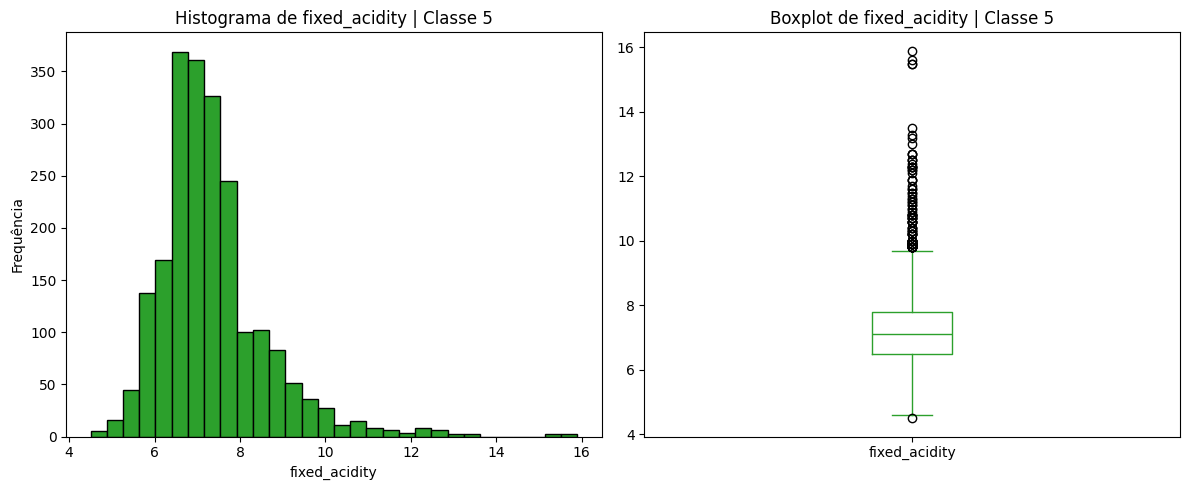

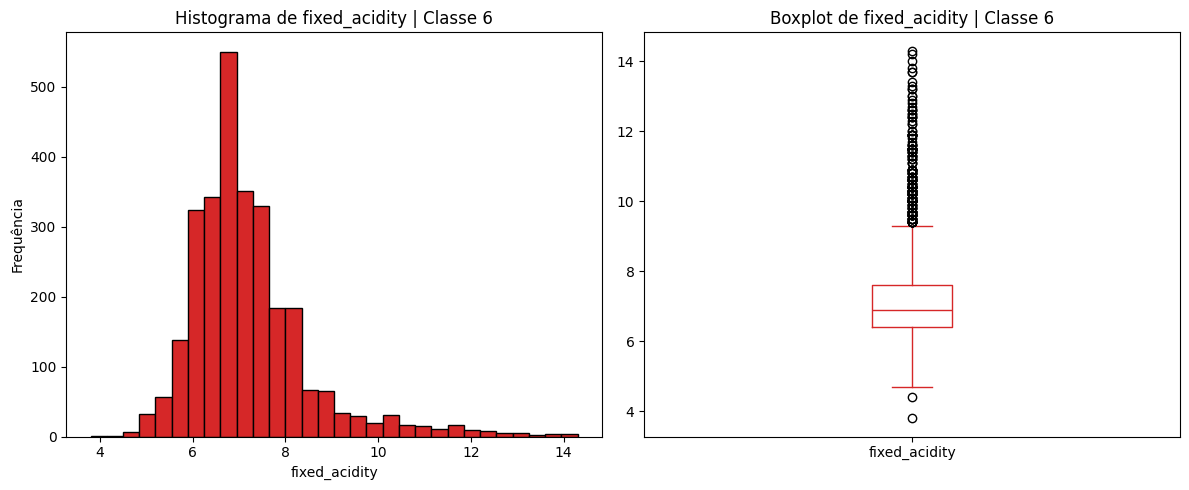

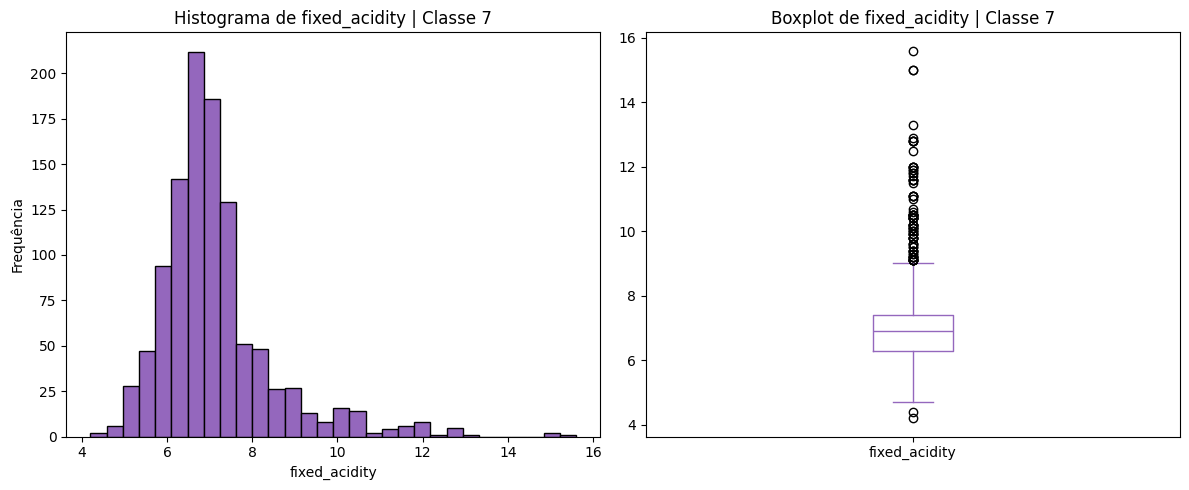

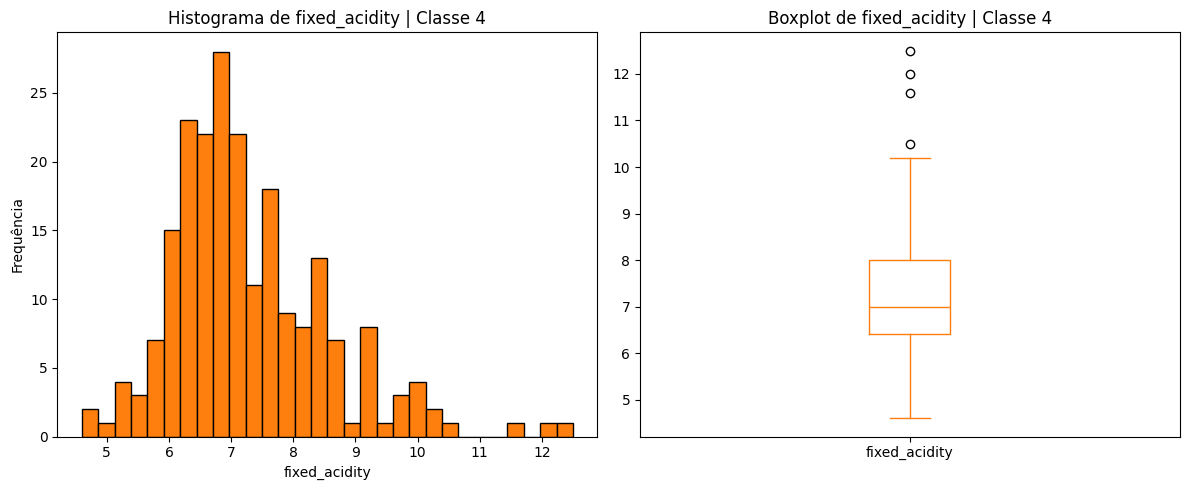

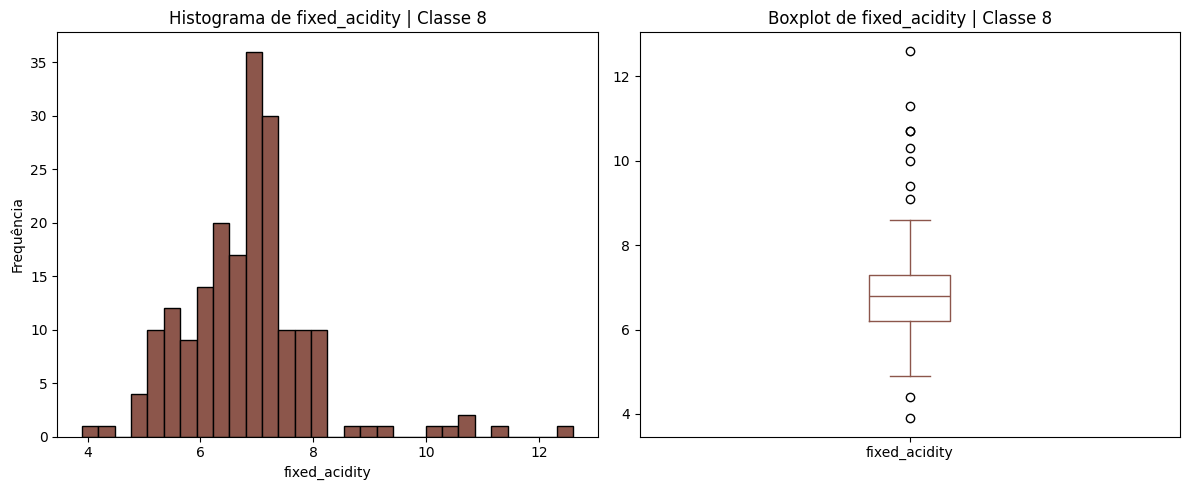

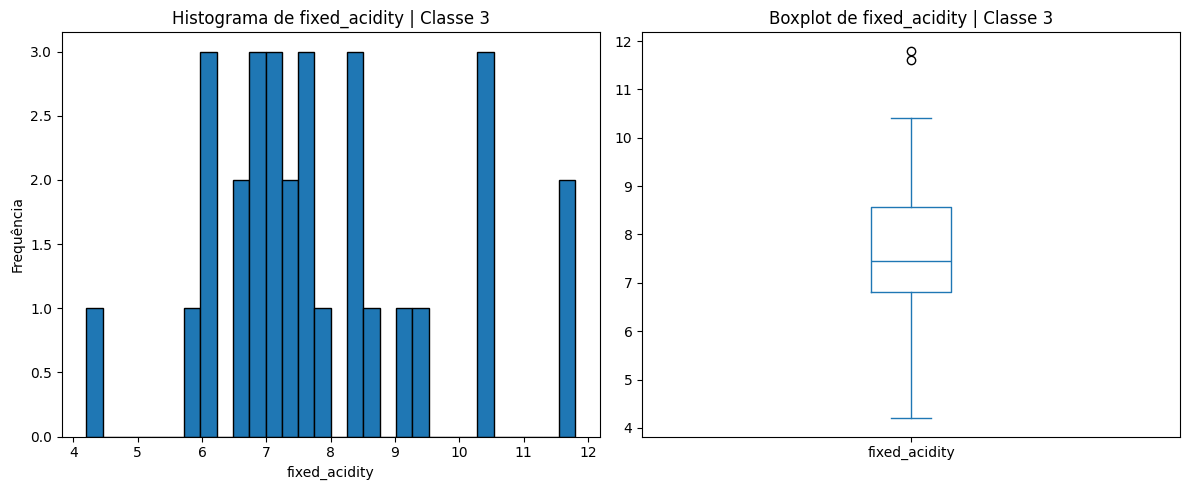

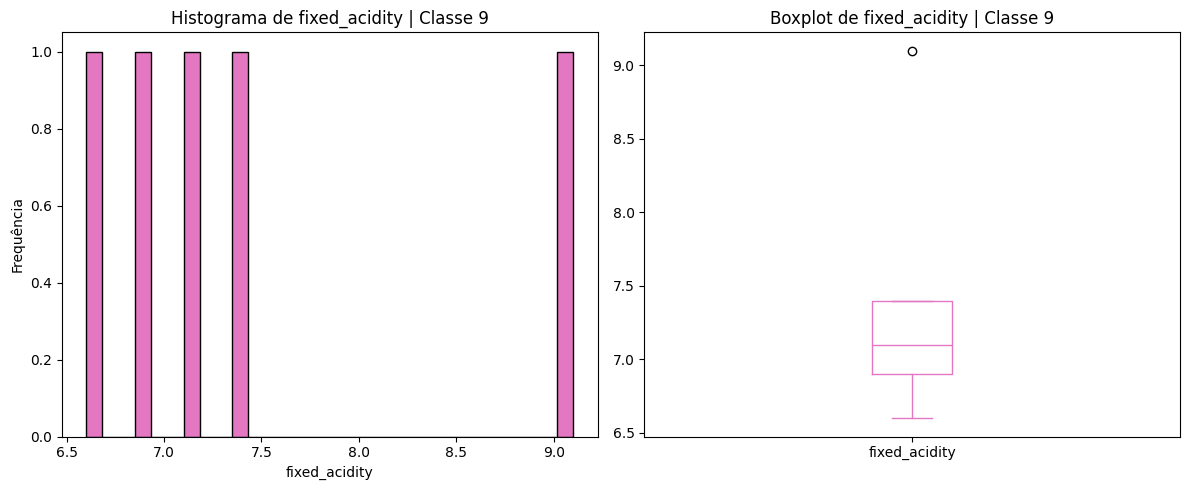

In [90]:
col = 'fixed_acidity'

for cls in results_datfra[results_datfra['Coluna'] == col]['Classe'].unique():
    subset = datfra[datfra['class'] == cls][col].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma com cor definida pelo dicionário
    subset.plot.hist(bins=30, ax=axes[0],
                     color=class_colors[cls], edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequência')
    axes[0].set_title(f'Histograma de {col} | Classe {cls}')

    subset.plot.box(ax=axes[1], color=dict(boxes=class_colors[cls],
                                           whiskers=class_colors[cls],
                                           medians=class_colors[cls],
                                           caps=class_colors[cls]))
    axes[1].set_title(f'Boxplot de {col} | Classe {cls}')

    plt.tight_layout()
    plt.show()


#### Volatile acidity

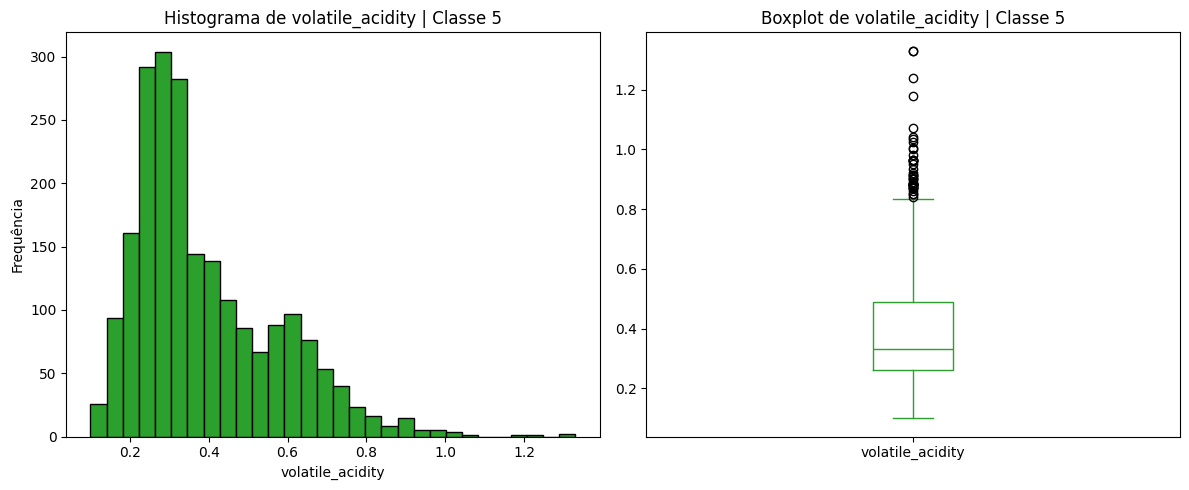

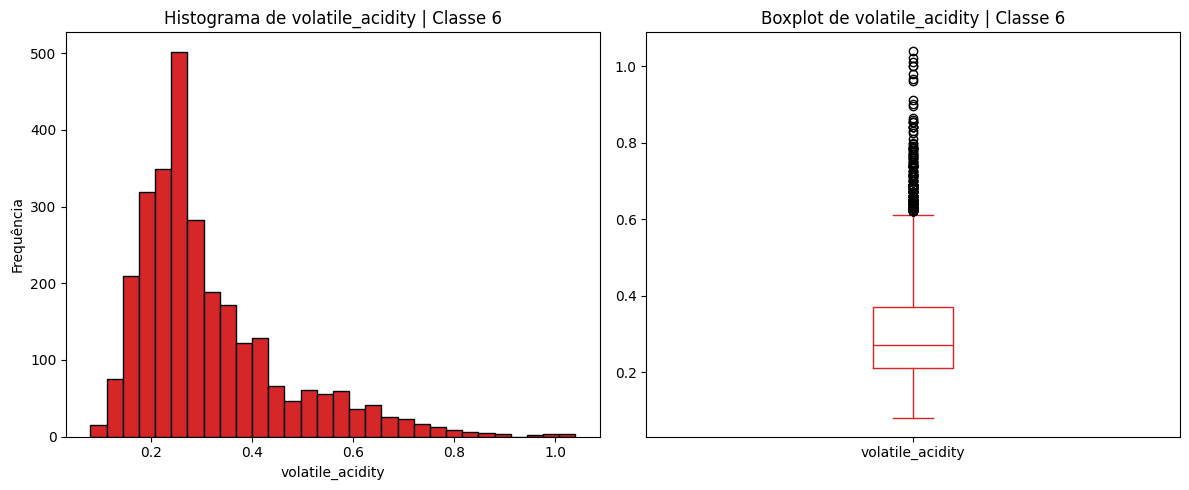

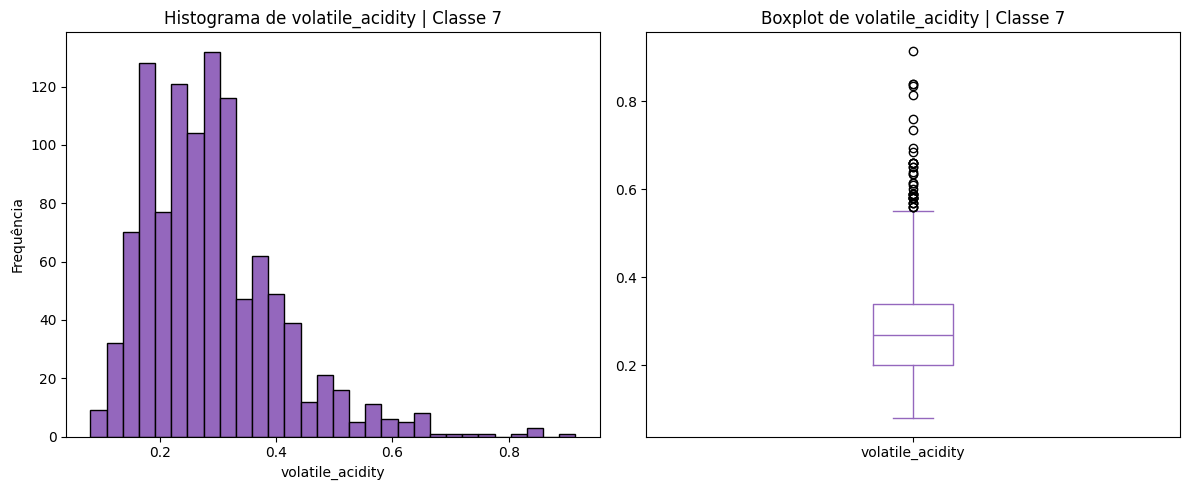

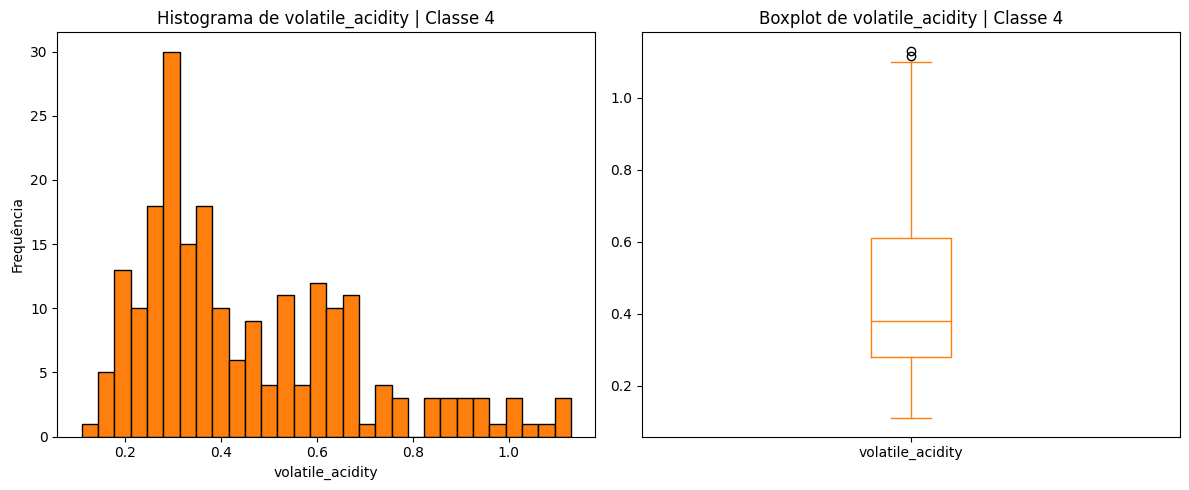

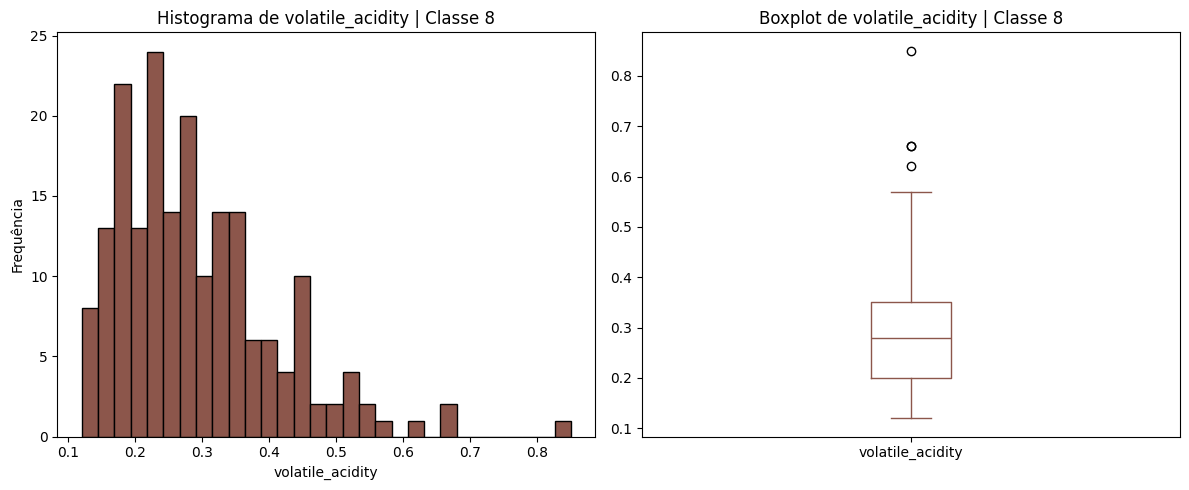

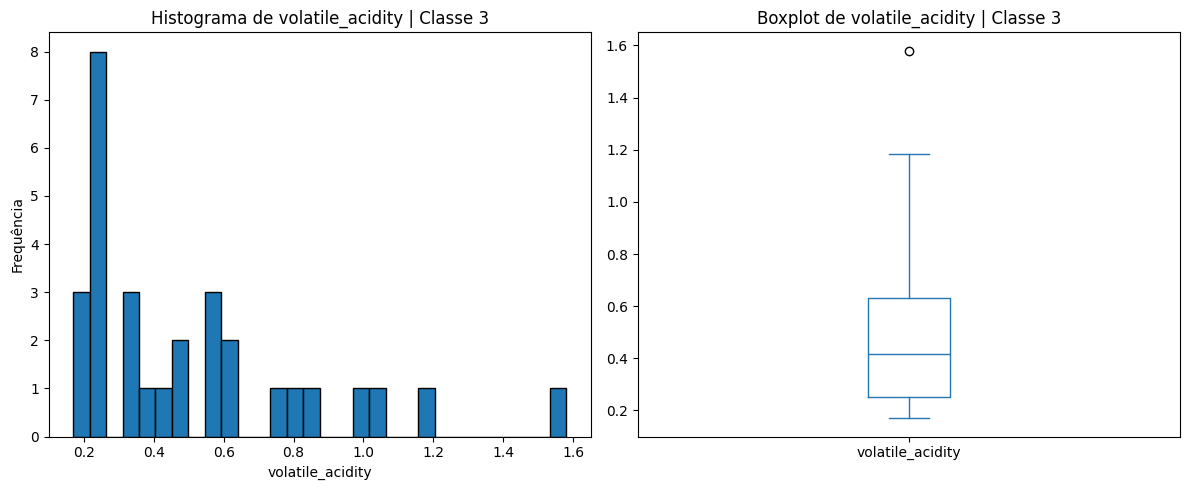

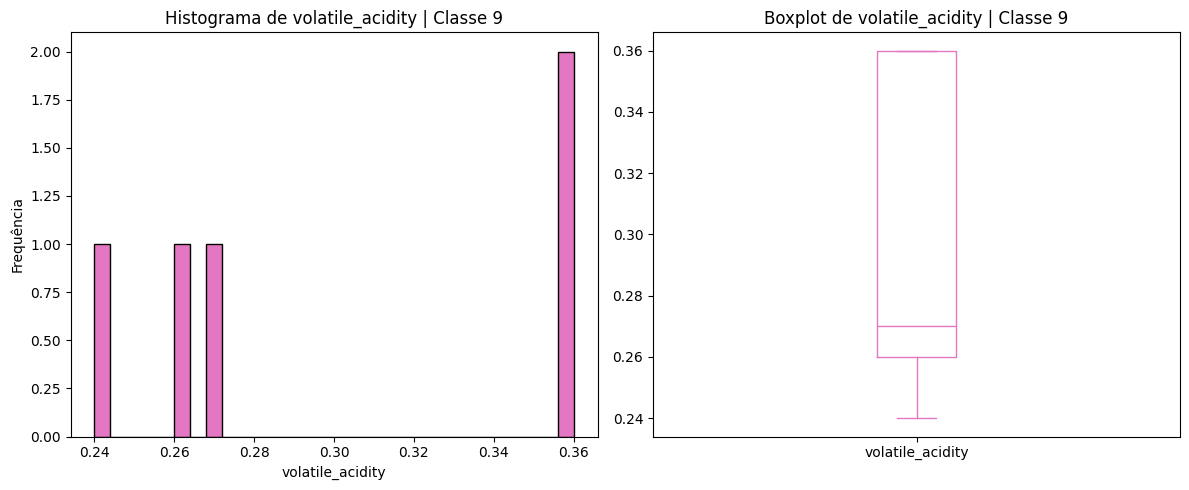

In [91]:
col = 'volatile_acidity'

for cls in results_datfra[results_datfra['Coluna'] == col]['Classe'].unique():
    subset = datfra[datfra['class'] == cls][col].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma com cor definida pelo dicionário
    subset.plot.hist(bins=30, ax=axes[0],
                     color=class_colors[cls], edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequência')
    axes[0].set_title(f'Histograma de {col} | Classe {cls}')

    subset.plot.box(ax=axes[1], color=dict(boxes=class_colors[cls],
                                           whiskers=class_colors[cls],
                                           medians=class_colors[cls],
                                           caps=class_colors[cls]))
    axes[1].set_title(f'Boxplot de {col} | Classe {cls}')

    plt.tight_layout()
    plt.show()


#### Citric acid

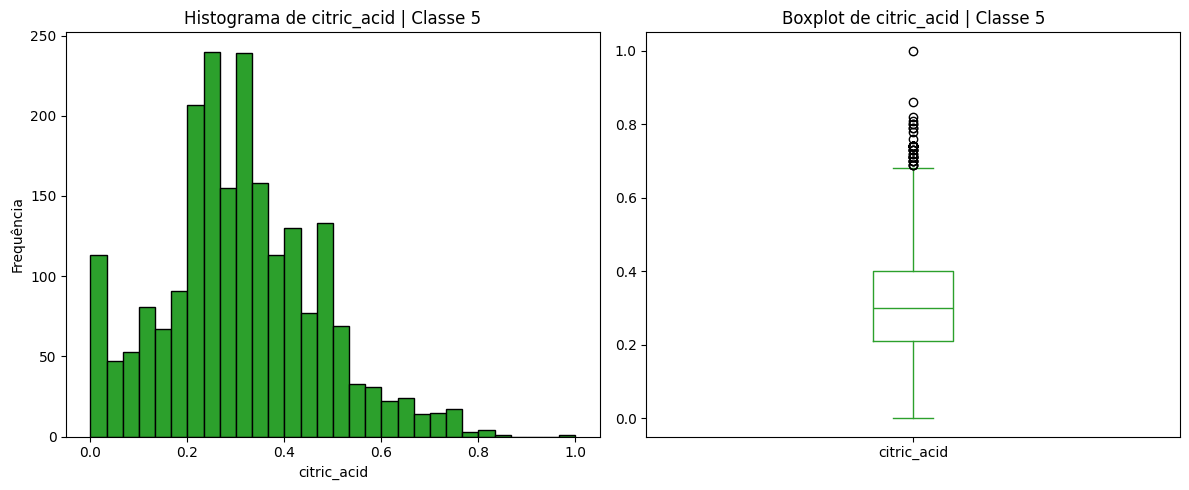

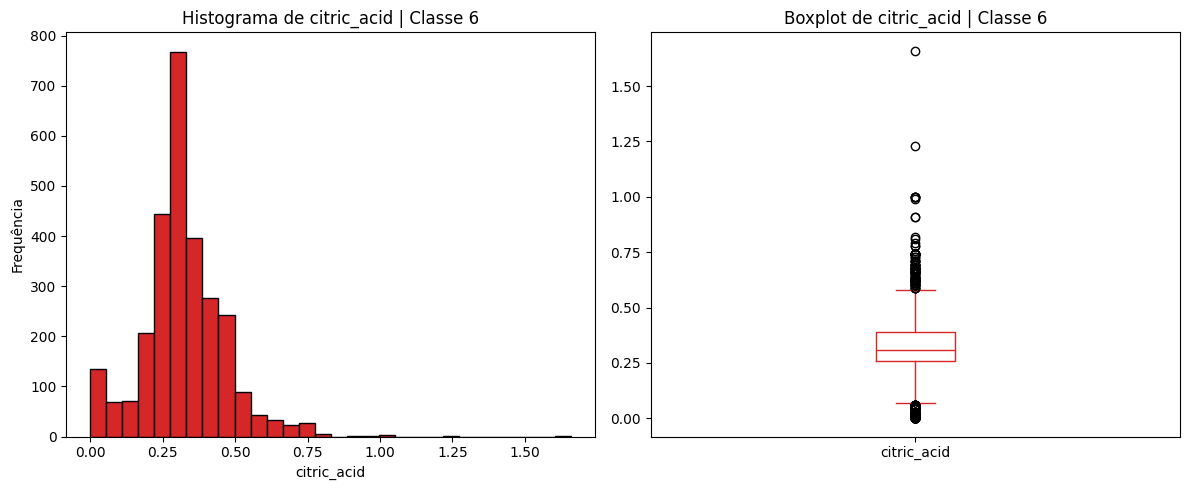

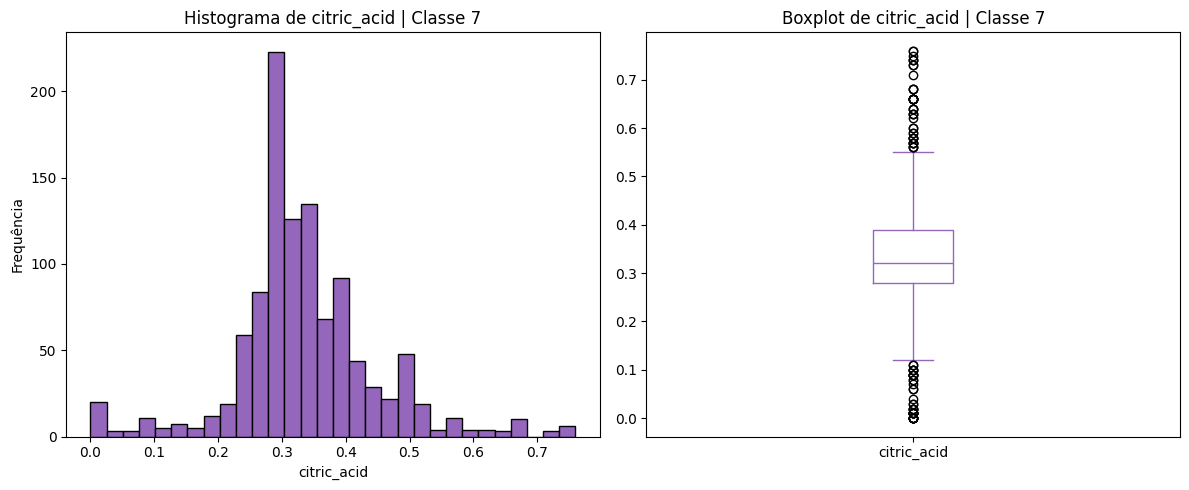

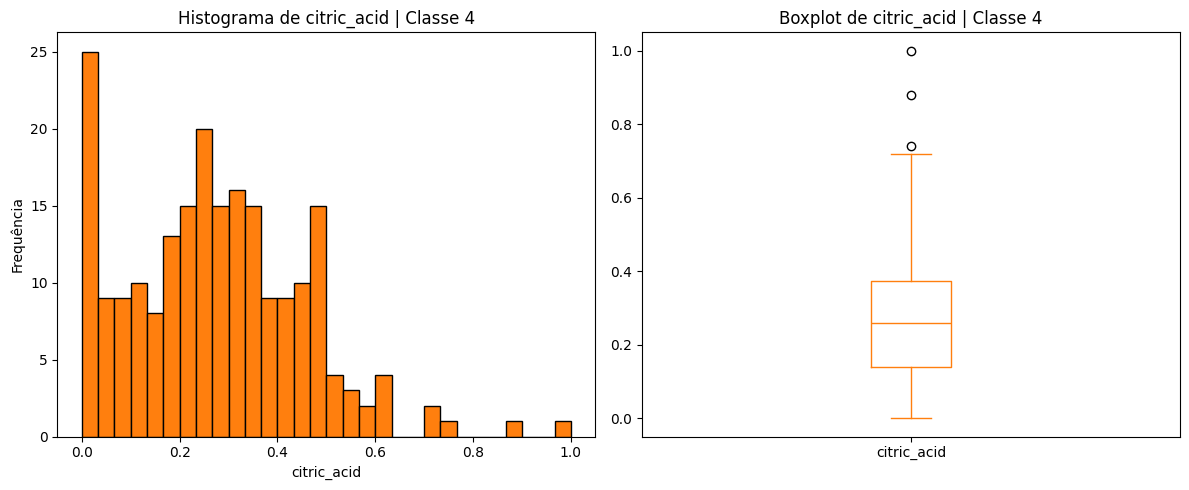

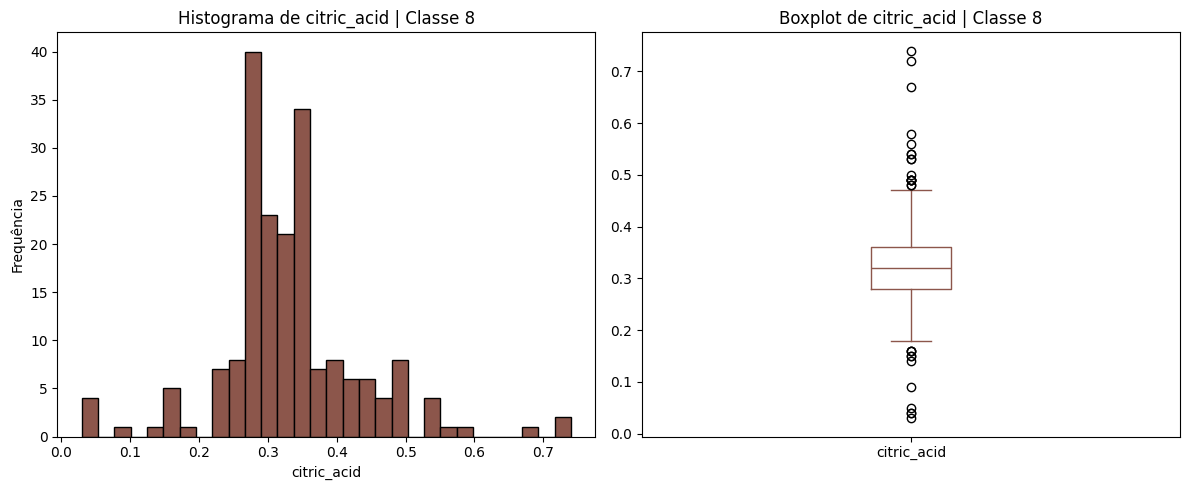

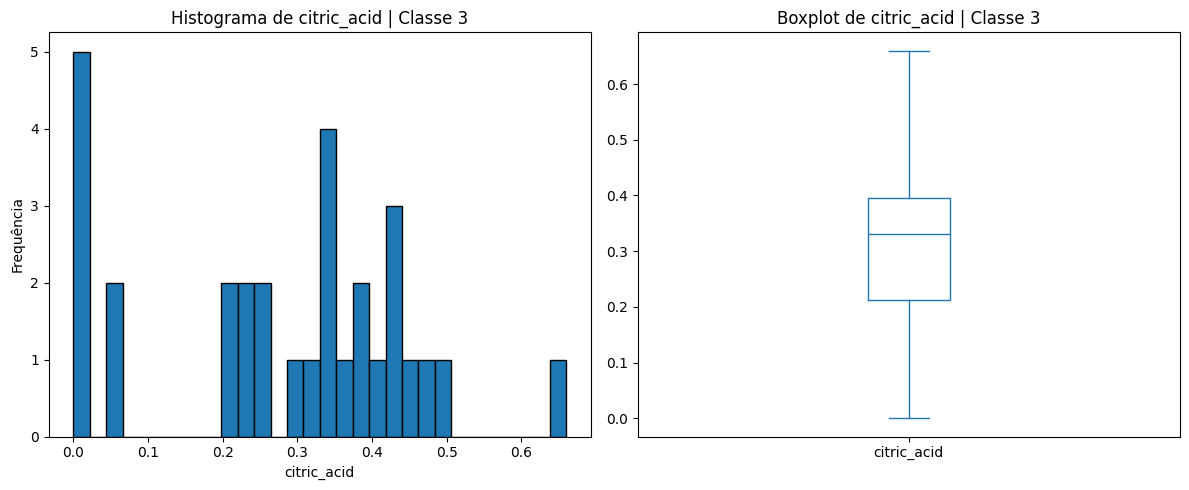

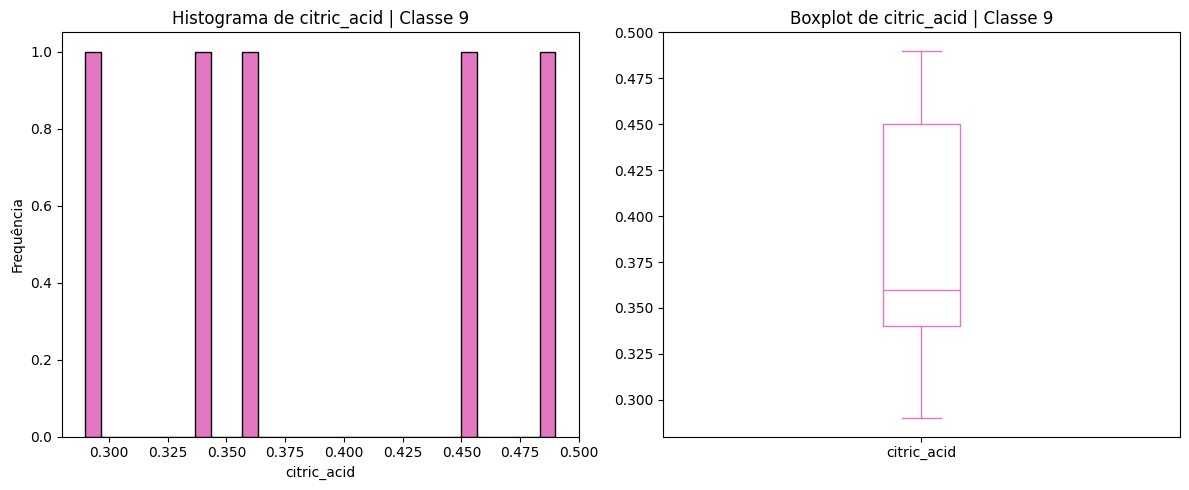

In [92]:
col = 'citric_acid'

for cls in results_datfra[results_datfra['Coluna'] == col]['Classe'].unique():
    subset = datfra[datfra['class'] == cls][col].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma com cor definida pelo dicionário
    subset.plot.hist(bins=30, ax=axes[0],
                     color=class_colors[cls], edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequência')
    axes[0].set_title(f'Histograma de {col} | Classe {cls}')

    subset.plot.box(ax=axes[1], color=dict(boxes=class_colors[cls],
                                           whiskers=class_colors[cls],
                                           medians=class_colors[cls],
                                           caps=class_colors[cls]))
    axes[1].set_title(f'Boxplot de {col} | Classe {cls}')

    plt.tight_layout()
    plt.show()


#### Residual sugar

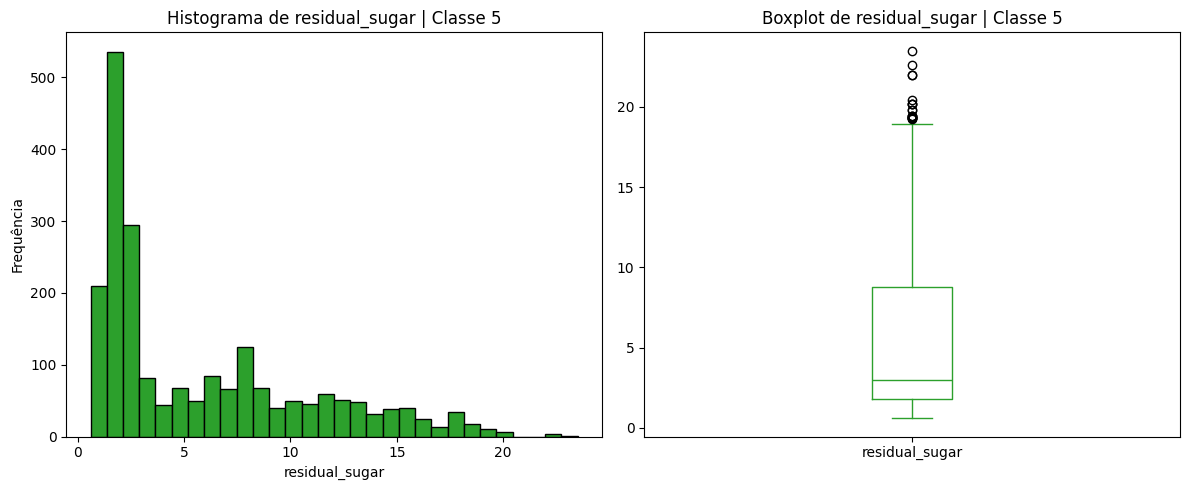

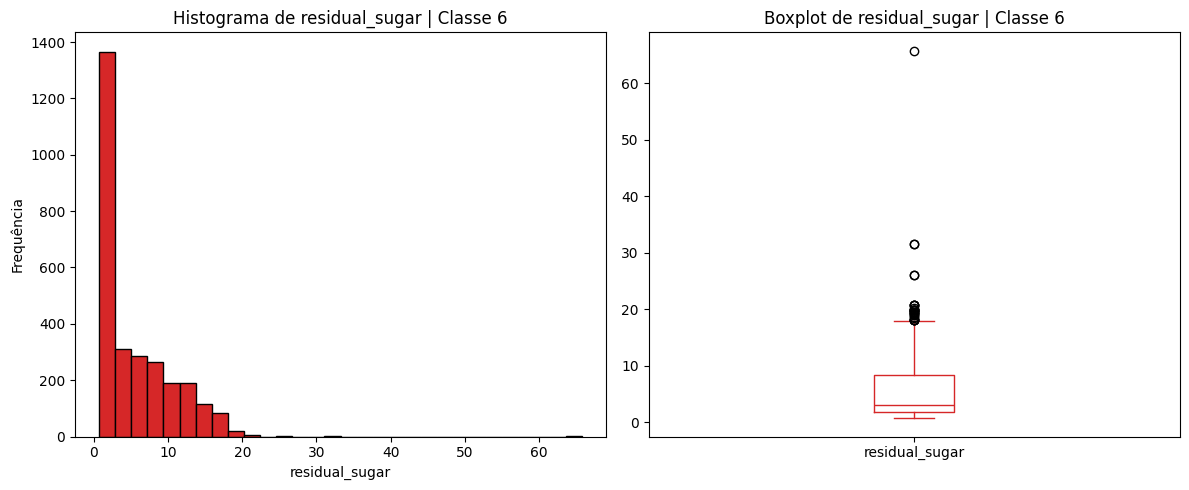

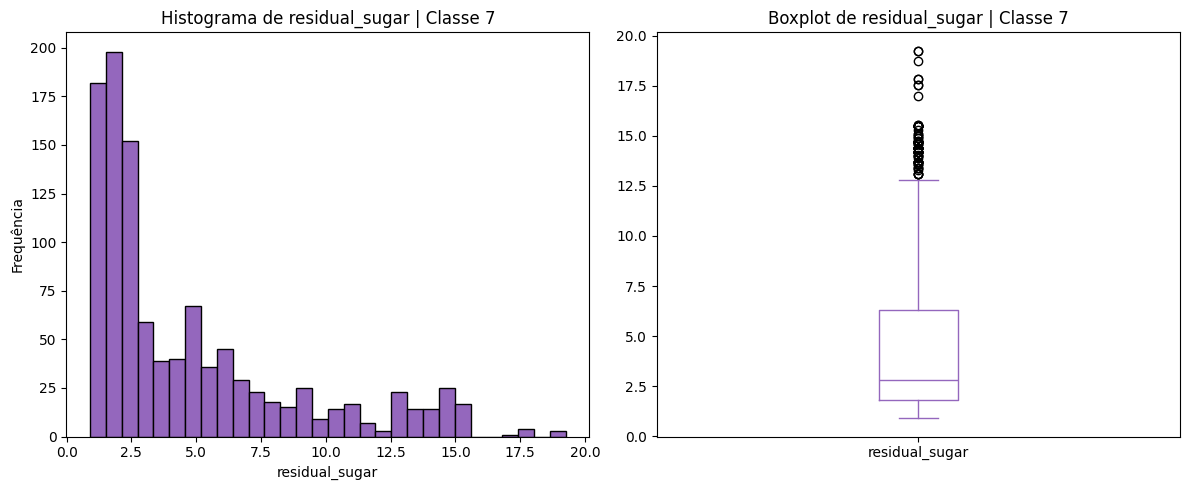

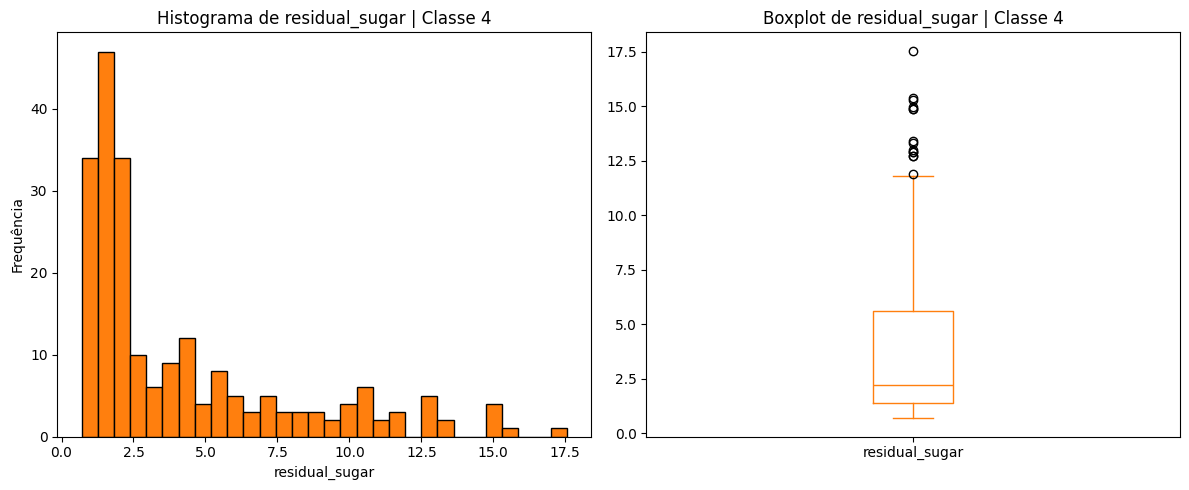

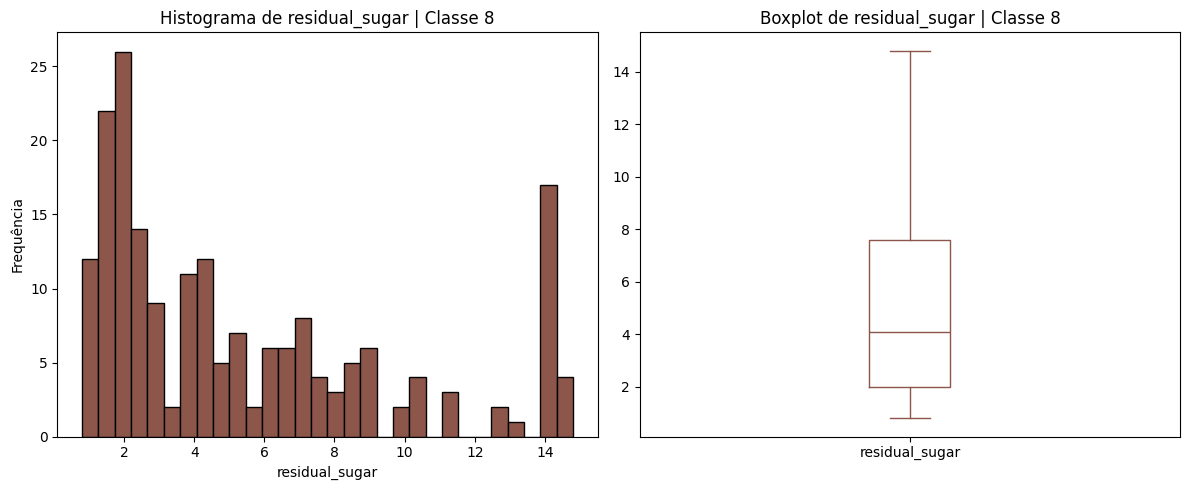

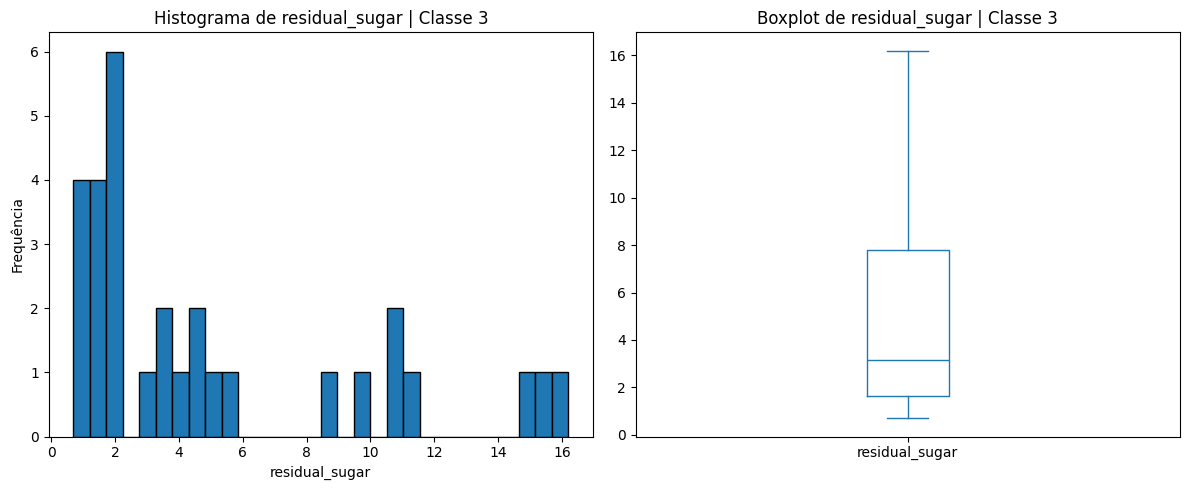

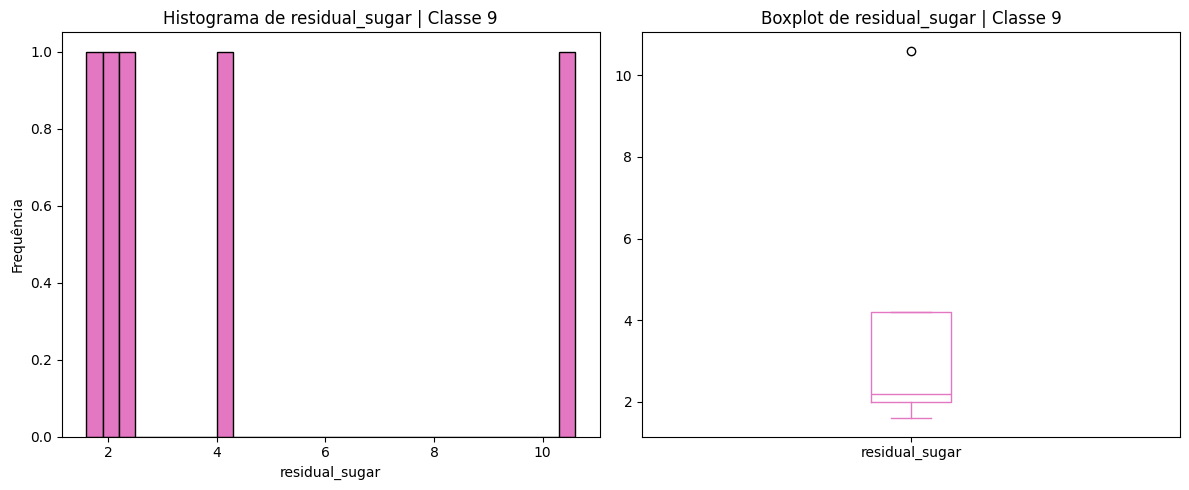

In [93]:
col = 'residual_sugar'

for cls in results_datfra[results_datfra['Coluna'] == col]['Classe'].unique():
    subset = datfra[datfra['class'] == cls][col].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma com cor definida pelo dicionário
    subset.plot.hist(bins=30, ax=axes[0],
                     color=class_colors[cls], edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequência')
    axes[0].set_title(f'Histograma de {col} | Classe {cls}')

    subset.plot.box(ax=axes[1], color=dict(boxes=class_colors[cls],
                                           whiskers=class_colors[cls],
                                           medians=class_colors[cls],
                                           caps=class_colors[cls]))
    axes[1].set_title(f'Boxplot de {col} | Classe {cls}')

    plt.tight_layout()
    plt.show()


#### Chlorides

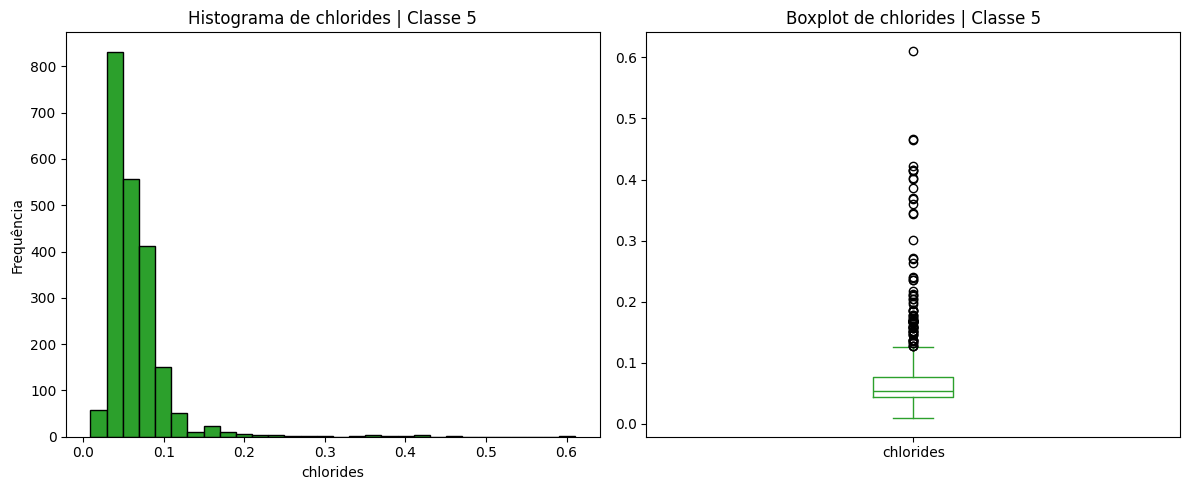

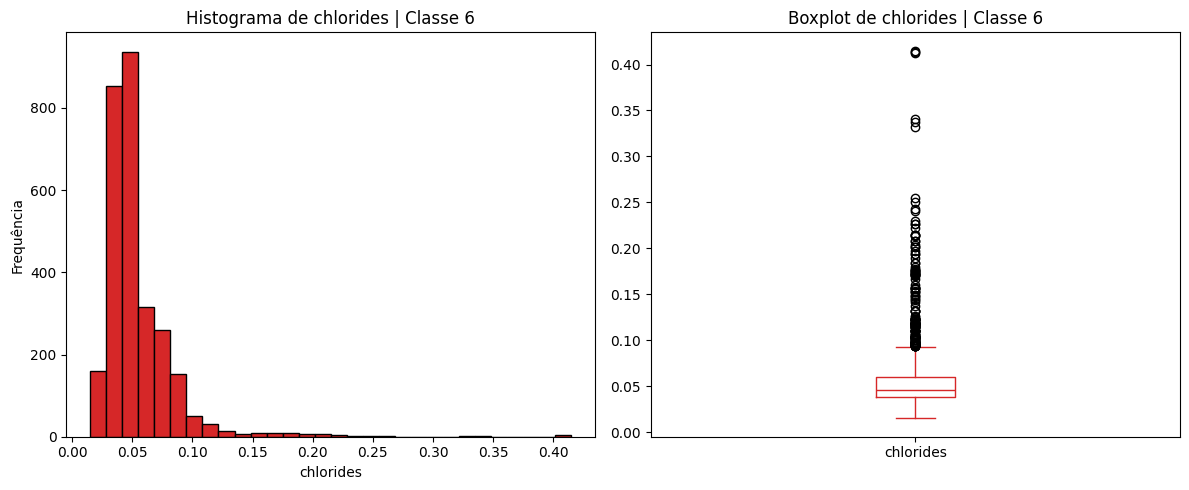

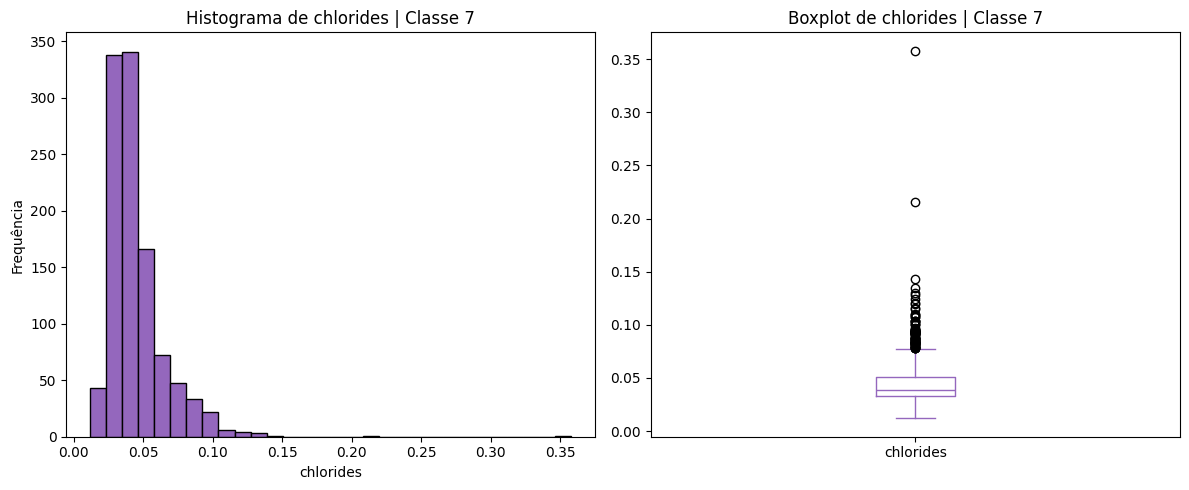

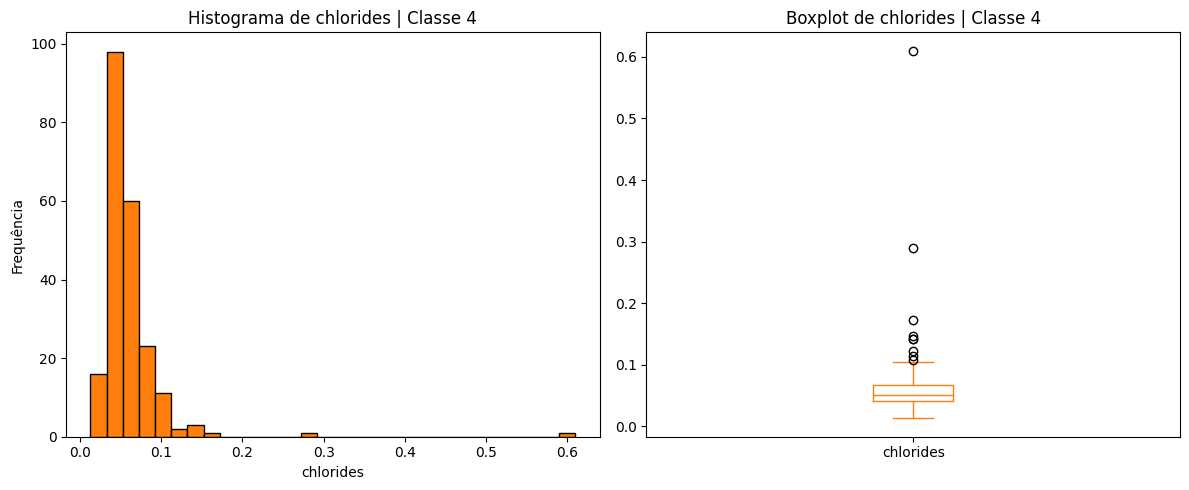

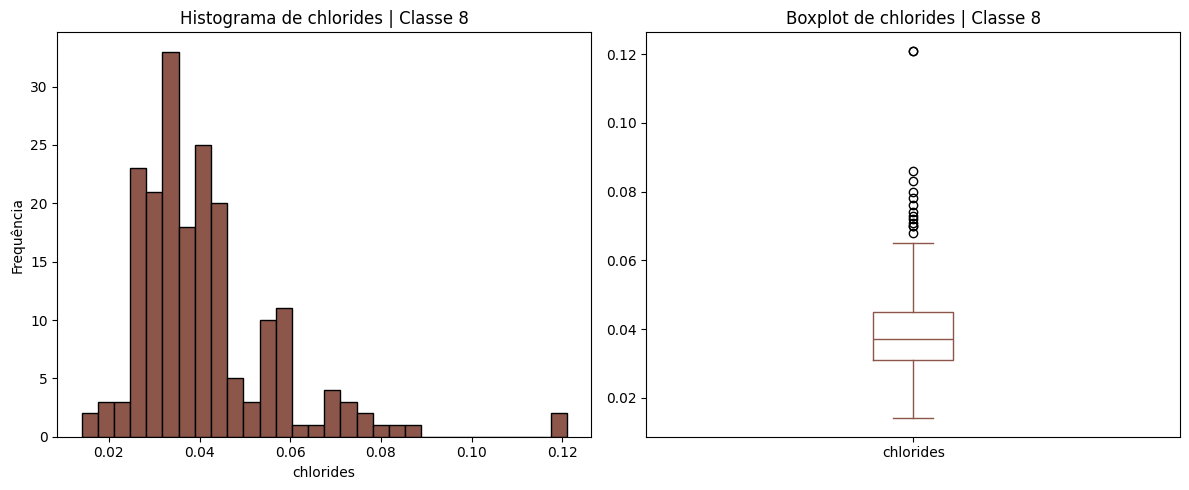

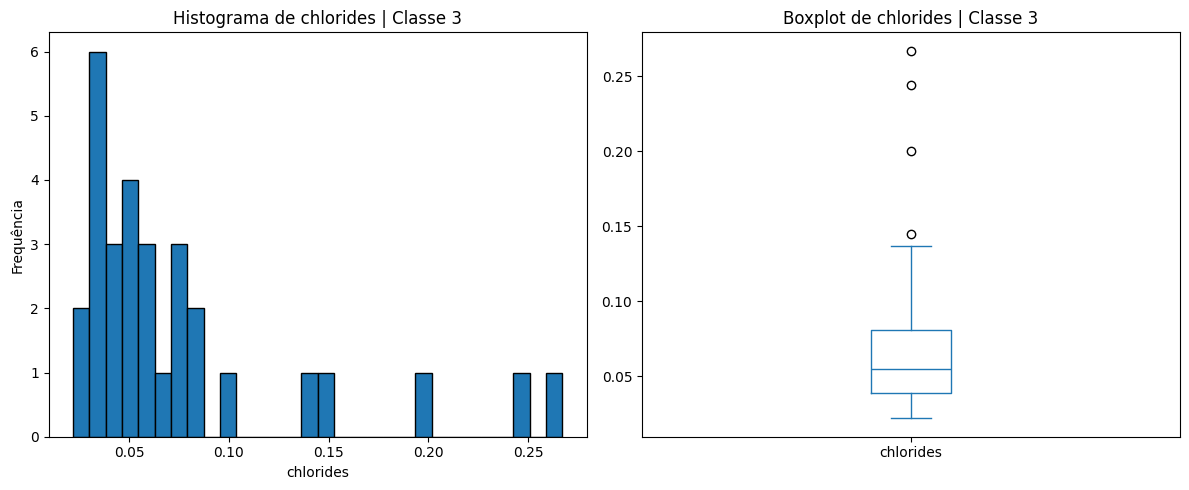

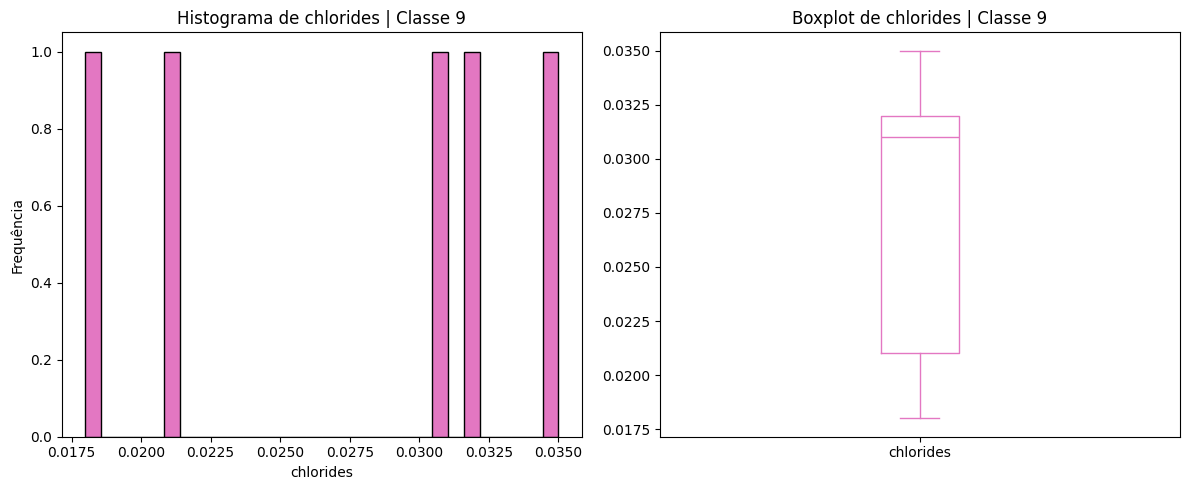

In [94]:
col = 'chlorides'

for cls in results_datfra[results_datfra['Coluna'] == col]['Classe'].unique():
    subset = datfra[datfra['class'] == cls][col].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma com cor definida pelo dicionário
    subset.plot.hist(bins=30, ax=axes[0],
                     color=class_colors[cls], edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequência')
    axes[0].set_title(f'Histograma de {col} | Classe {cls}')

    subset.plot.box(ax=axes[1], color=dict(boxes=class_colors[cls],
                                           whiskers=class_colors[cls],
                                           medians=class_colors[cls],
                                           caps=class_colors[cls]))
    axes[1].set_title(f'Boxplot de {col} | Classe {cls}')

    plt.tight_layout()
    plt.show()


#### Free sulfur dioxide

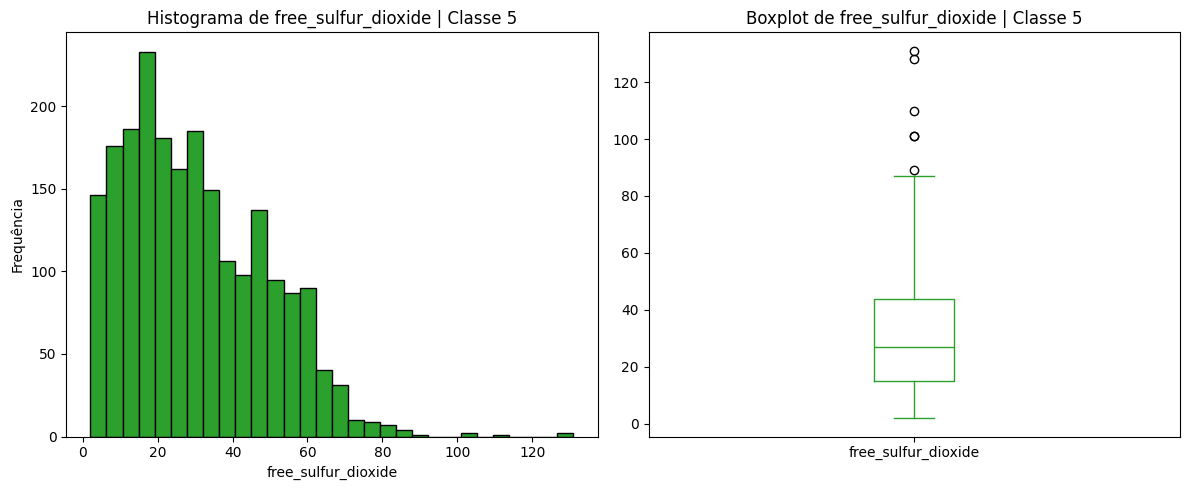

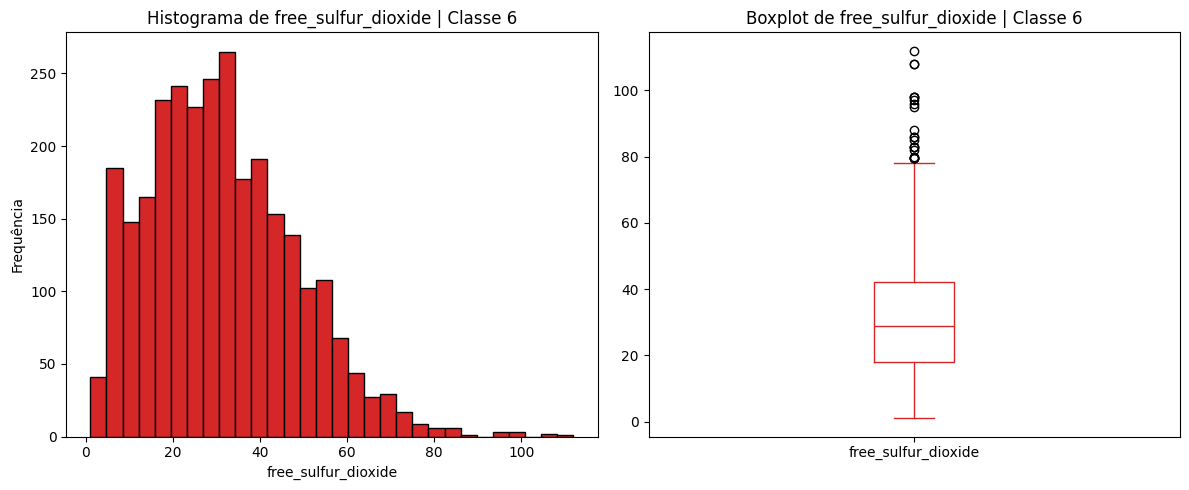

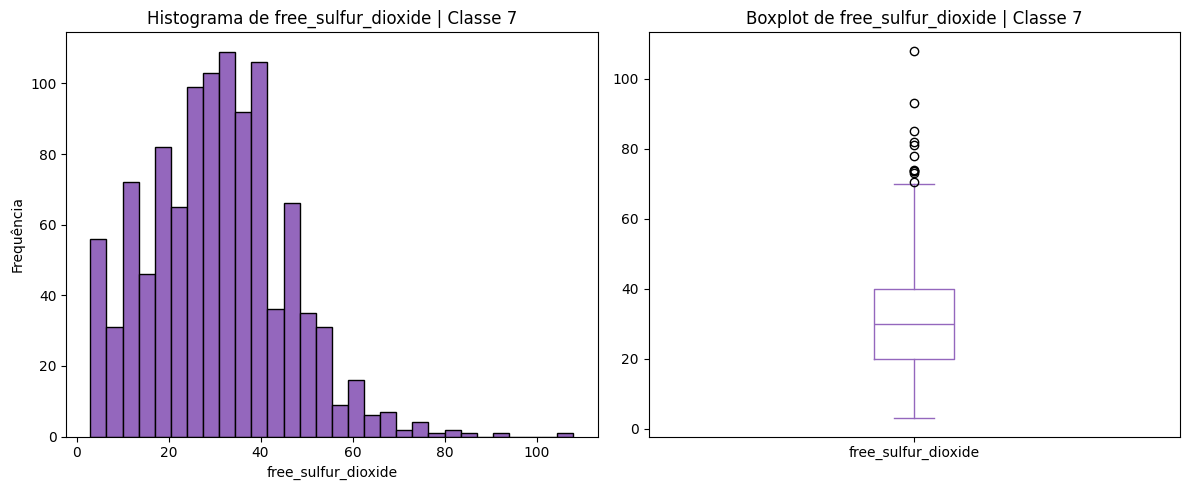

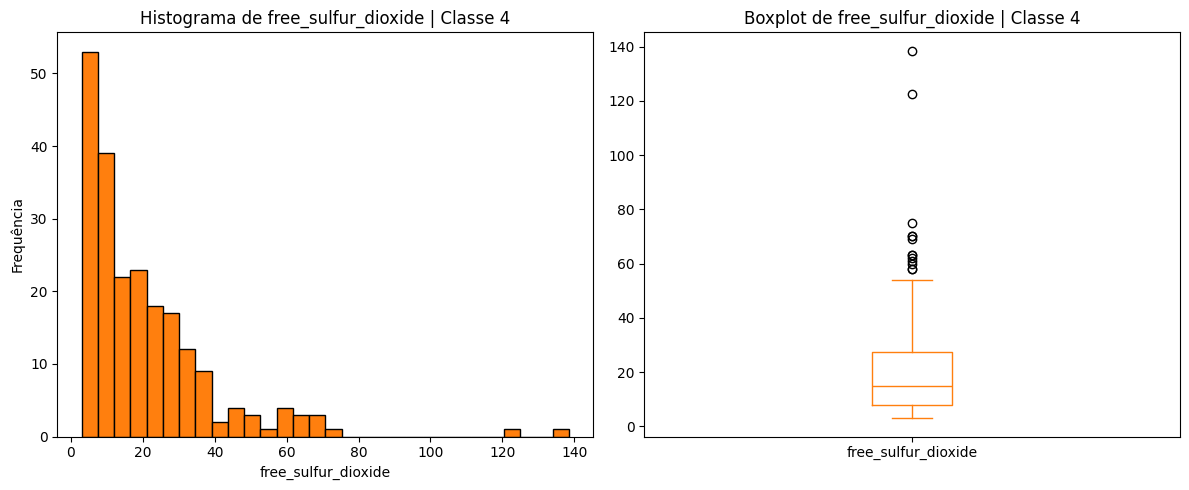

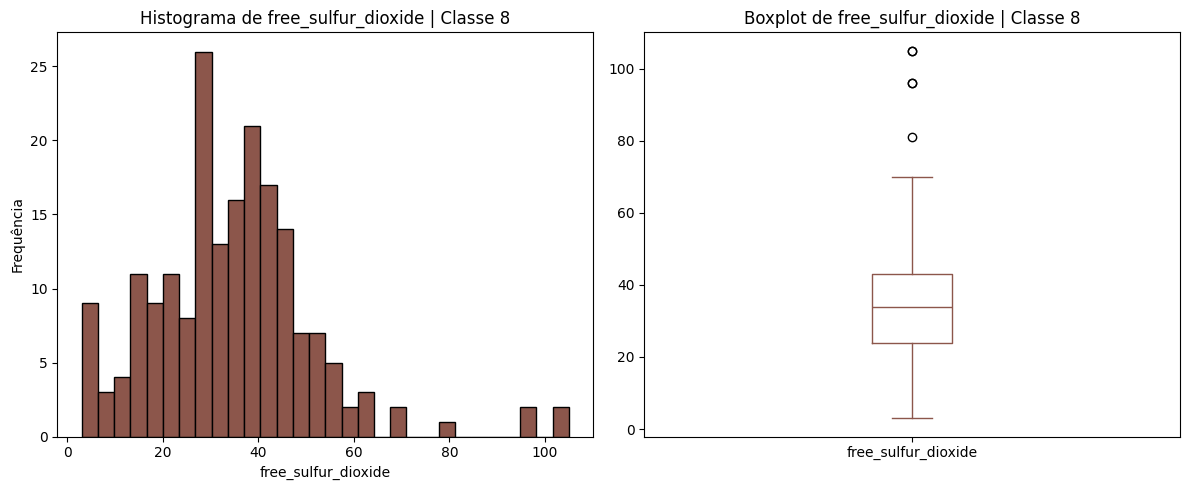

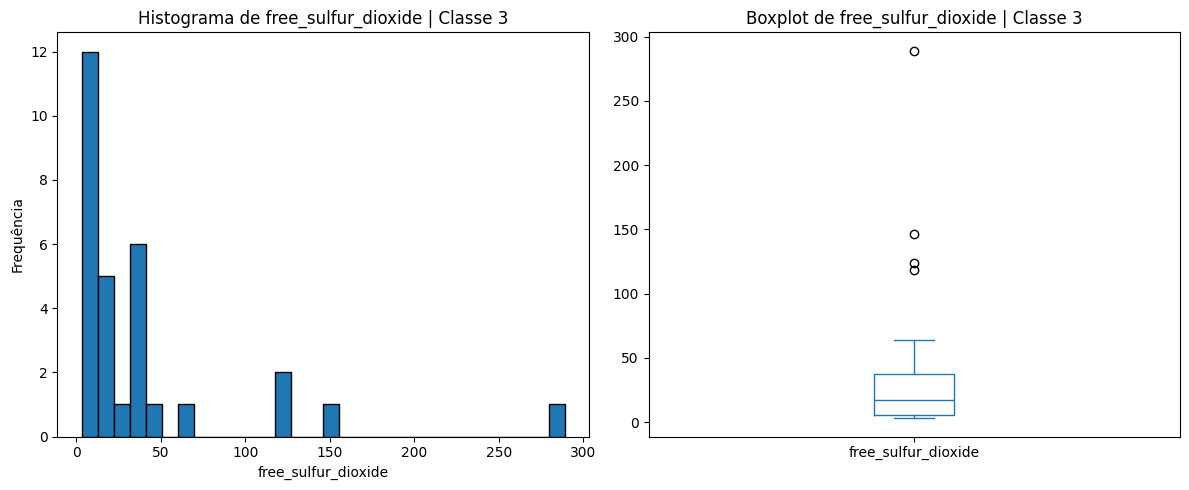

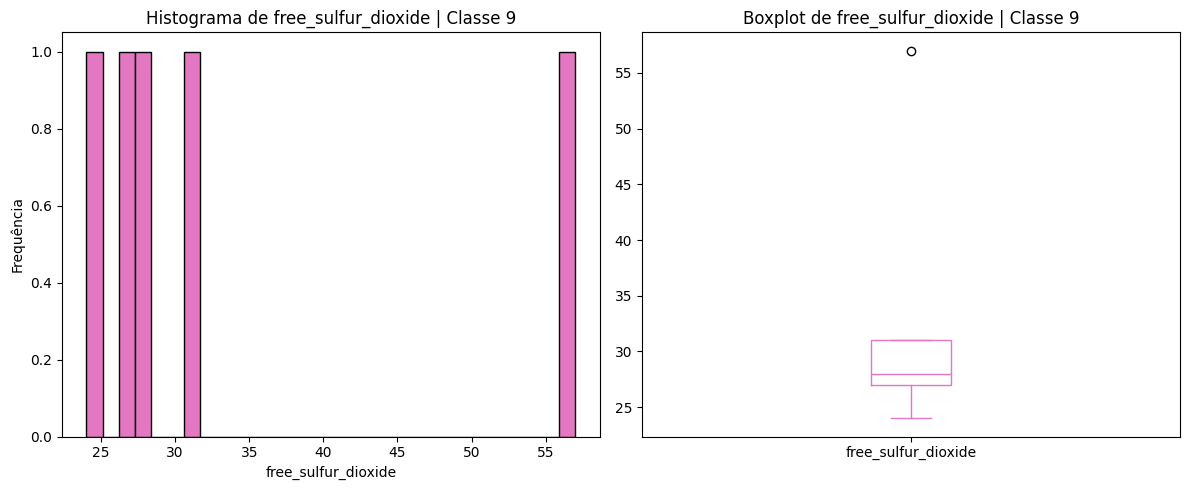

In [95]:
col = 'free_sulfur_dioxide'

for cls in results_datfra[results_datfra['Coluna'] == col]['Classe'].unique():
    subset = datfra[datfra['class'] == cls][col].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma com cor definida pelo dicionário
    subset.plot.hist(bins=30, ax=axes[0],
                     color=class_colors[cls], edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequência')
    axes[0].set_title(f'Histograma de {col} | Classe {cls}')

    subset.plot.box(ax=axes[1], color=dict(boxes=class_colors[cls],
                                           whiskers=class_colors[cls],
                                           medians=class_colors[cls],
                                           caps=class_colors[cls]))
    axes[1].set_title(f'Boxplot de {col} | Classe {cls}')

    plt.tight_layout()
    plt.show()


#### Total sulfur dioxide

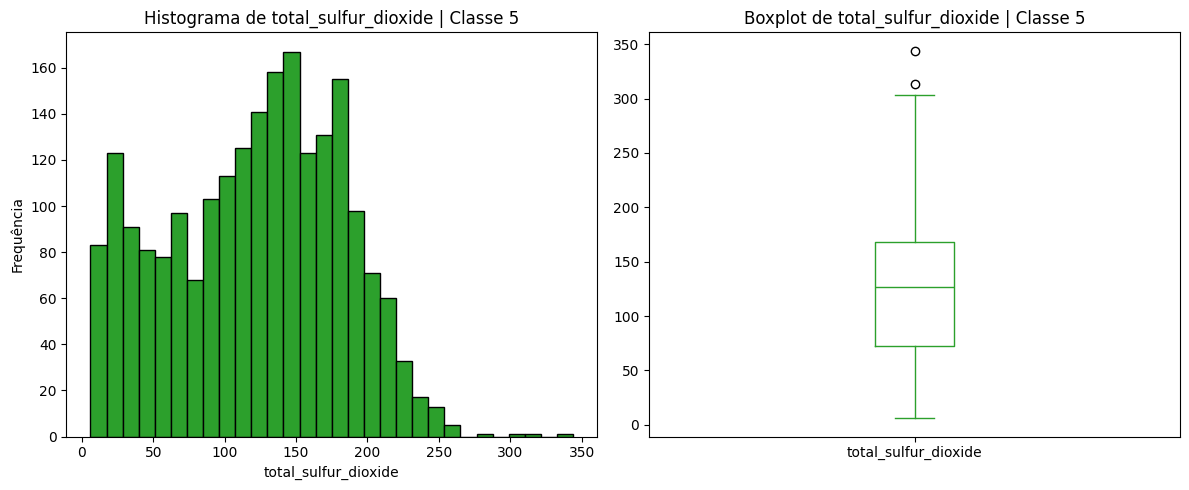

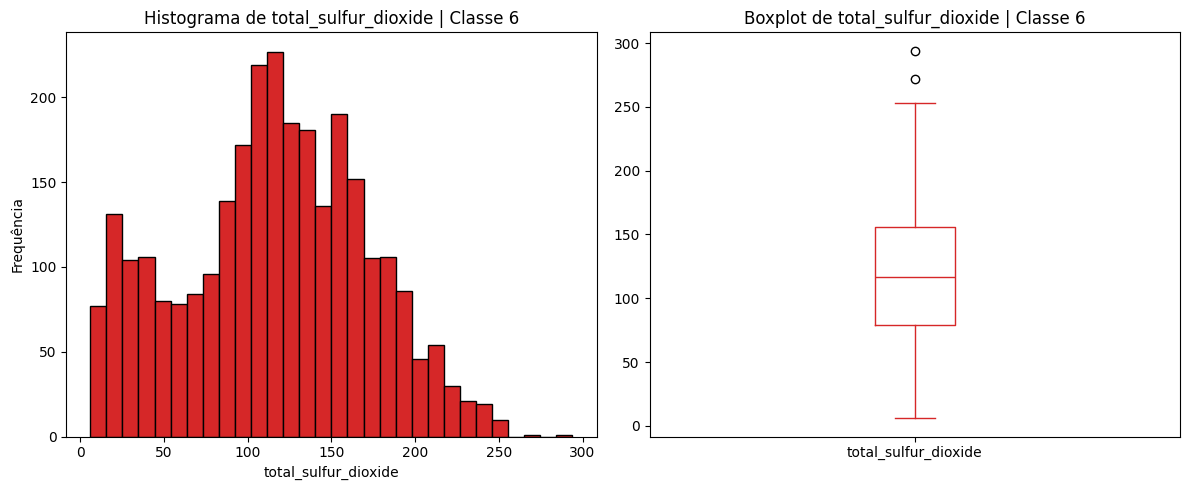

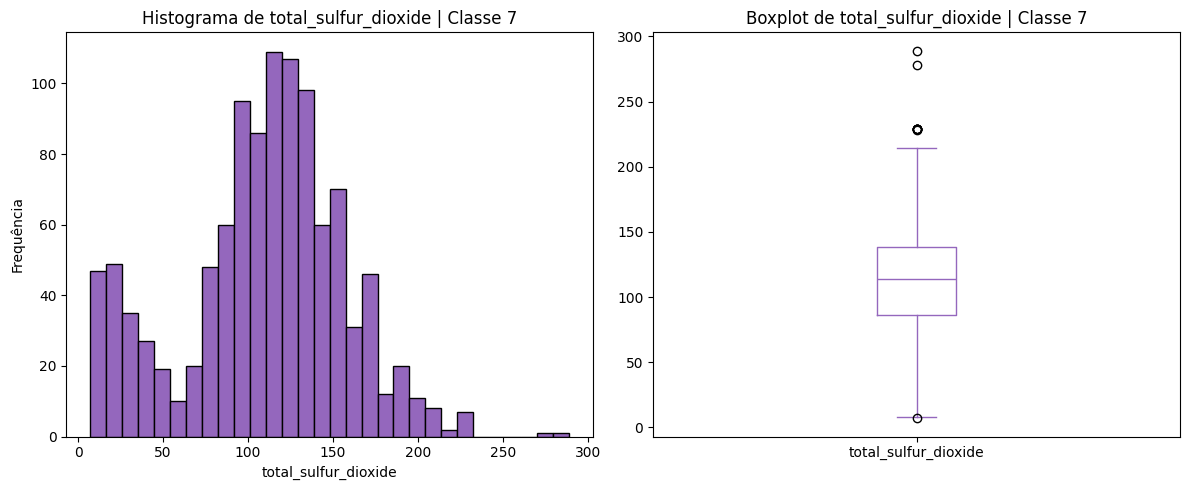

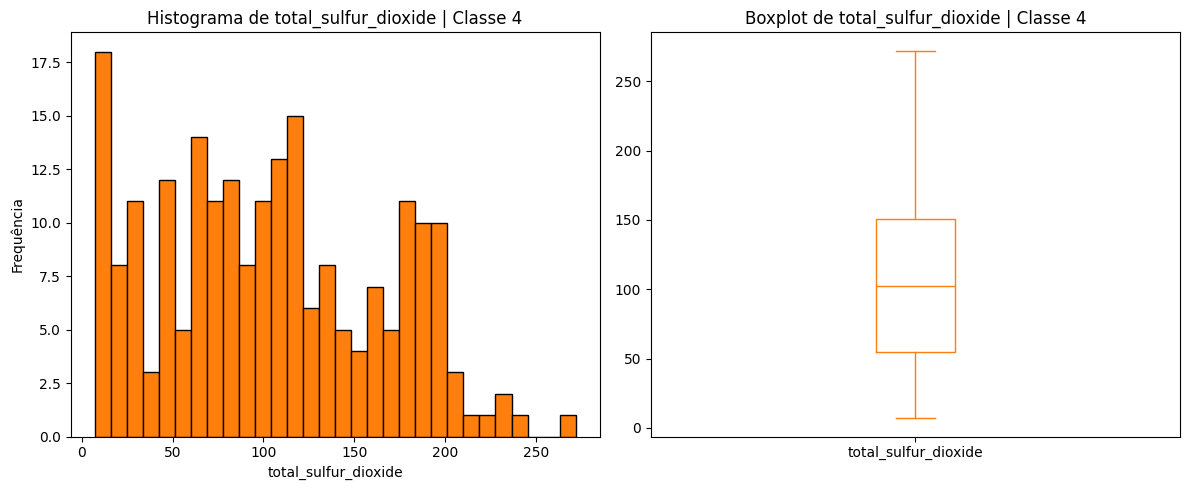

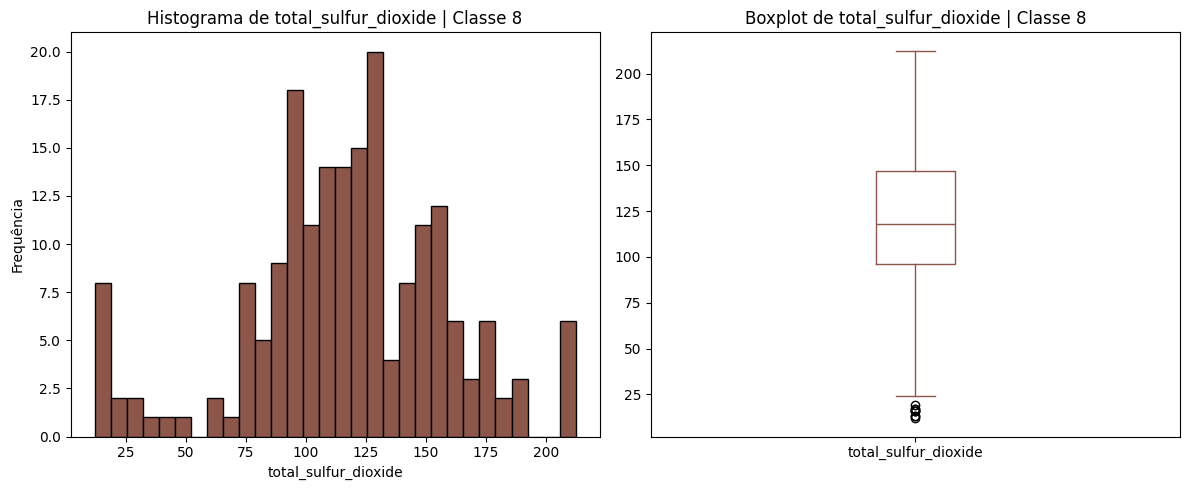

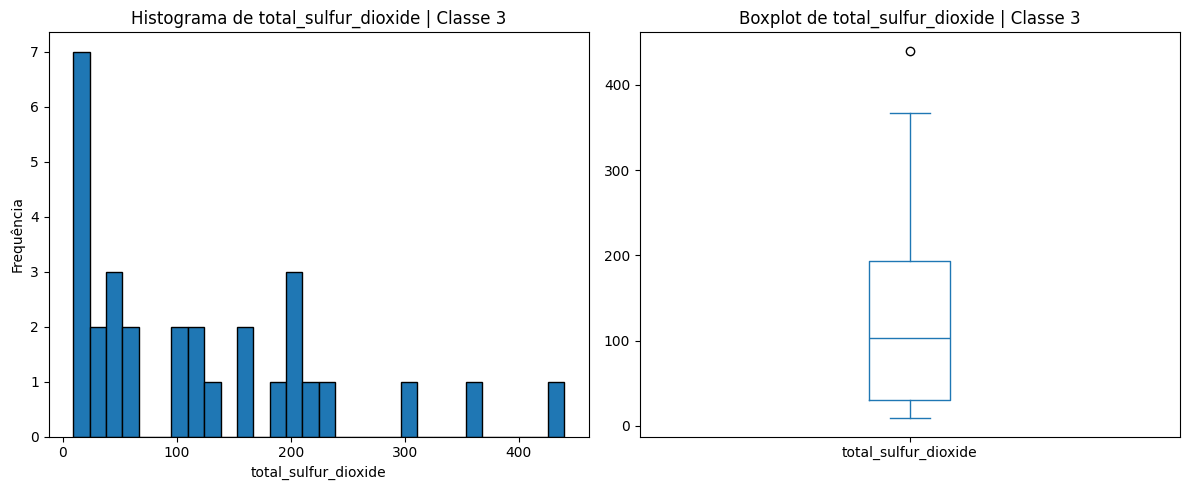

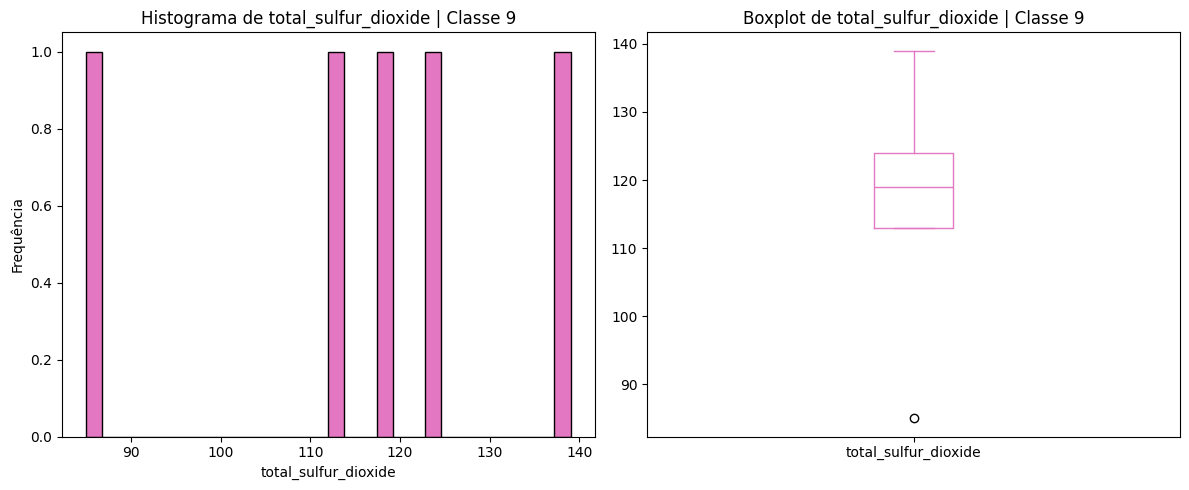

In [96]:
col = 'total_sulfur_dioxide'

for cls in results_datfra[results_datfra['Coluna'] == col]['Classe'].unique():
    subset = datfra[datfra['class'] == cls][col].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma com cor definida pelo dicionário
    subset.plot.hist(bins=30, ax=axes[0],
                     color=class_colors[cls], edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequência')
    axes[0].set_title(f'Histograma de {col} | Classe {cls}')

    subset.plot.box(ax=axes[1], color=dict(boxes=class_colors[cls],
                                           whiskers=class_colors[cls],
                                           medians=class_colors[cls],
                                           caps=class_colors[cls]))
    axes[1].set_title(f'Boxplot de {col} | Classe {cls}')

    plt.tight_layout()
    plt.show()


#### Density

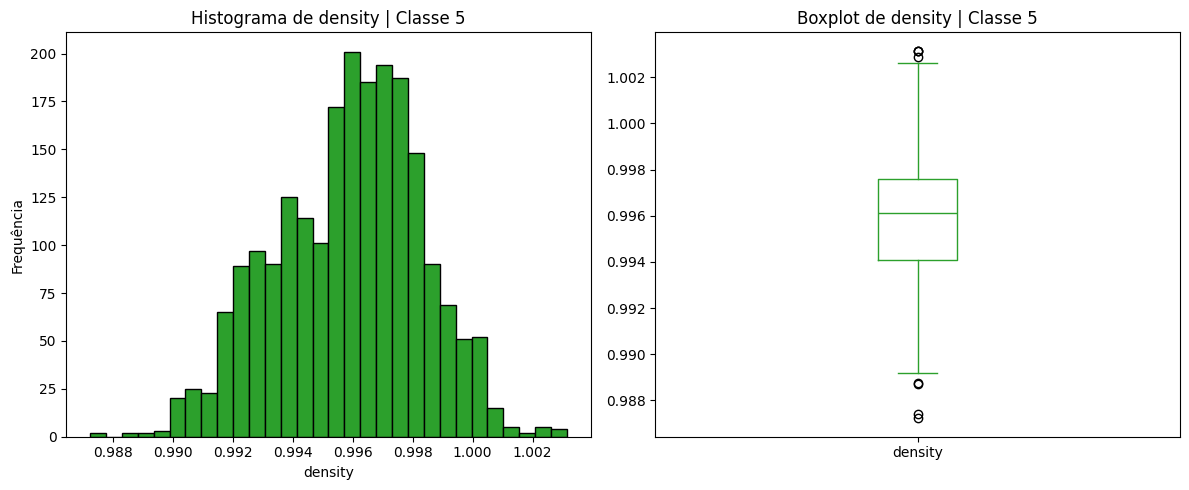

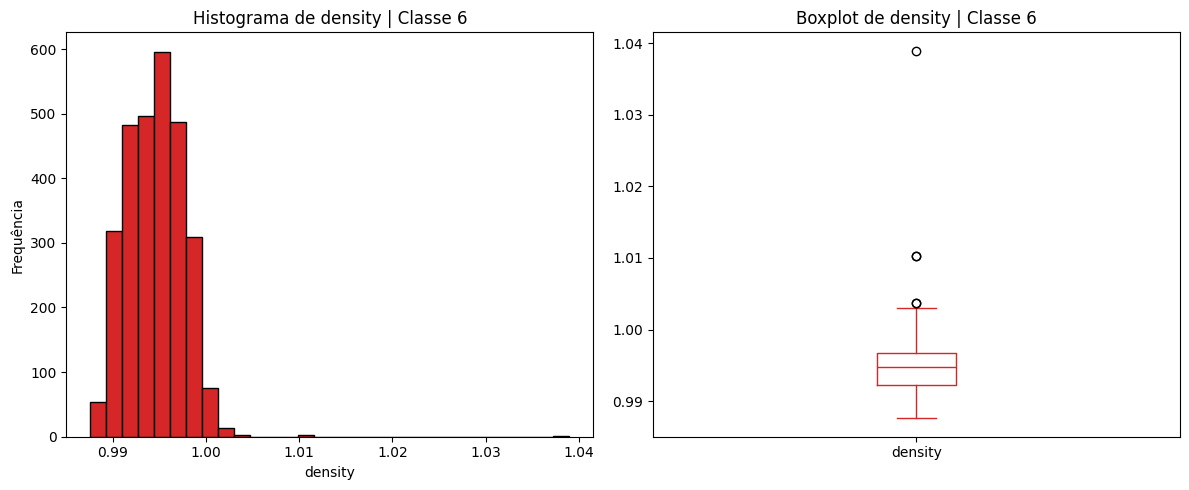

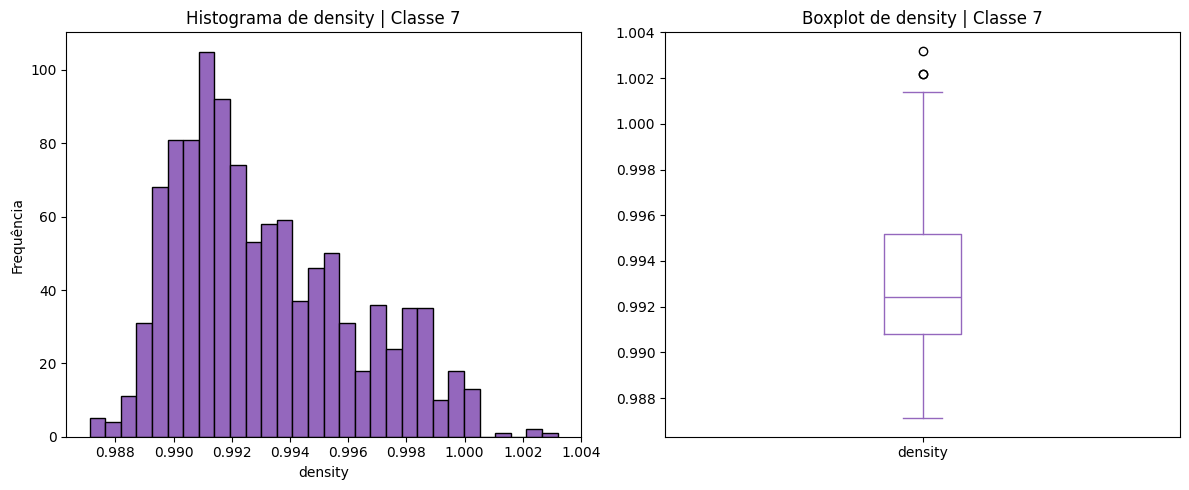

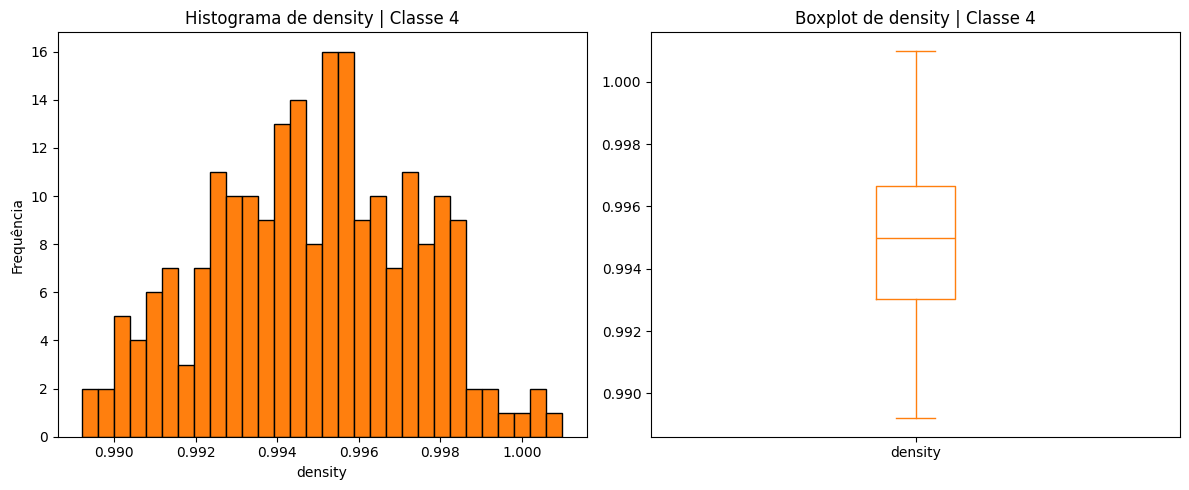

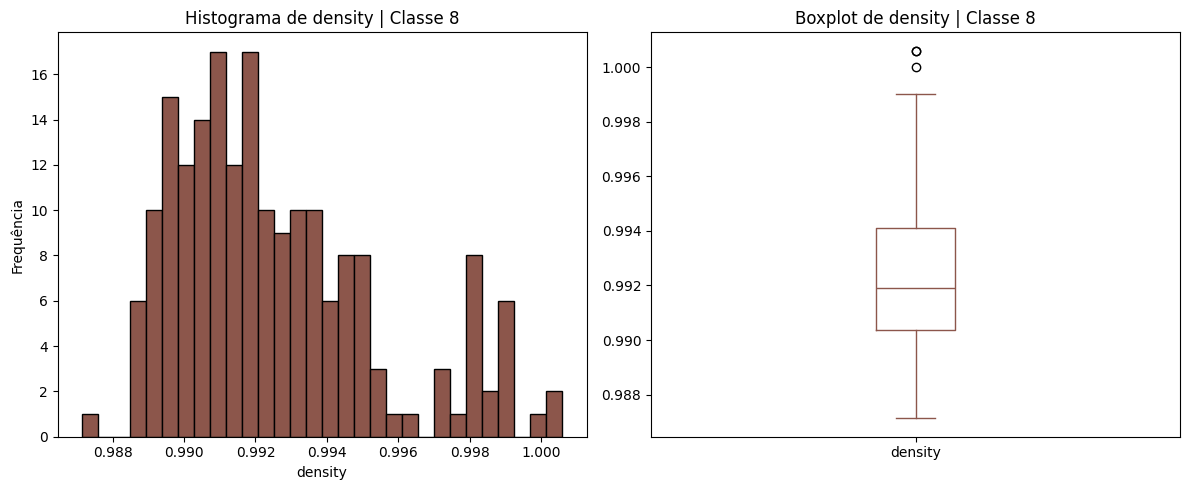

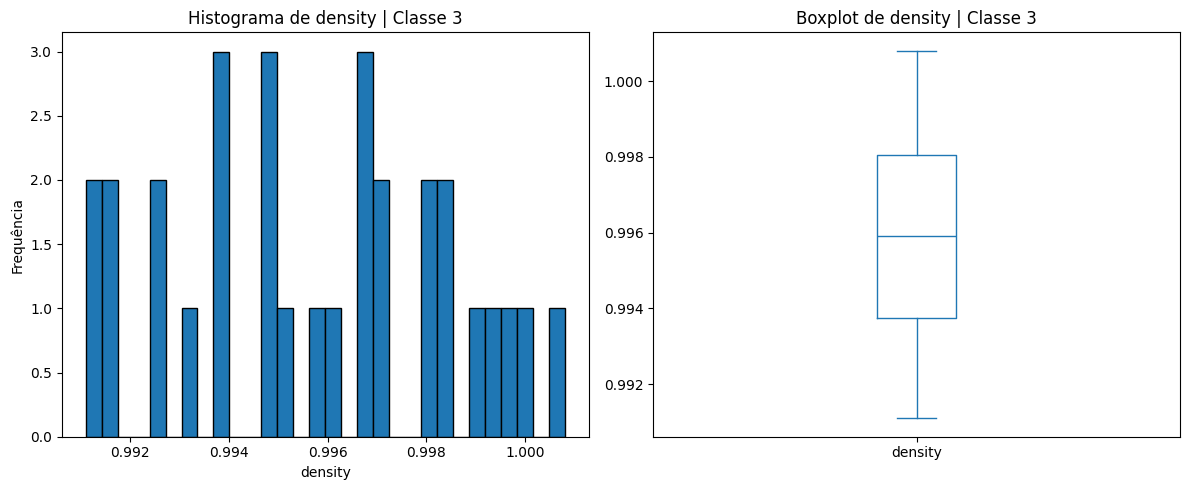

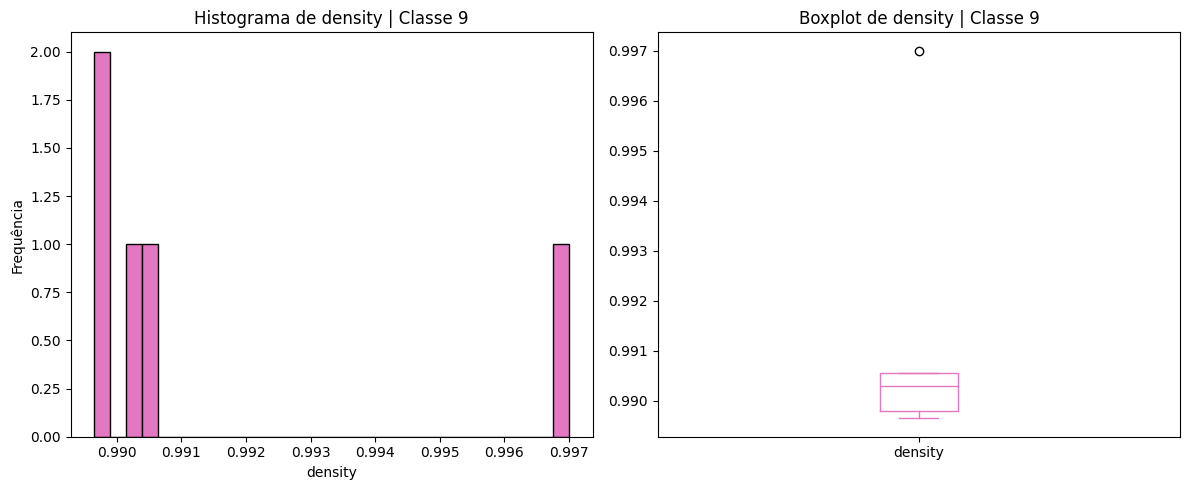

In [97]:
col = 'density'

for cls in results_datfra[results_datfra['Coluna'] == col]['Classe'].unique():
    subset = datfra[datfra['class'] == cls][col].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma com cor definida pelo dicionário
    subset.plot.hist(bins=30, ax=axes[0],
                     color=class_colors[cls], edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequência')
    axes[0].set_title(f'Histograma de {col} | Classe {cls}')

    subset.plot.box(ax=axes[1], color=dict(boxes=class_colors[cls],
                                           whiskers=class_colors[cls],
                                           medians=class_colors[cls],
                                           caps=class_colors[cls]))
    axes[1].set_title(f'Boxplot de {col} | Classe {cls}')

    plt.tight_layout()
    plt.show()


#### pH

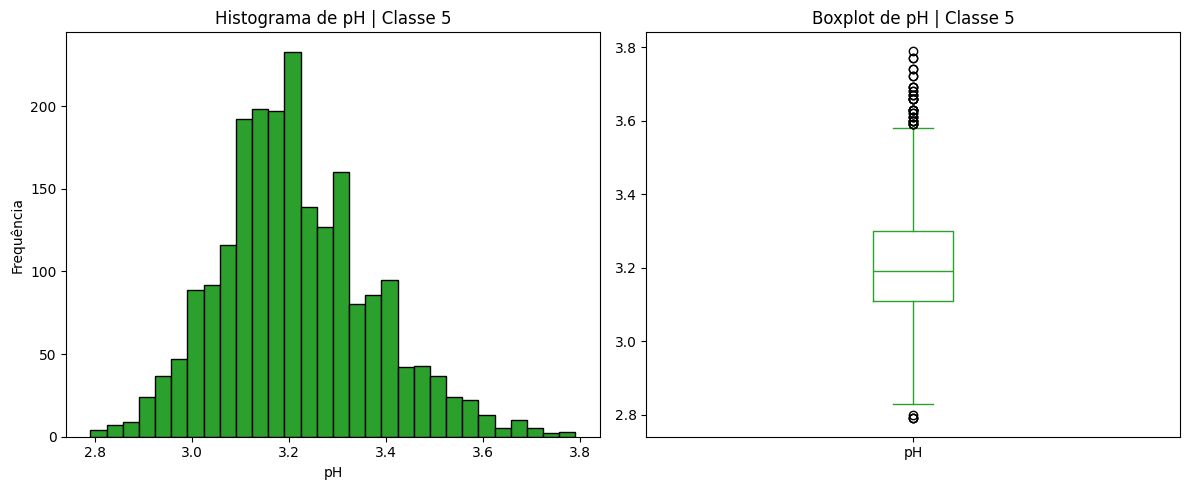

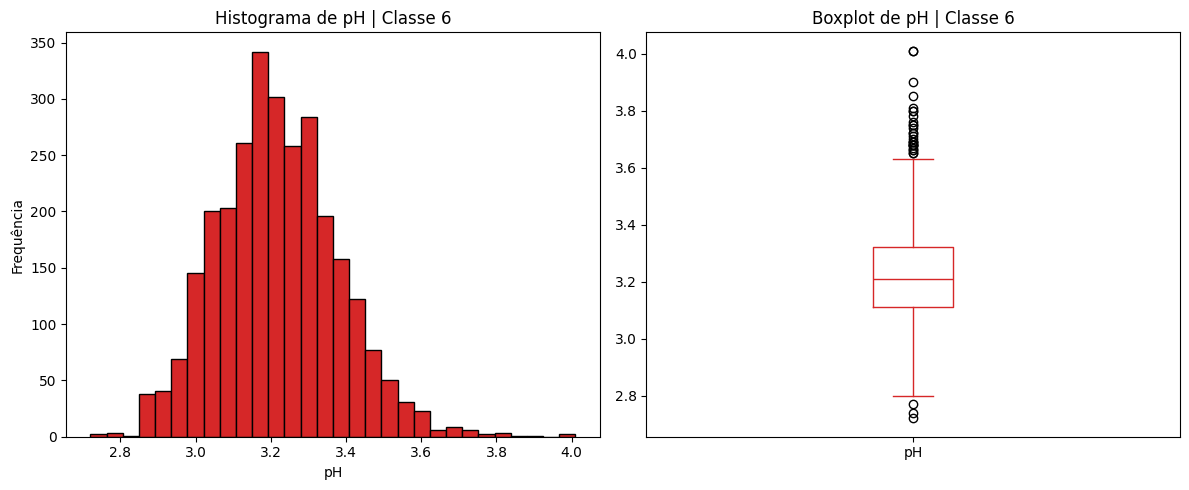

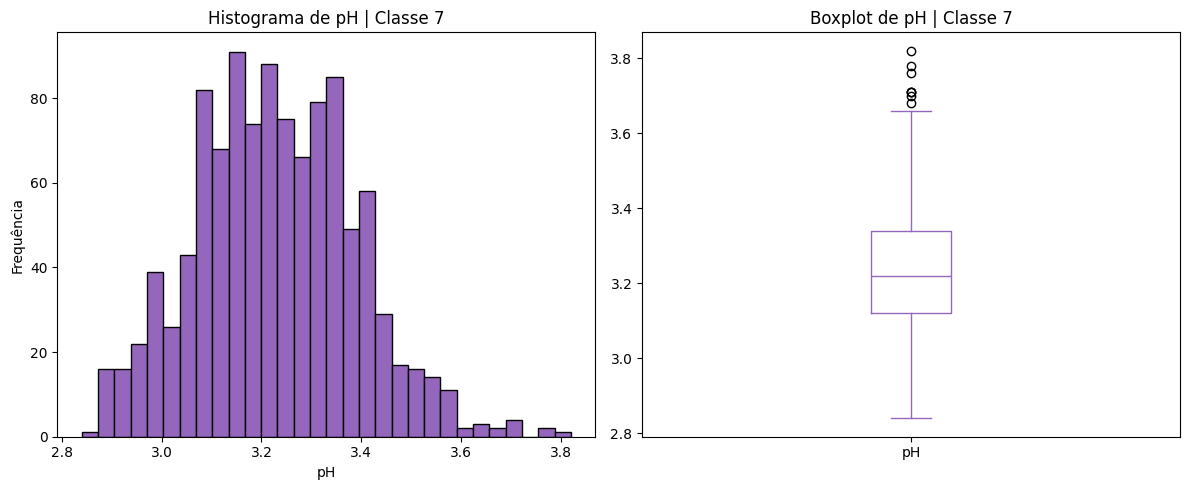

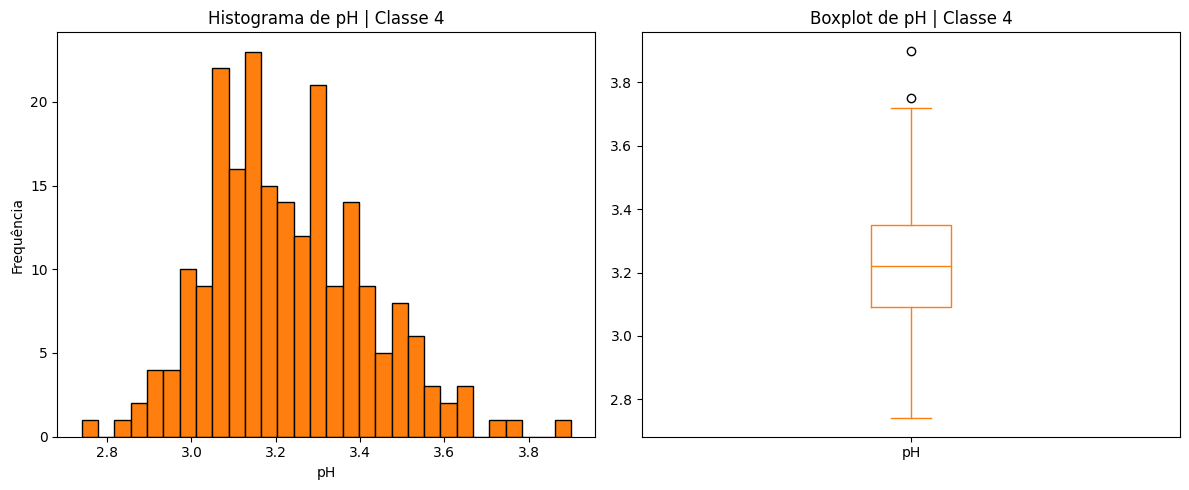

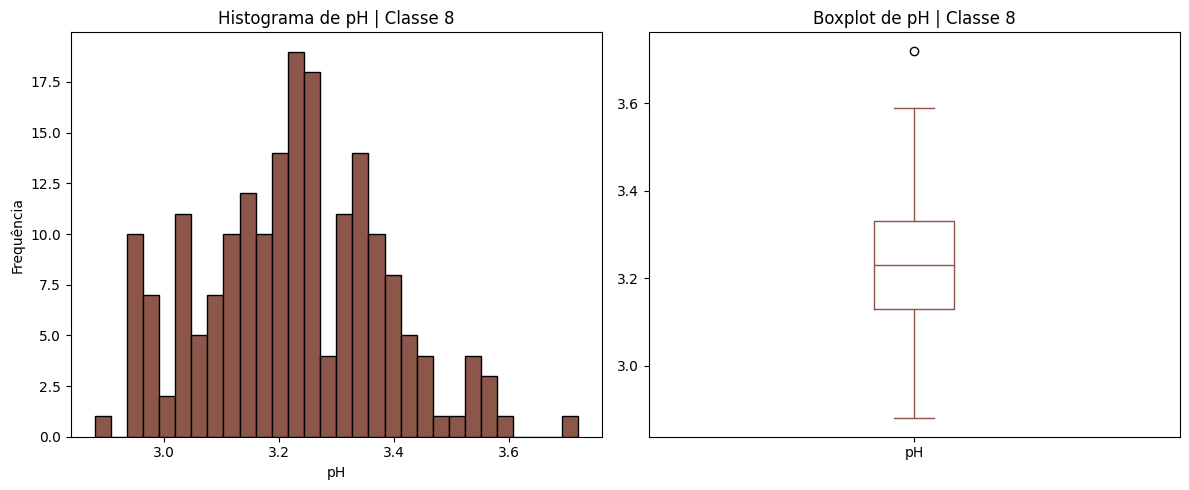

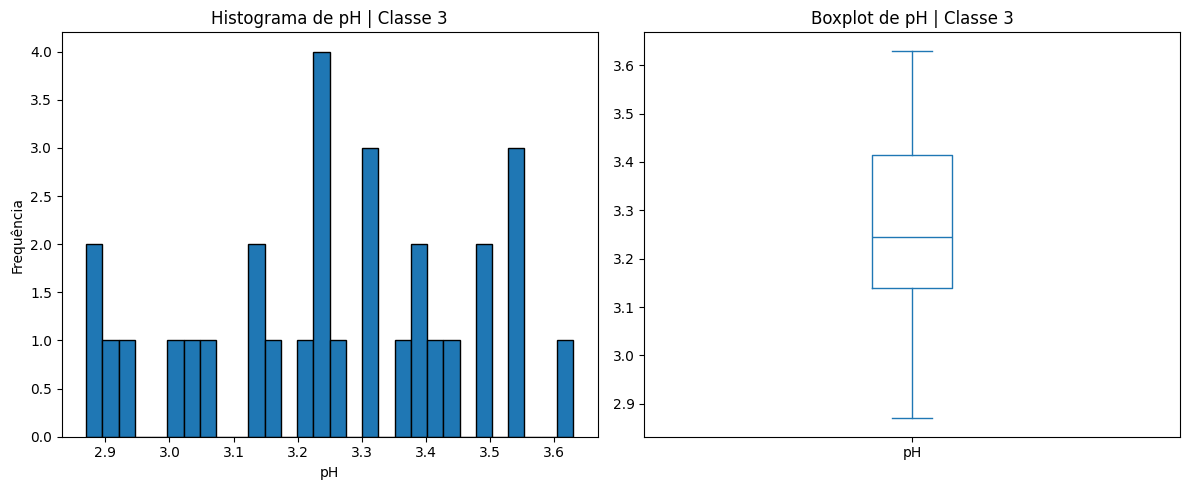

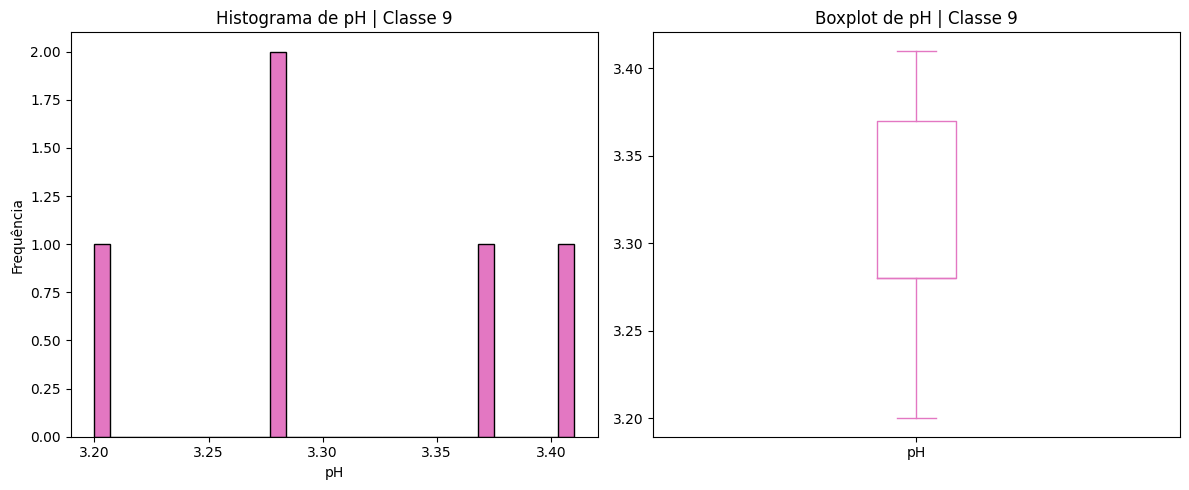

In [98]:
col = 'pH'

for cls in results_datfra[results_datfra['Coluna'] == col]['Classe'].unique():
    subset = datfra[datfra['class'] == cls][col].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma com cor definida pelo dicionário
    subset.plot.hist(bins=30, ax=axes[0],
                     color=class_colors[cls], edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequência')
    axes[0].set_title(f'Histograma de {col} | Classe {cls}')

    subset.plot.box(ax=axes[1], color=dict(boxes=class_colors[cls],
                                           whiskers=class_colors[cls],
                                           medians=class_colors[cls],
                                           caps=class_colors[cls]))
    axes[1].set_title(f'Boxplot de {col} | Classe {cls}')

    plt.tight_layout()
    plt.show()


#### Sulphates

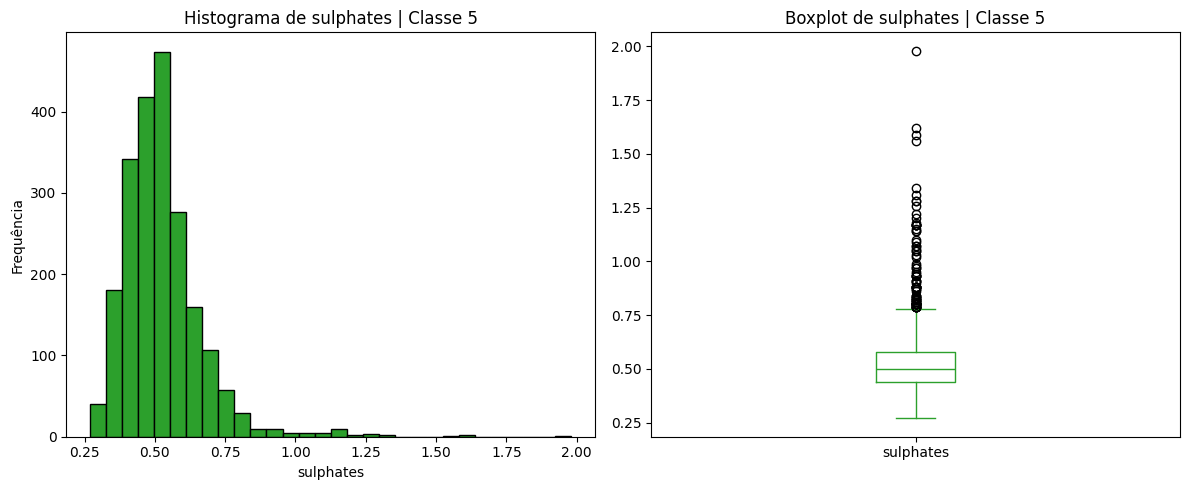

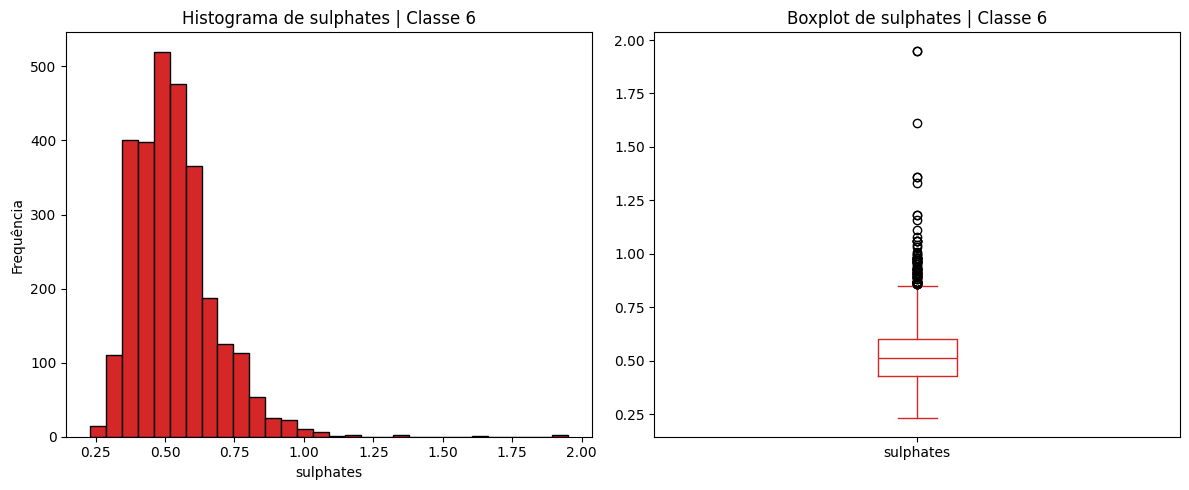

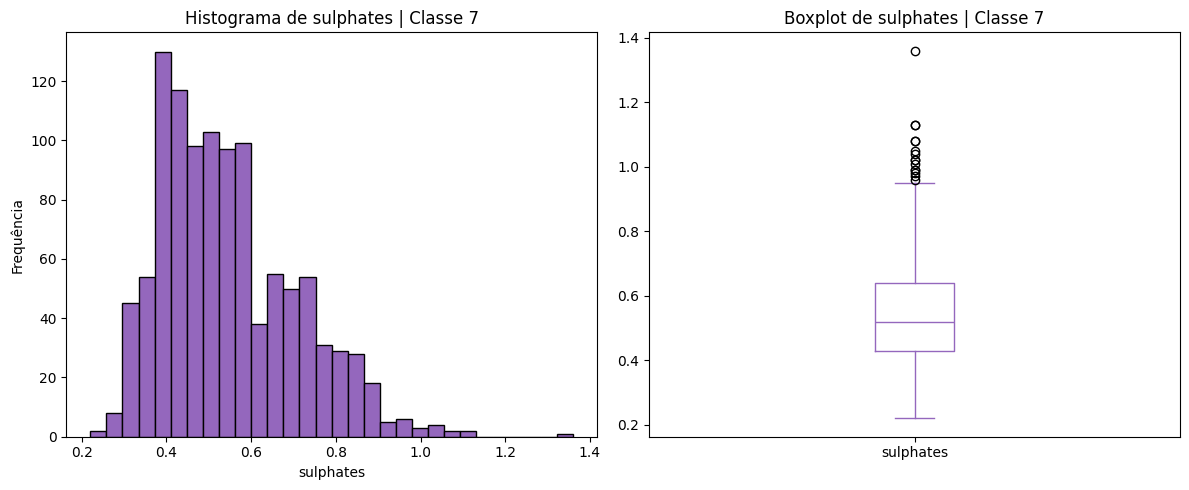

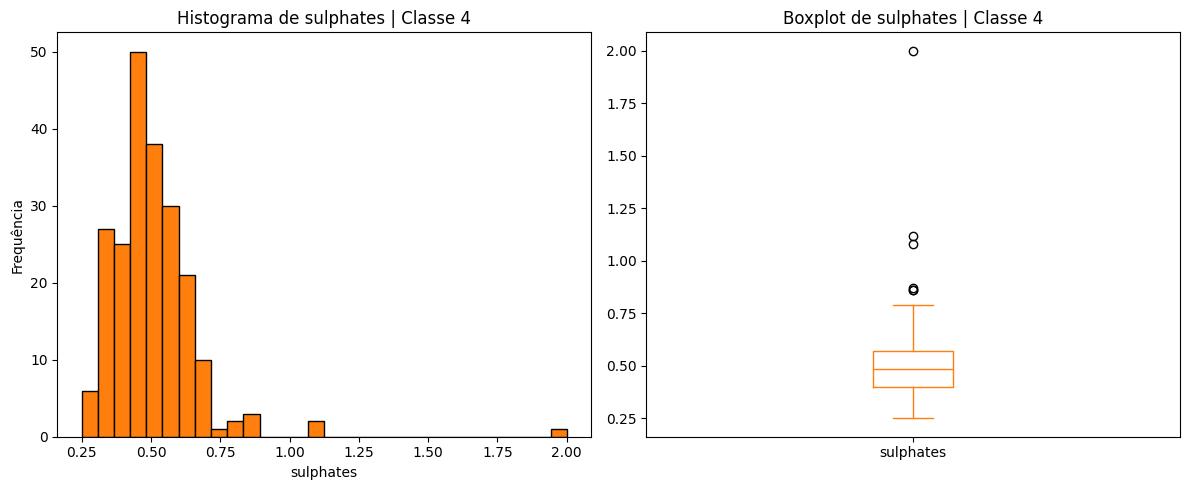

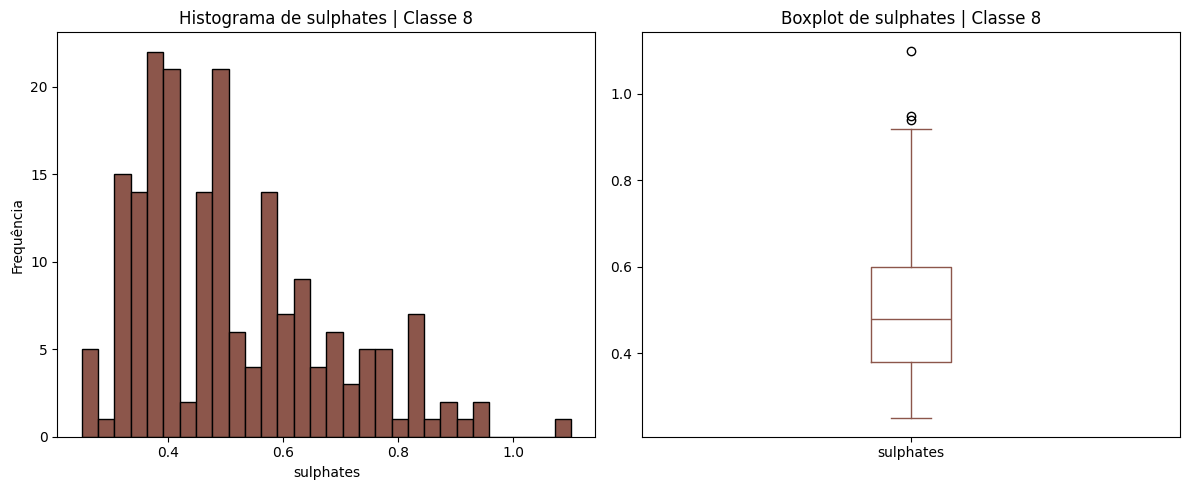

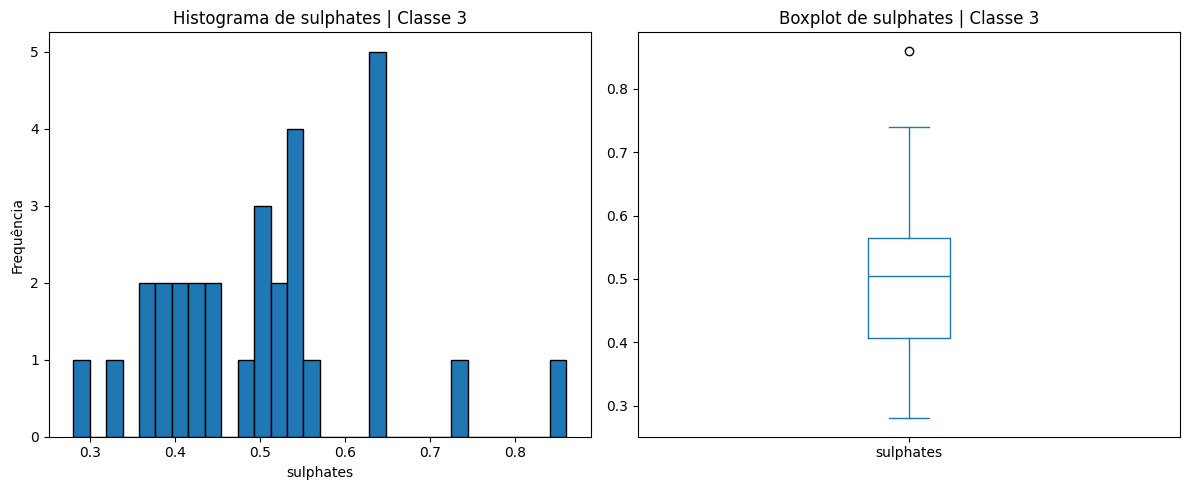

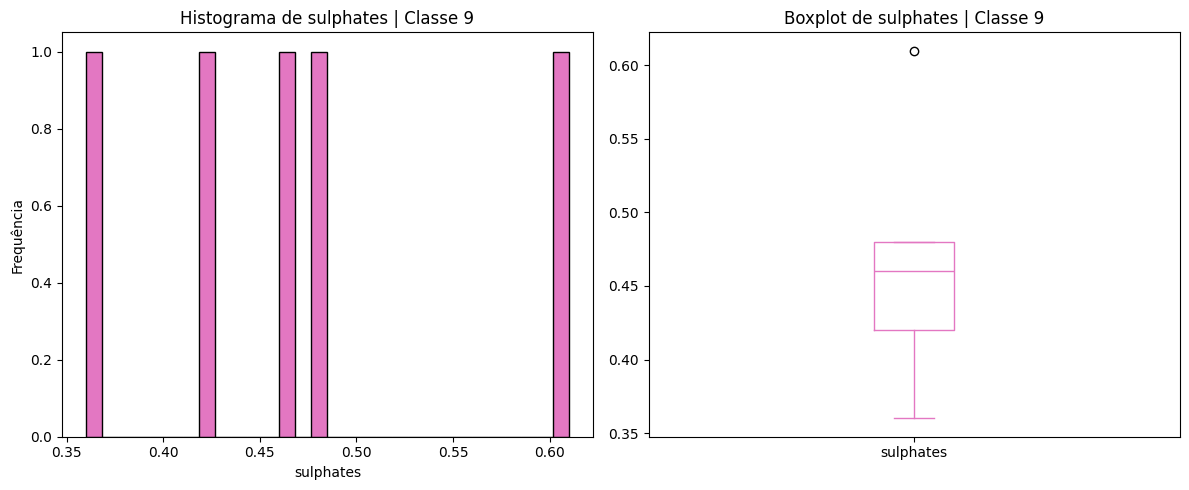

In [99]:
col = 'sulphates'

for cls in results_datfra[results_datfra['Coluna'] == col]['Classe'].unique():
    subset = datfra[datfra['class'] == cls][col].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma com cor definida pelo dicionário
    subset.plot.hist(bins=30, ax=axes[0],
                     color=class_colors[cls], edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequência')
    axes[0].set_title(f'Histograma de {col} | Classe {cls}')

    subset.plot.box(ax=axes[1], color=dict(boxes=class_colors[cls],
                                           whiskers=class_colors[cls],
                                           medians=class_colors[cls],
                                           caps=class_colors[cls]))
    axes[1].set_title(f'Boxplot de {col} | Classe {cls}')

    plt.tight_layout()
    plt.show()


#### Alcohol

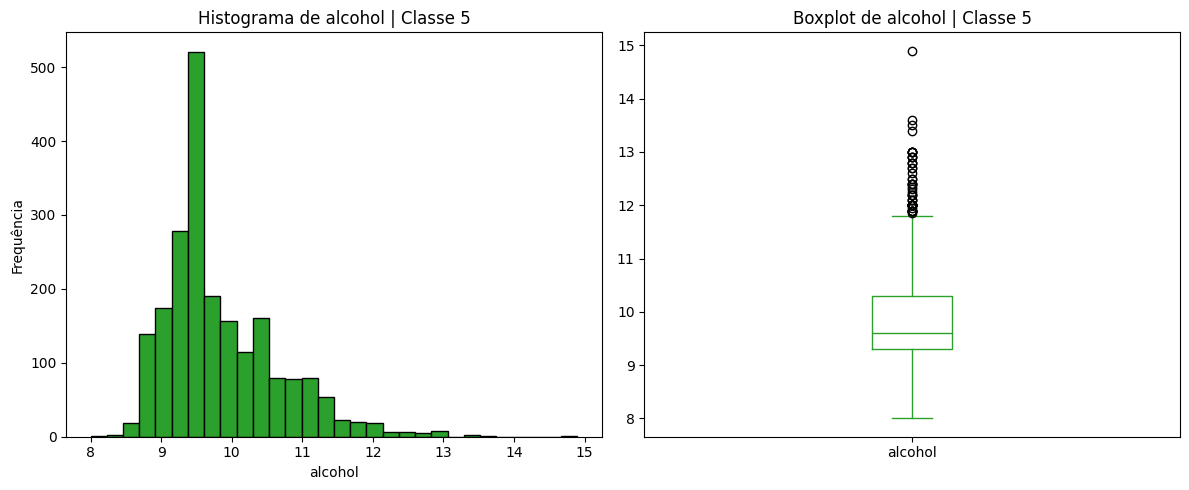

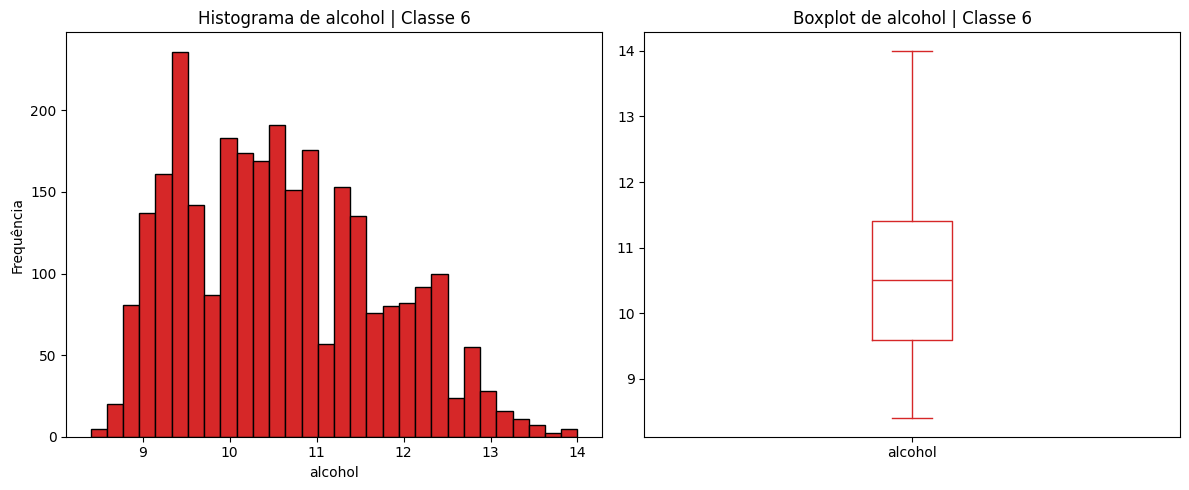

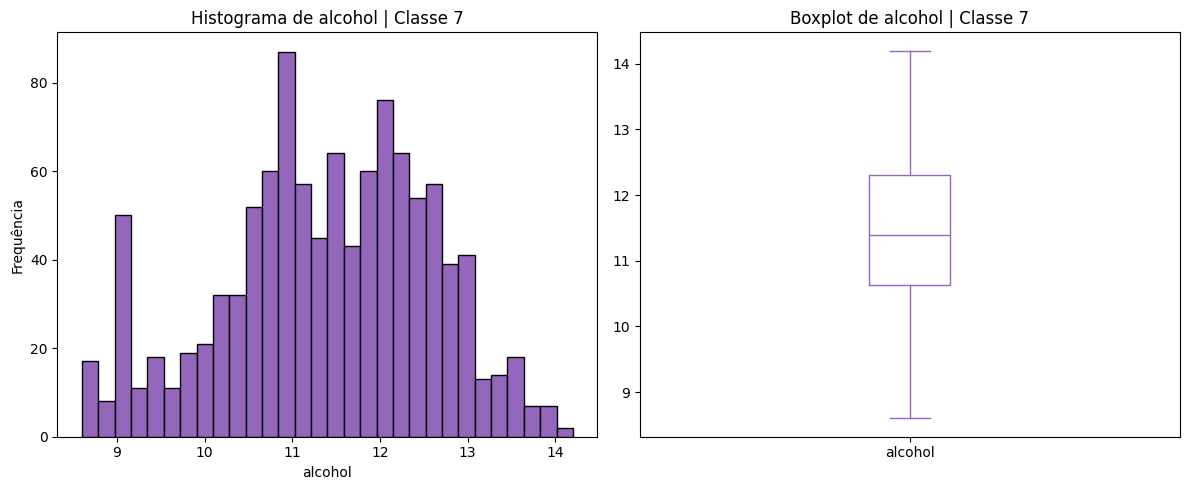

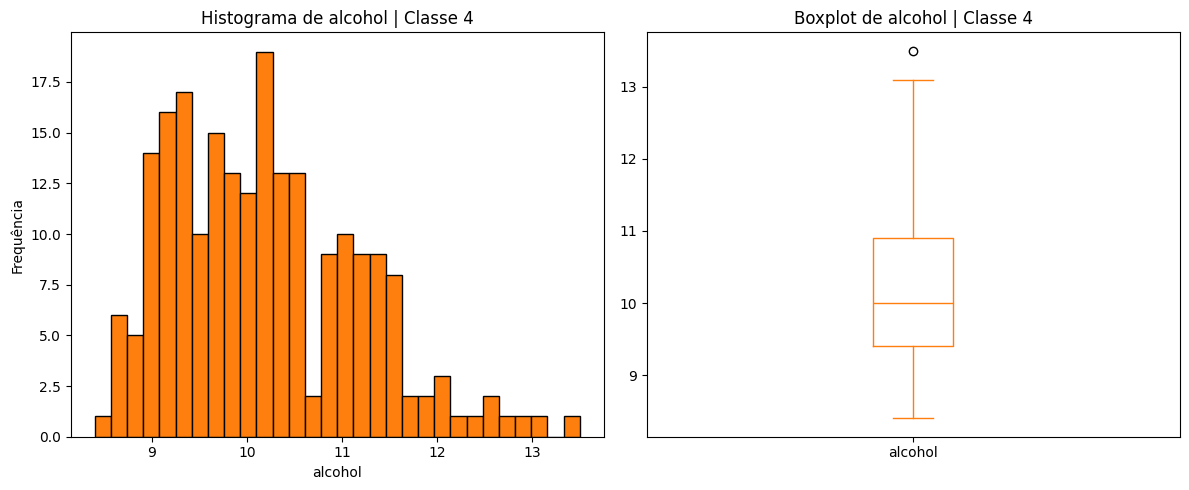

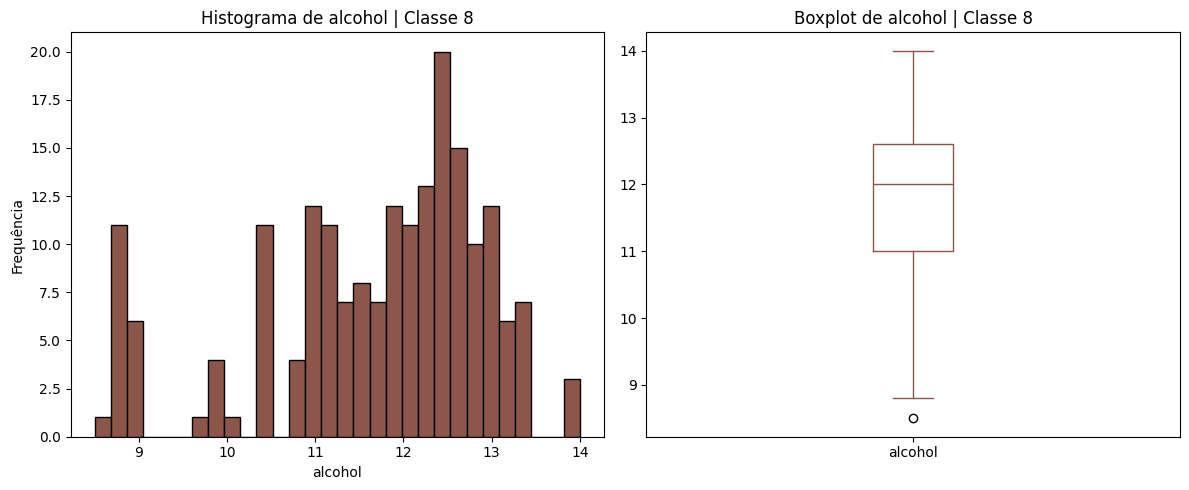

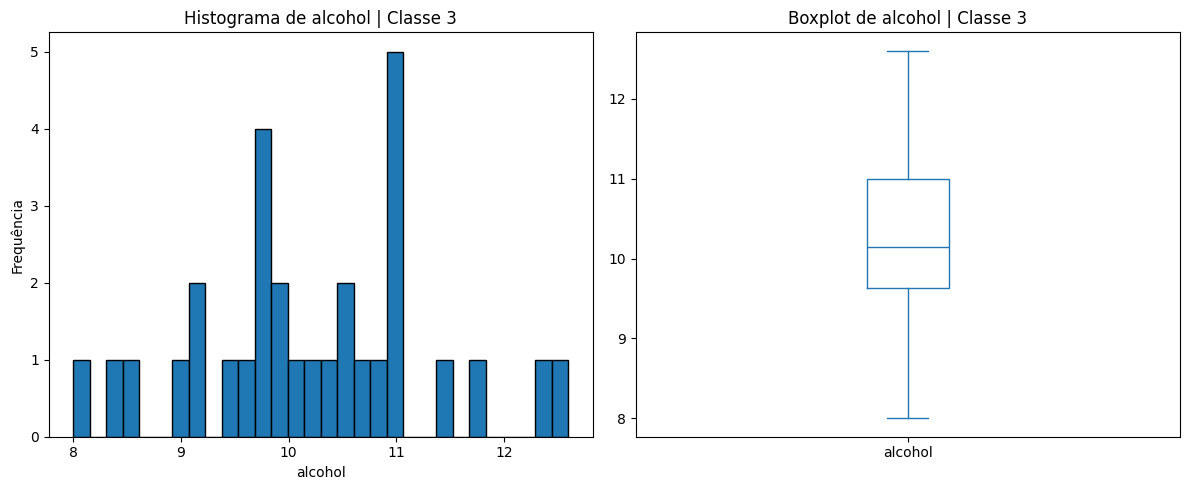

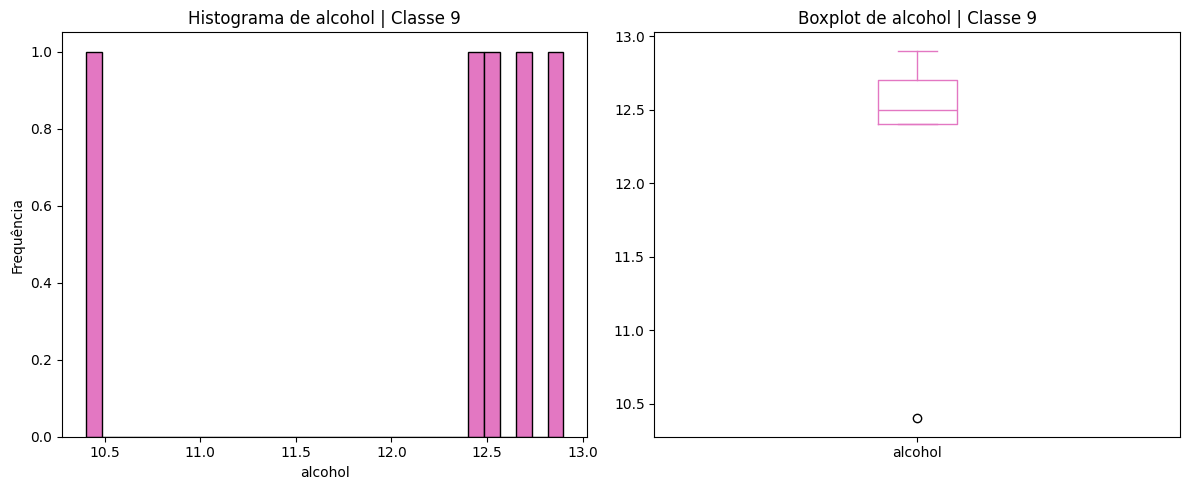

In [100]:
col = 'alcohol'

for cls in results_datfra[results_datfra['Coluna'] == col]['Classe'].unique():
    subset = datfra[datfra['class'] == cls][col].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma com cor definida pelo dicionário
    subset.plot.hist(bins=30, ax=axes[0],
                     color=class_colors[cls], edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequência')
    axes[0].set_title(f'Histograma de {col} | Classe {cls}')

    subset.plot.box(ax=axes[1], color=dict(boxes=class_colors[cls],
                                           whiskers=class_colors[cls],
                                           medians=class_colors[cls],
                                           caps=class_colors[cls]))
    axes[1].set_title(f'Boxplot de {col} | Classe {cls}')

    plt.tight_layout()
    plt.show()


### Resultados por Classe

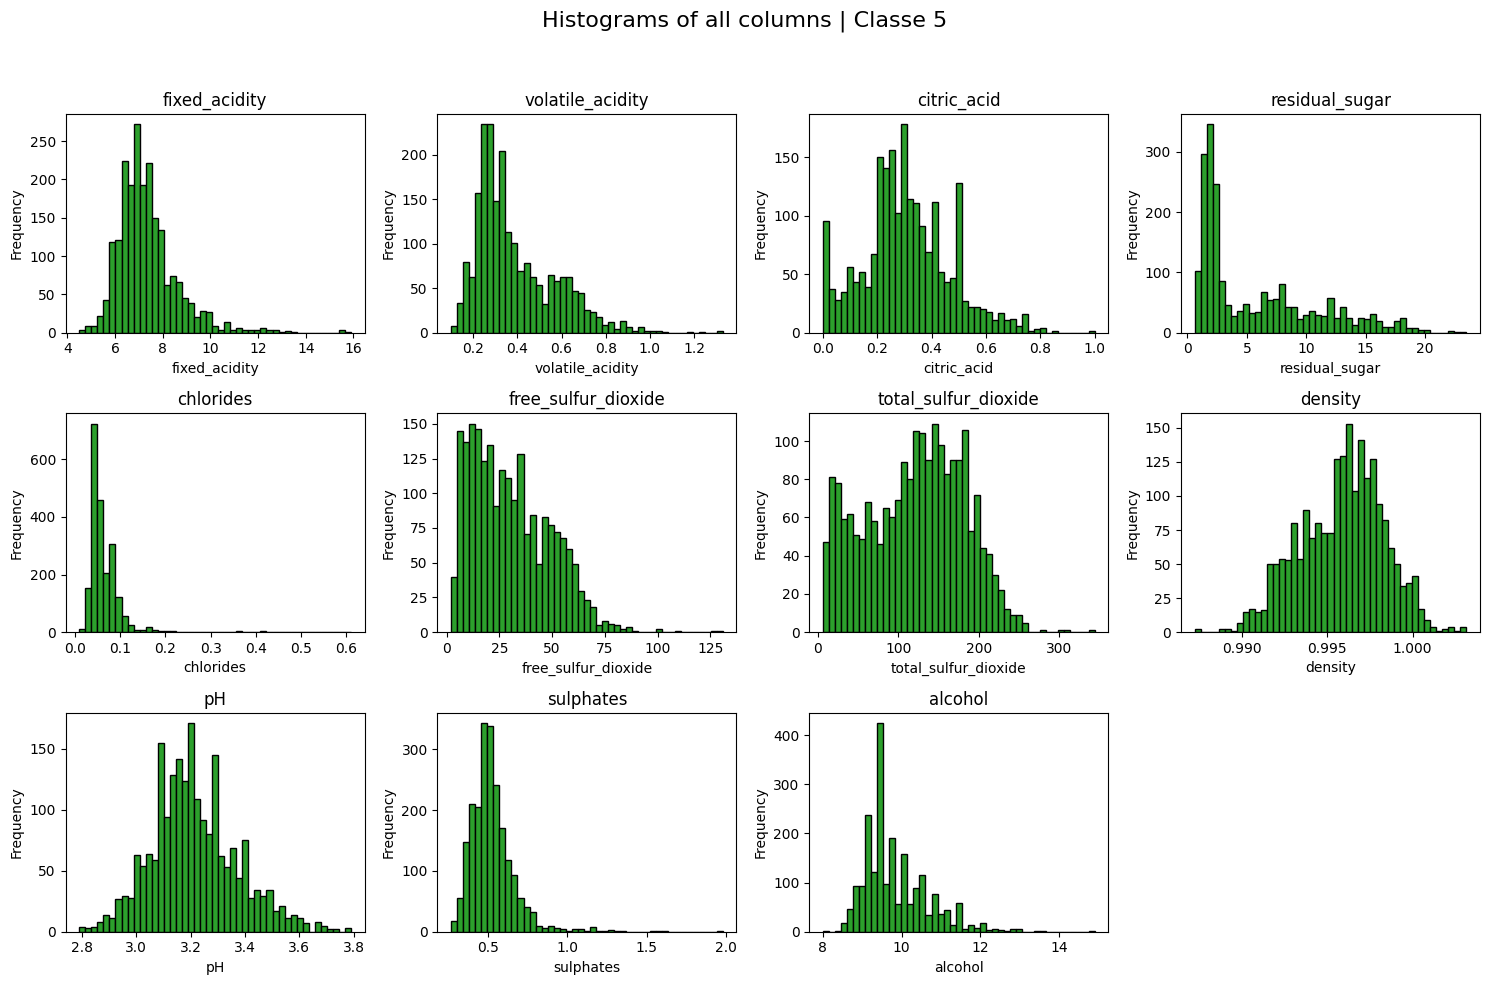

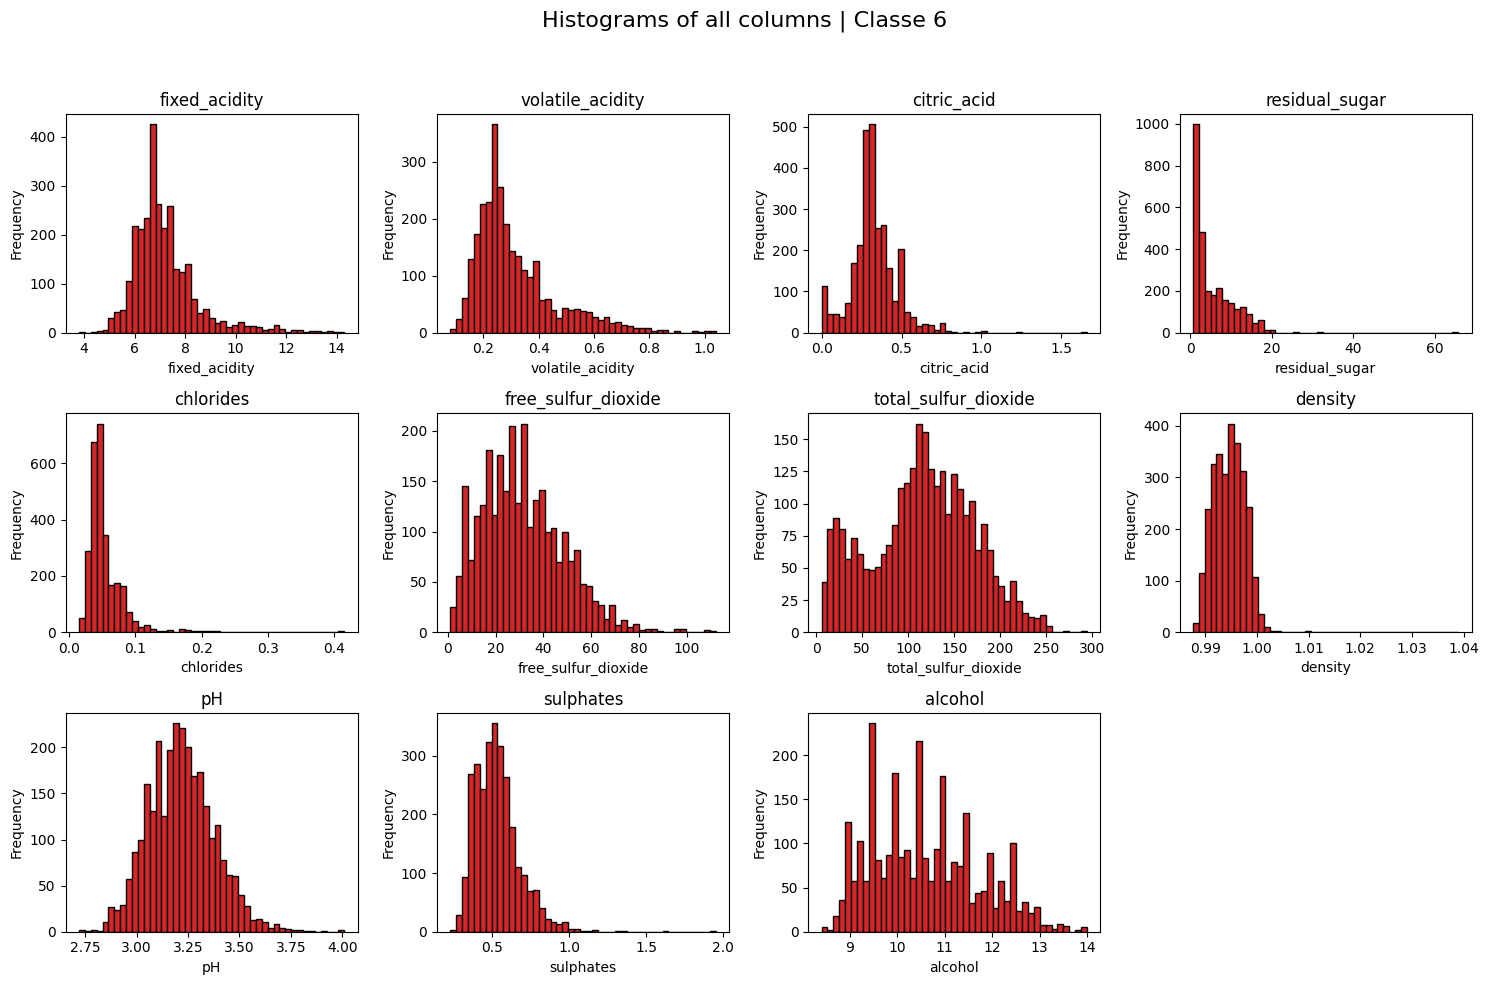

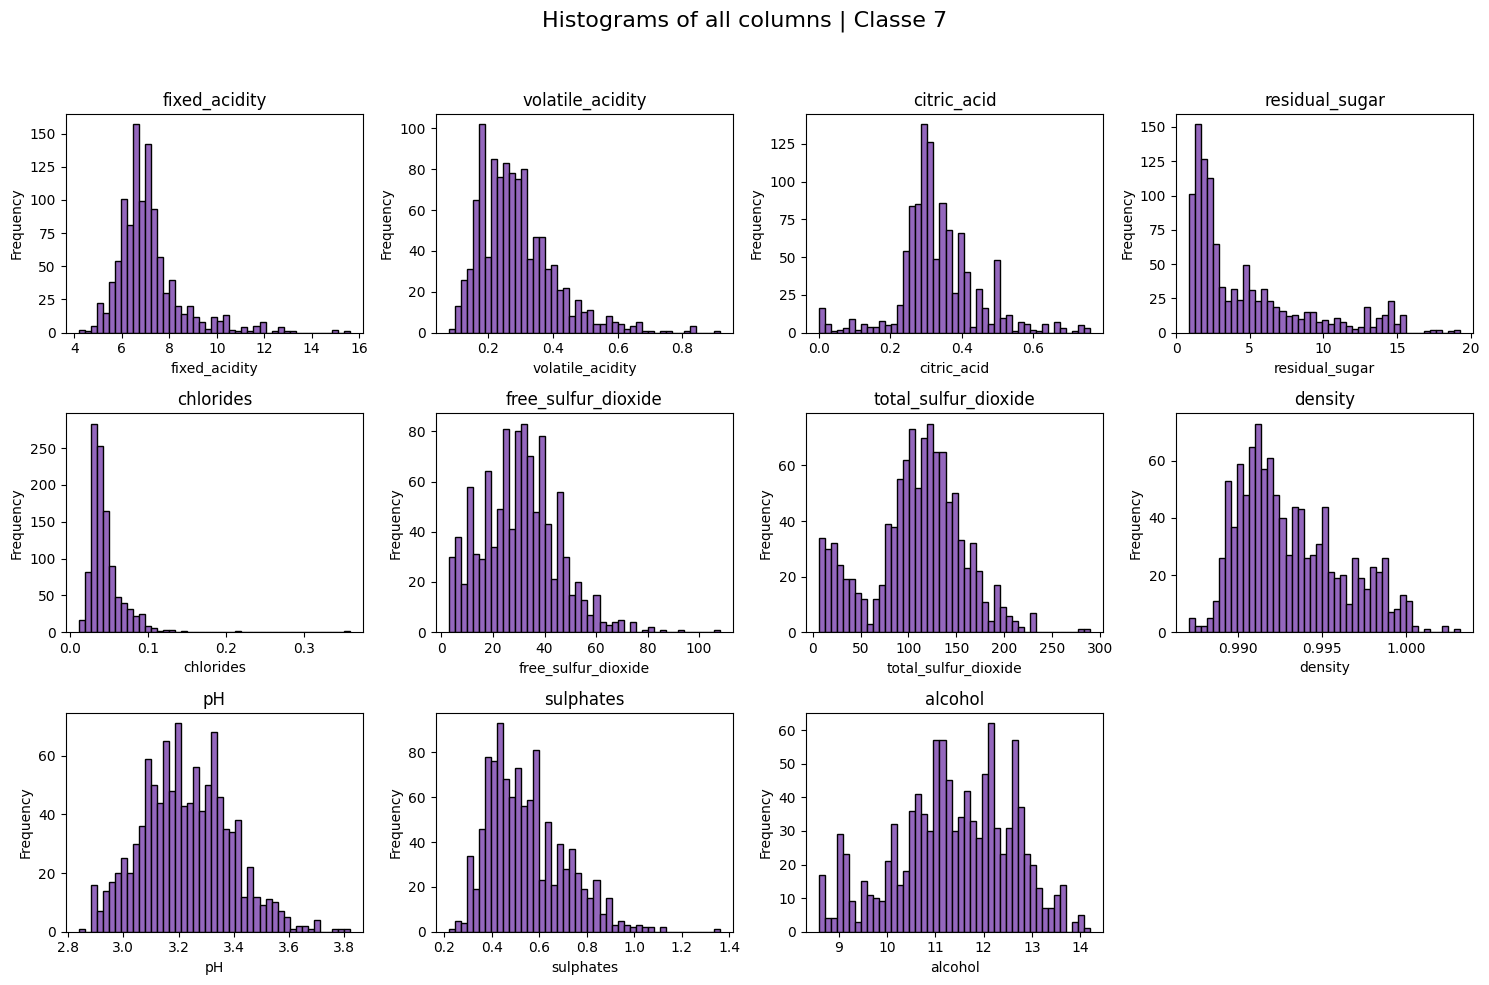

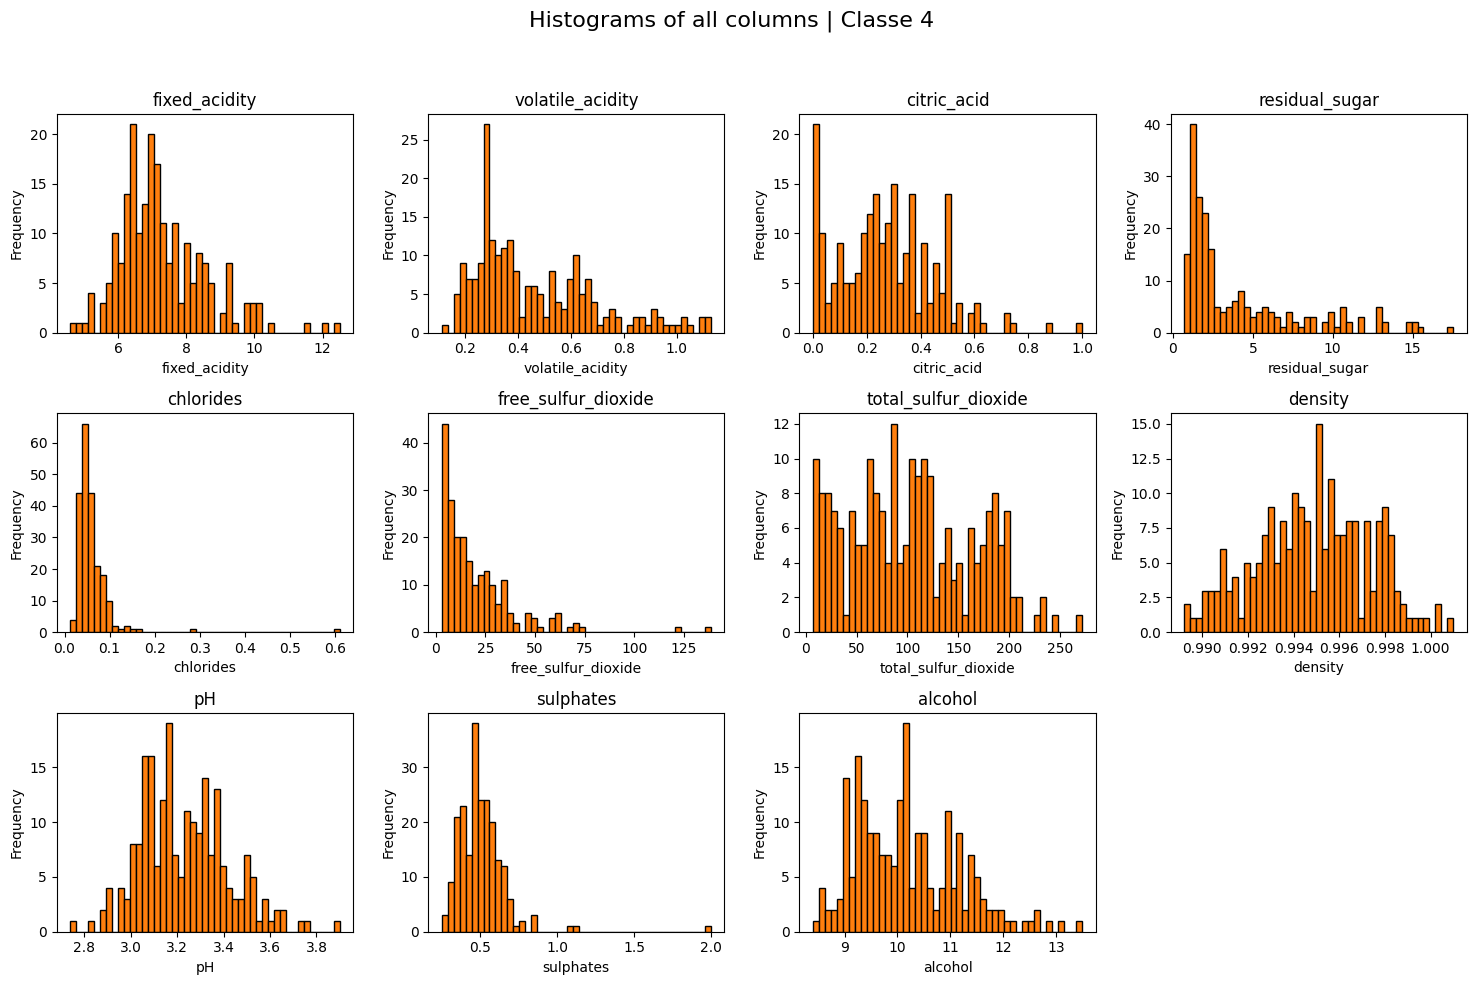

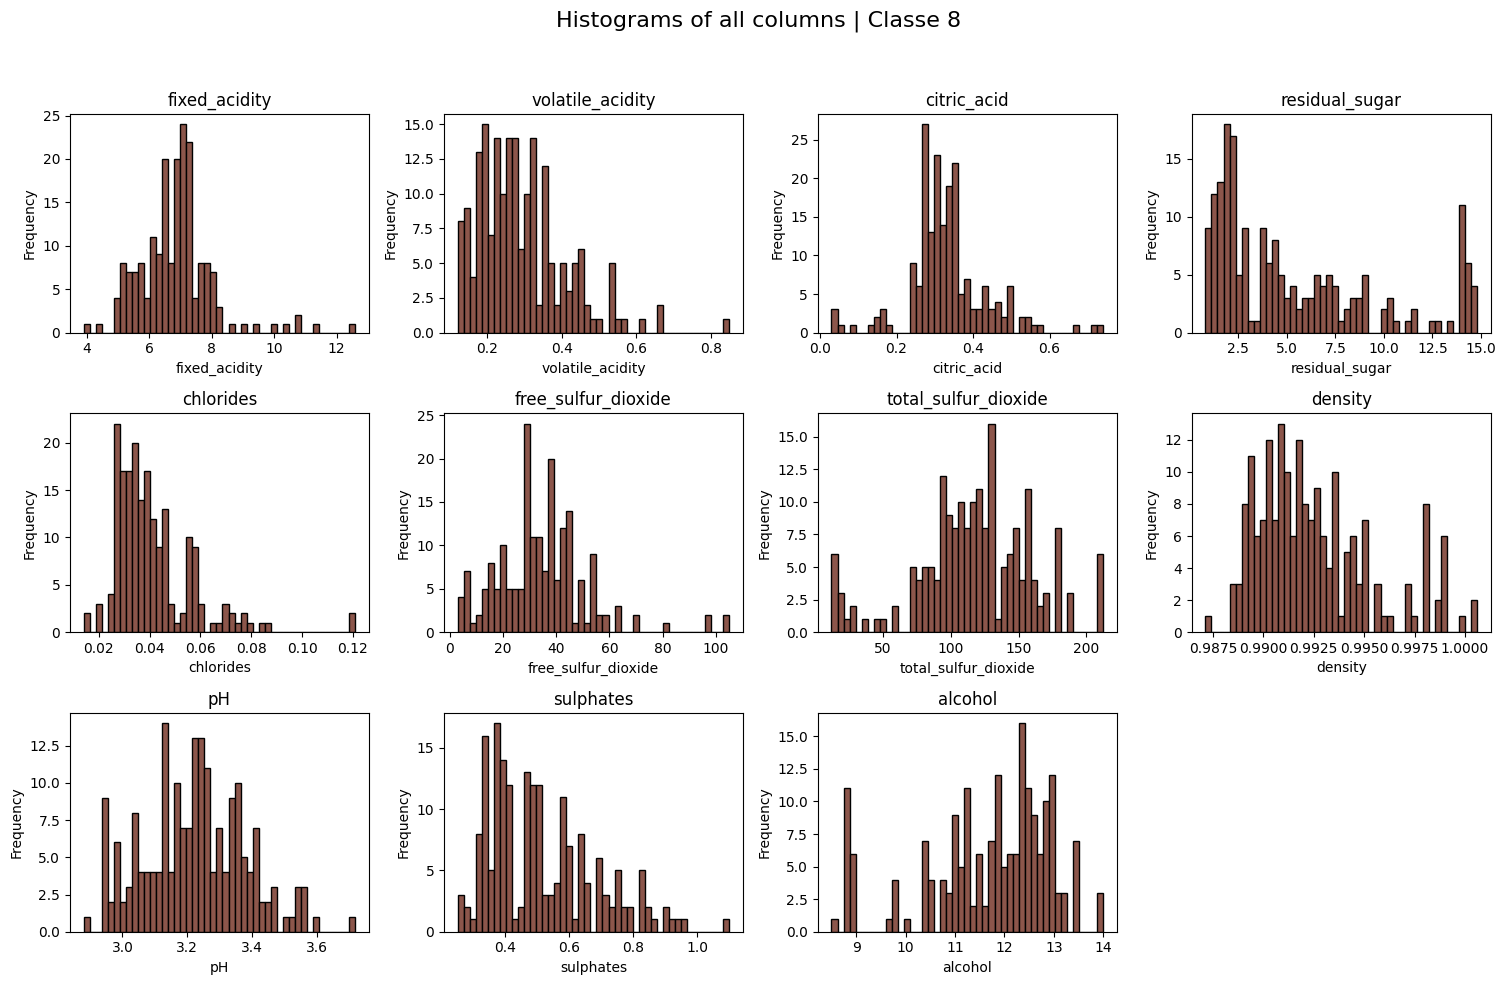

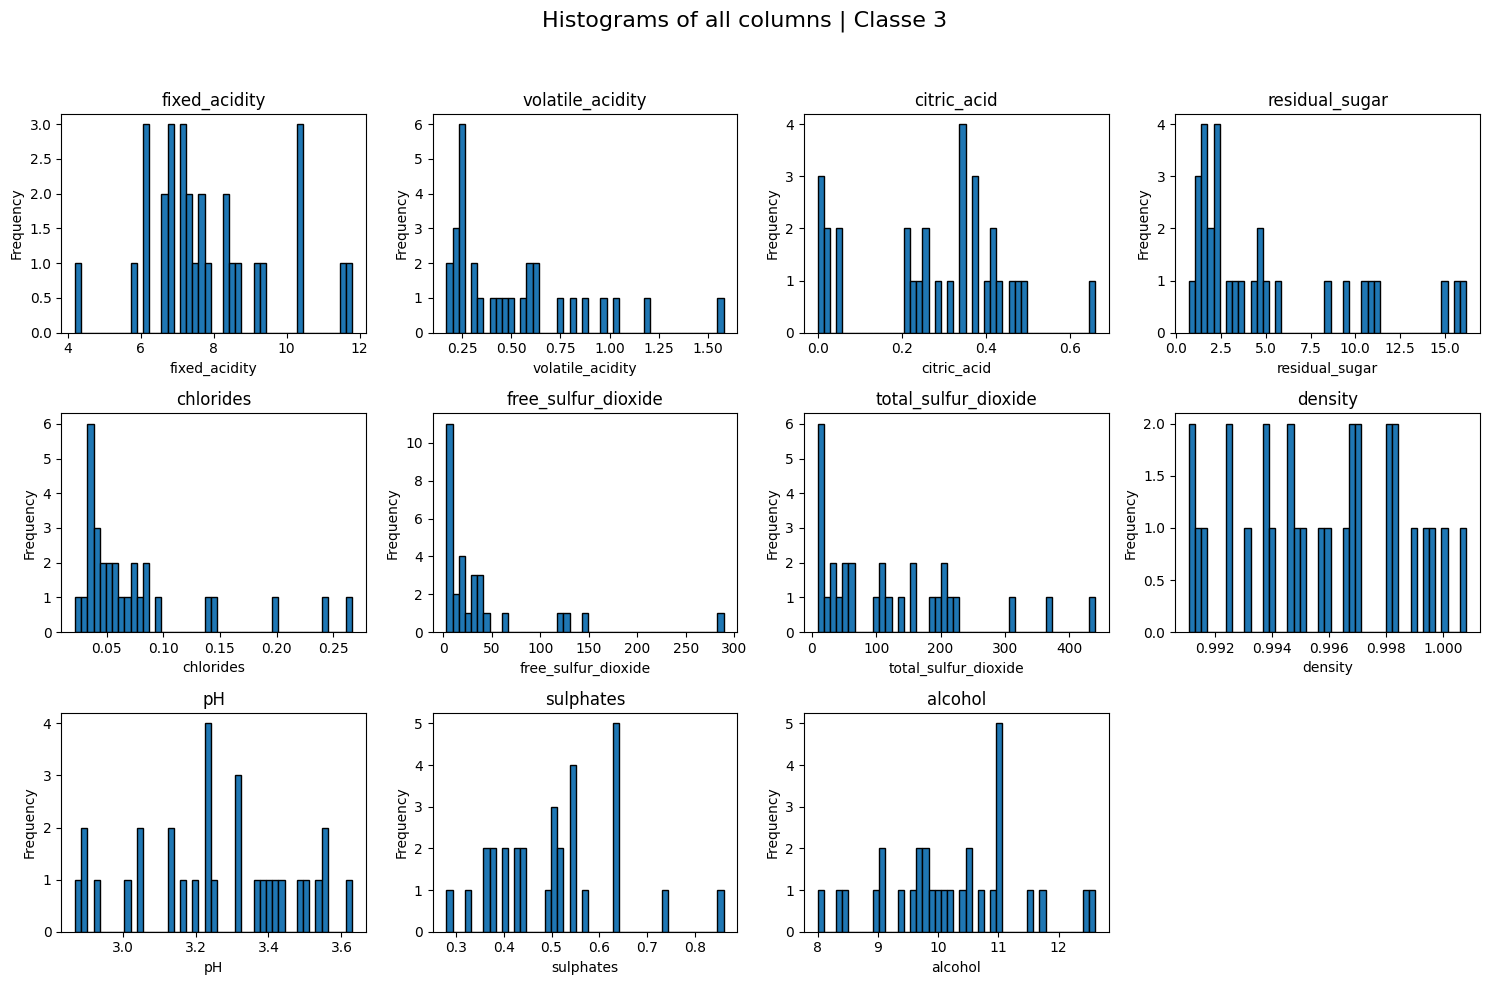

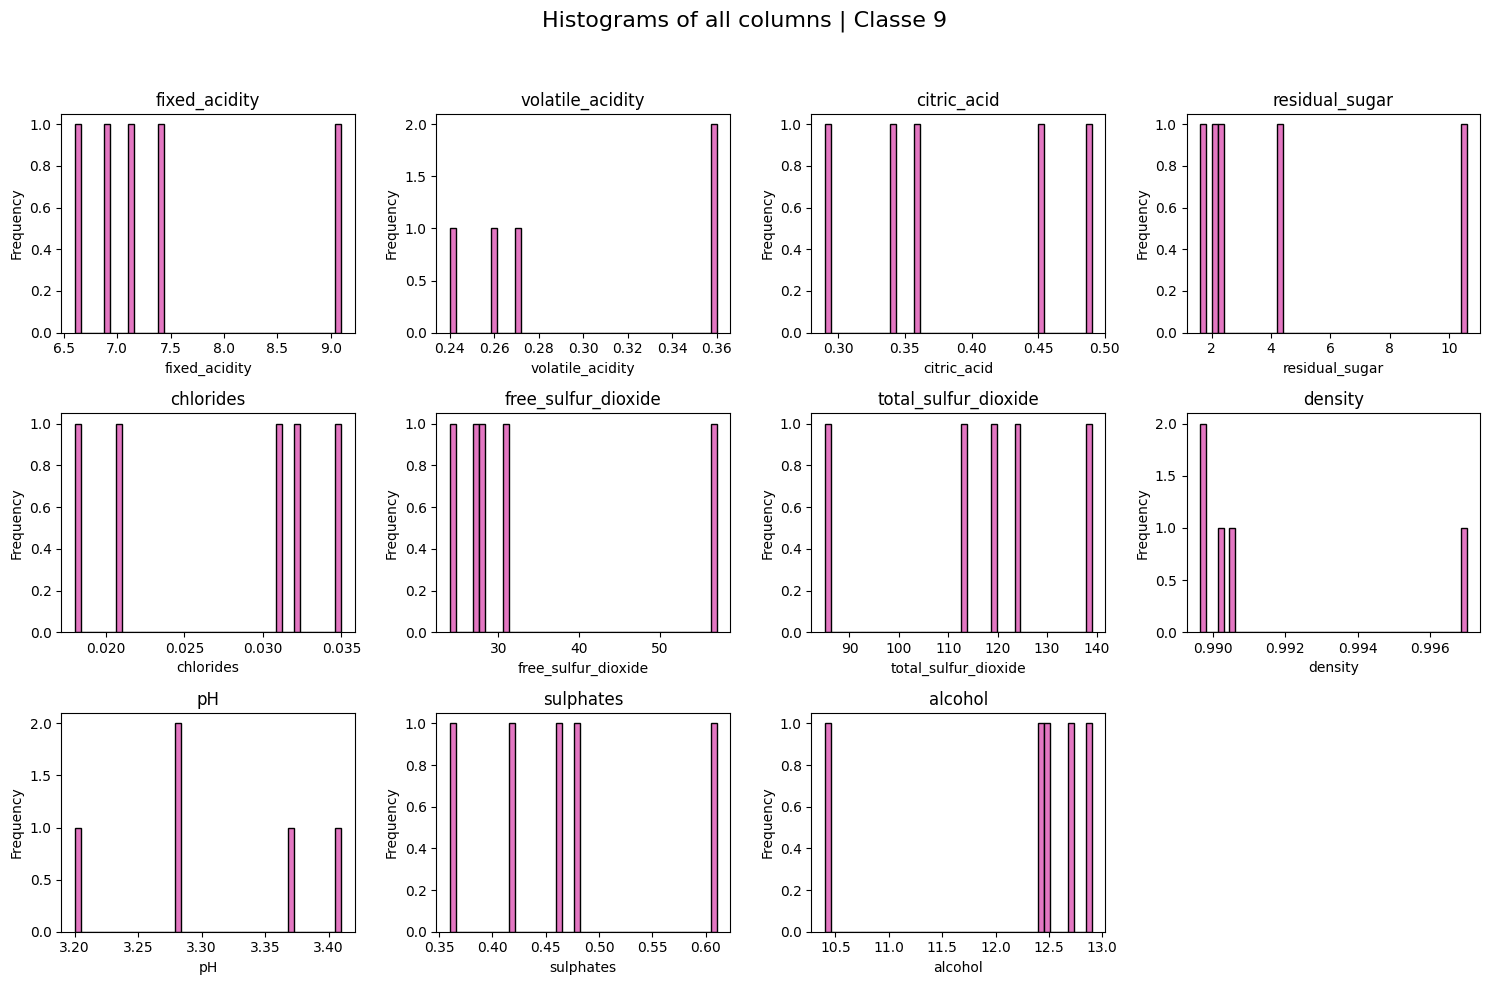

In [102]:
import matplotlib.pyplot as plt

columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
           'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
           'density', 'pH', 'sulphates', 'alcohol']

for cls in datfra['class'].unique(): # Loop por classe
    fig, axes = plt.subplots(3, 4, figsize=(15, 10))
    plt.suptitle(f'Histograms of all columns | Classe {cls}', fontsize=16)
    axes = axes.ravel()

    for i, col in enumerate(columns):
        subset = datfra[datfra['class'] == cls][col].dropna()  # Subconjunto da coluna para a classe atual
        subset.plot.hist(bins=45, ax=axes[i], color=class_colors[cls], edgecolor='black')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
        axes[i].set_title(f"{col}")

    # Pode sobrar algum eixo vazio, portanto:
    if len(columns) < len(axes):
        for j in range(len(columns), len(axes)):
            axes[j].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


## Vinhos Separados

###Vinho Branco

In [16]:
white_wine_data = pd.read_csv("dataset/winequality-white.csv", sep=';')

# X = todas as colunas exceto "quality"
Xw = white_wine_data.drop(columns=["quality"])
# Y = apenas a coluna "quality"
Yw = white_wine_data["quality"]


print(Xw.head())
print(Yw.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  
0    6
1

In [54]:
for col in Xw.columns:
  print(col)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


In [19]:
datfraW = Xw.copy()
datfraW['class'] = Yw

In [20]:
resultadosW = []

In [55]:
for col in Xw.columns: # Percorrendo cada preditor
  for cls in datfraW['class'].unique(): # Percorrendo cada valor dentro da classe "qualidade"
    subconjuntoW = datfraW[datfraW['class'] == cls][col] # Nesse caso, vai ser criado um subconjunto com
                                                      # uma lista booleana com true apenas onde a linha
                                                      # concorda com a classe atual
                                                      # Depois filtra para ficar apenas na coluna atual
                                                      # Assim resta apenas os valores da classe e da coluna
    media = subconjuntoW.mean()
    desvio_padrao = subconjuntoW.std()
    valor_skew = skew(subconjuntoW)

    resultadosW.append([col, cls, media, desvio_padrao, valor_skew])

In [24]:
results_datfraW = pd.DataFrame(resultadosW, columns=['Coluna', 'Classe', 'Média', 'Desvio Padrão', 'Skew'])

#### Resultados por Classe

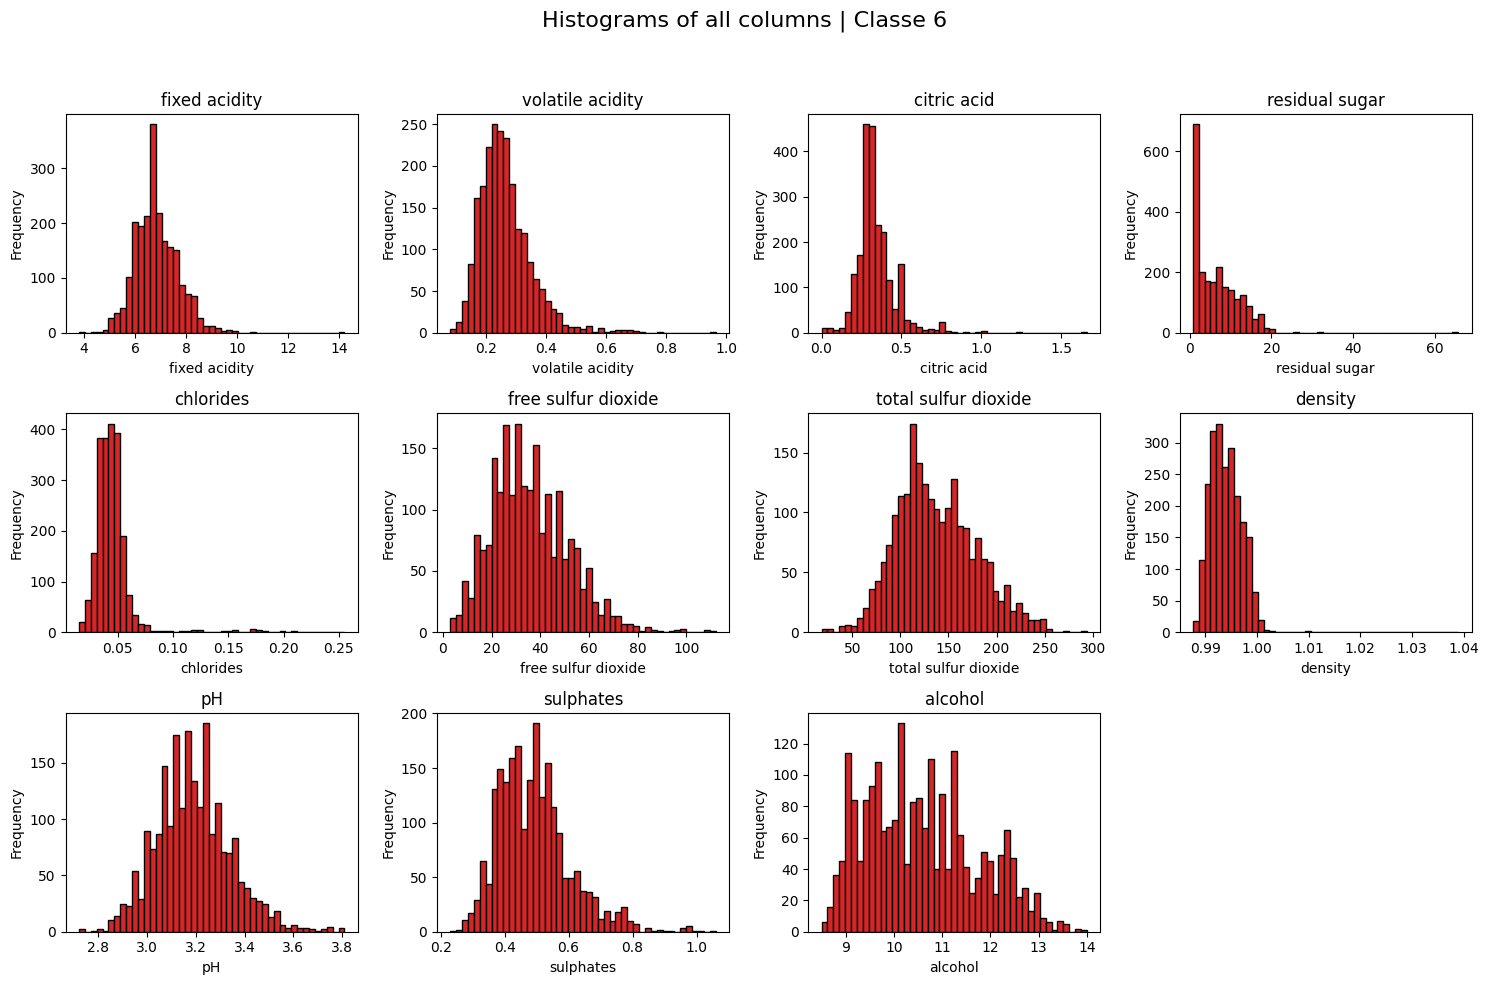

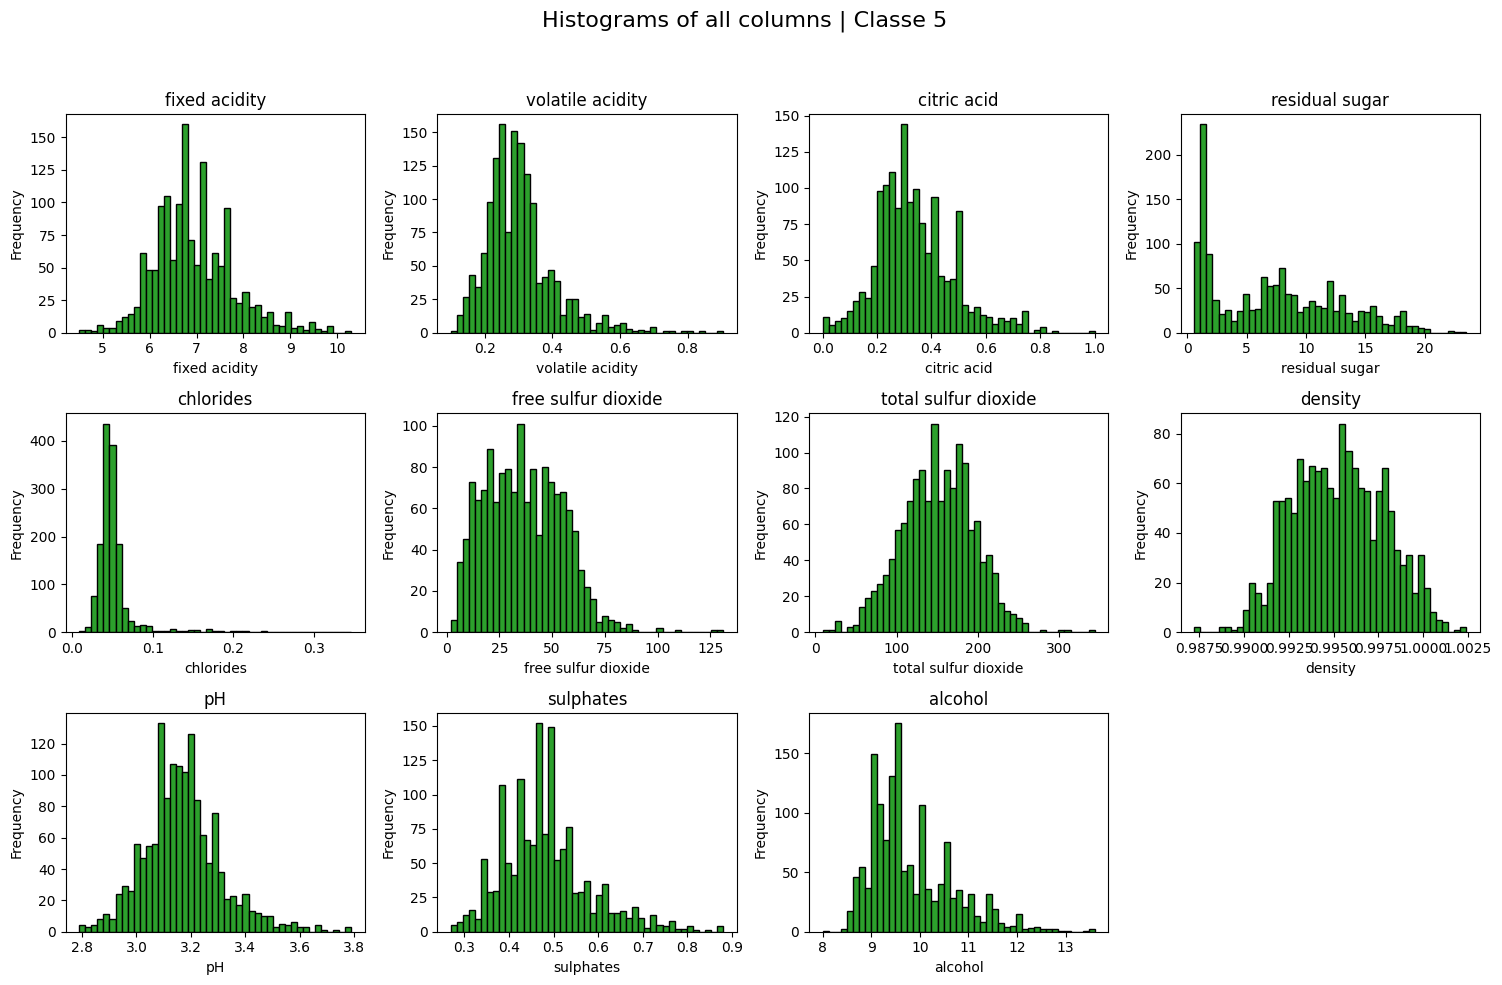

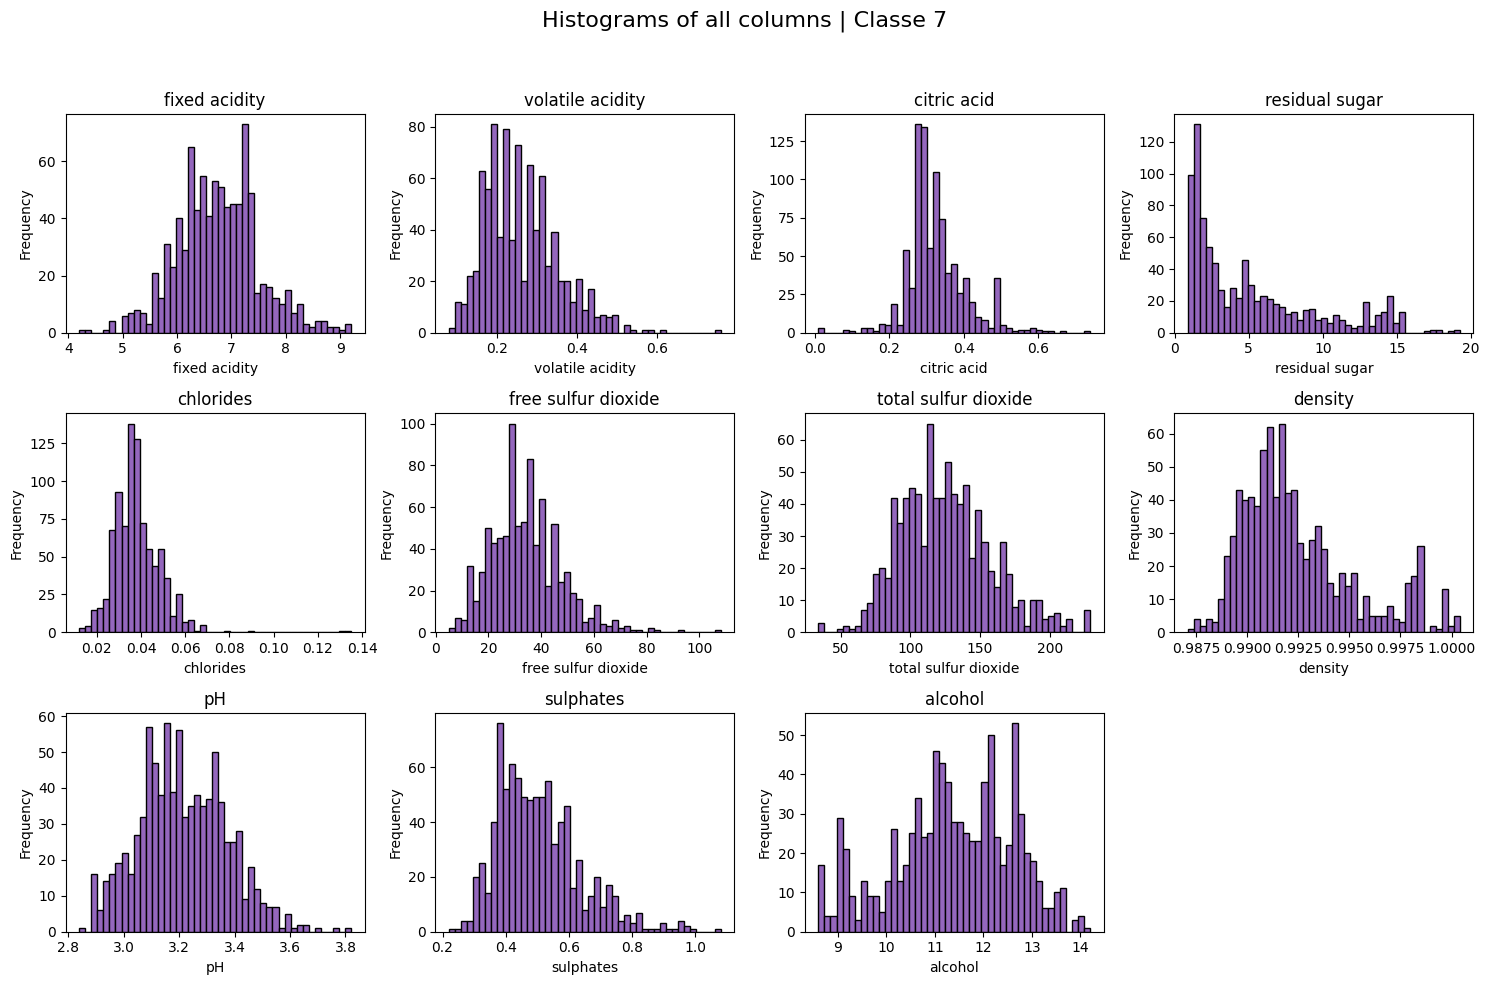

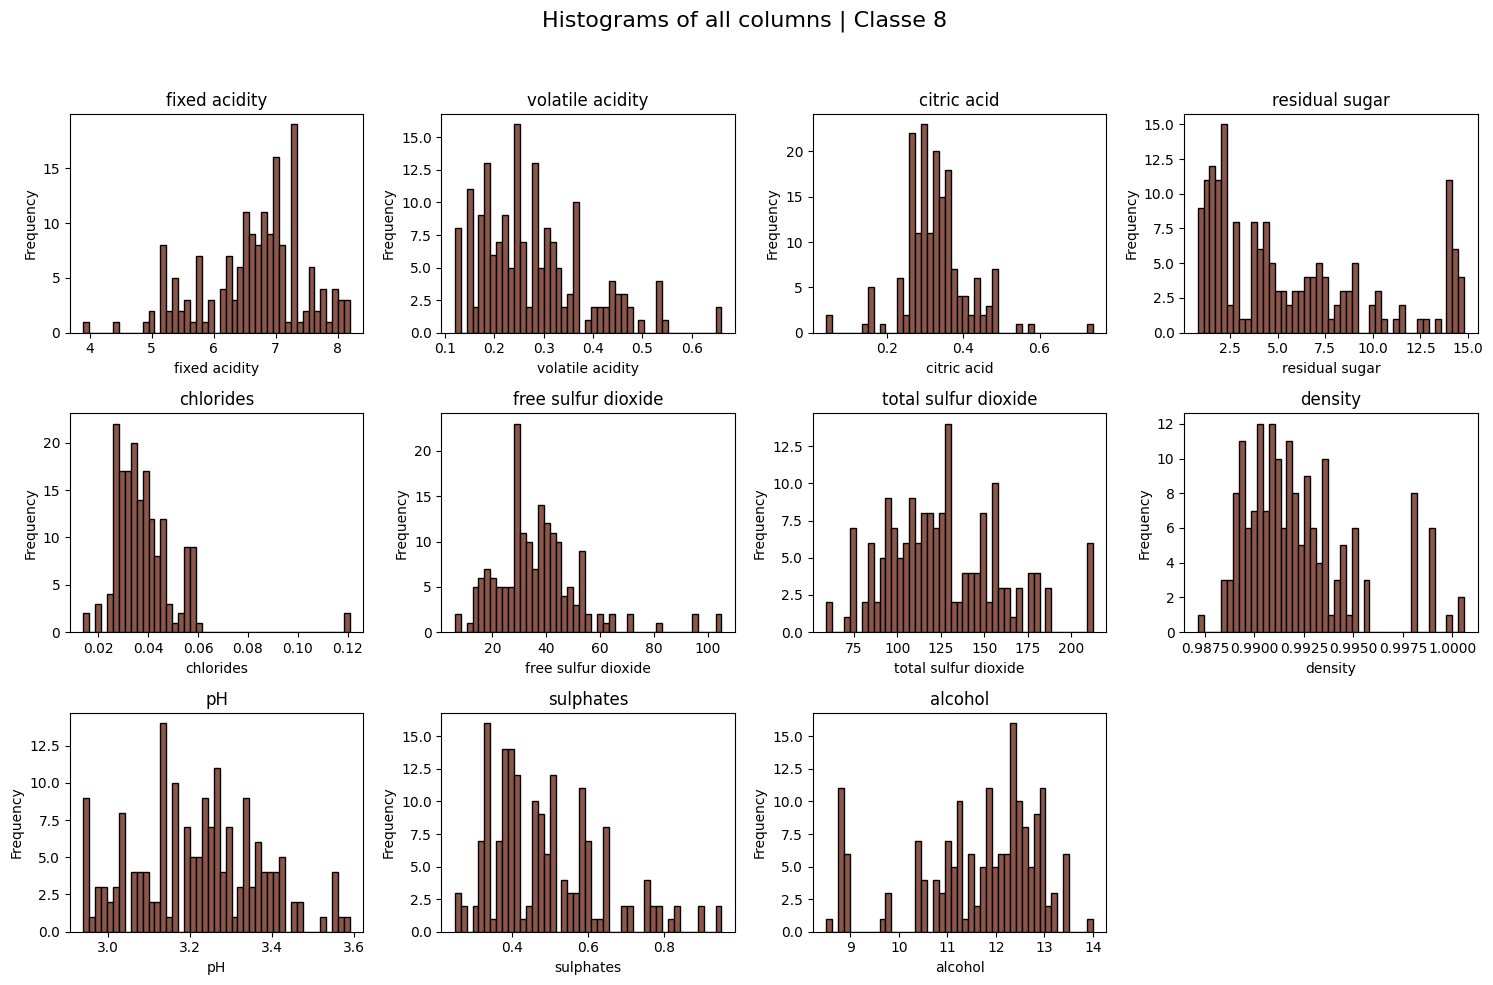

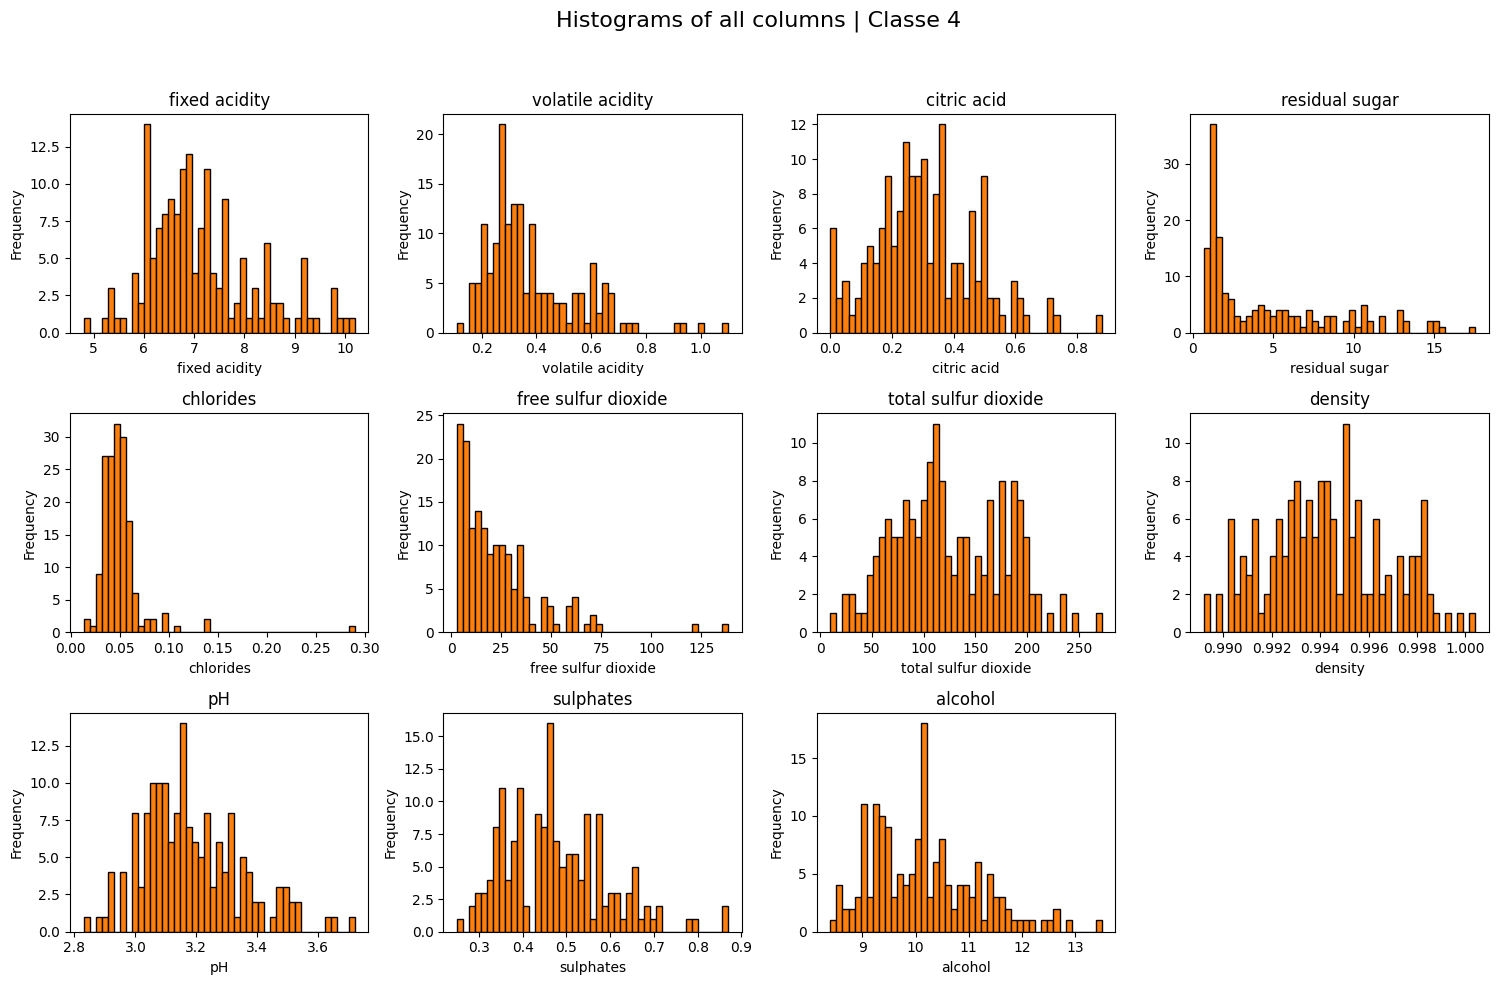

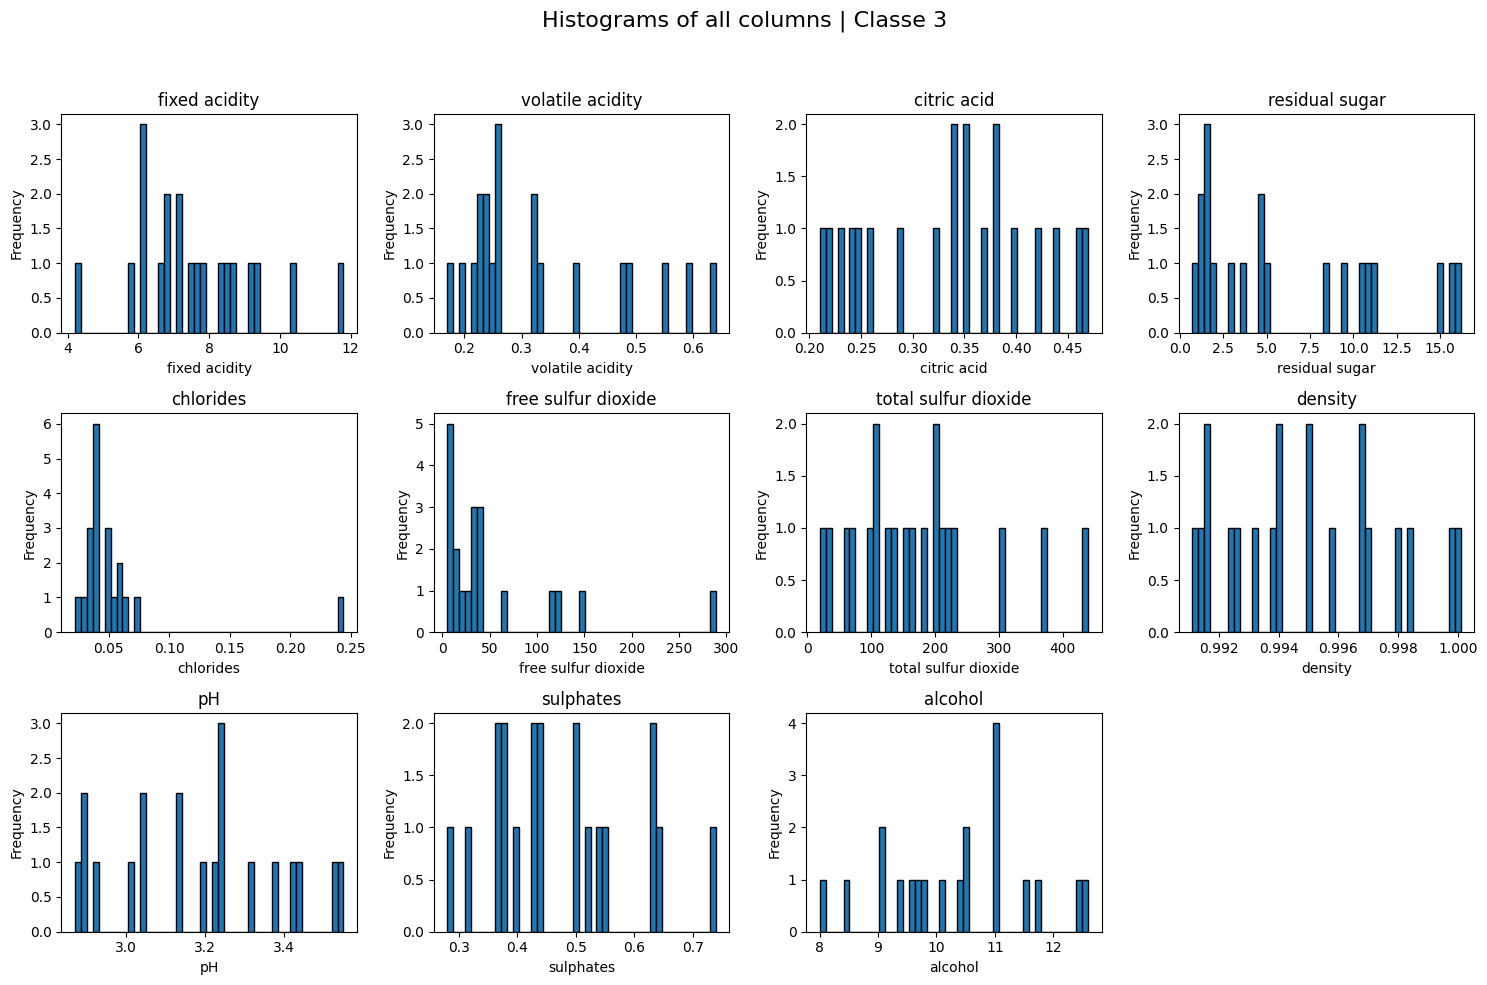

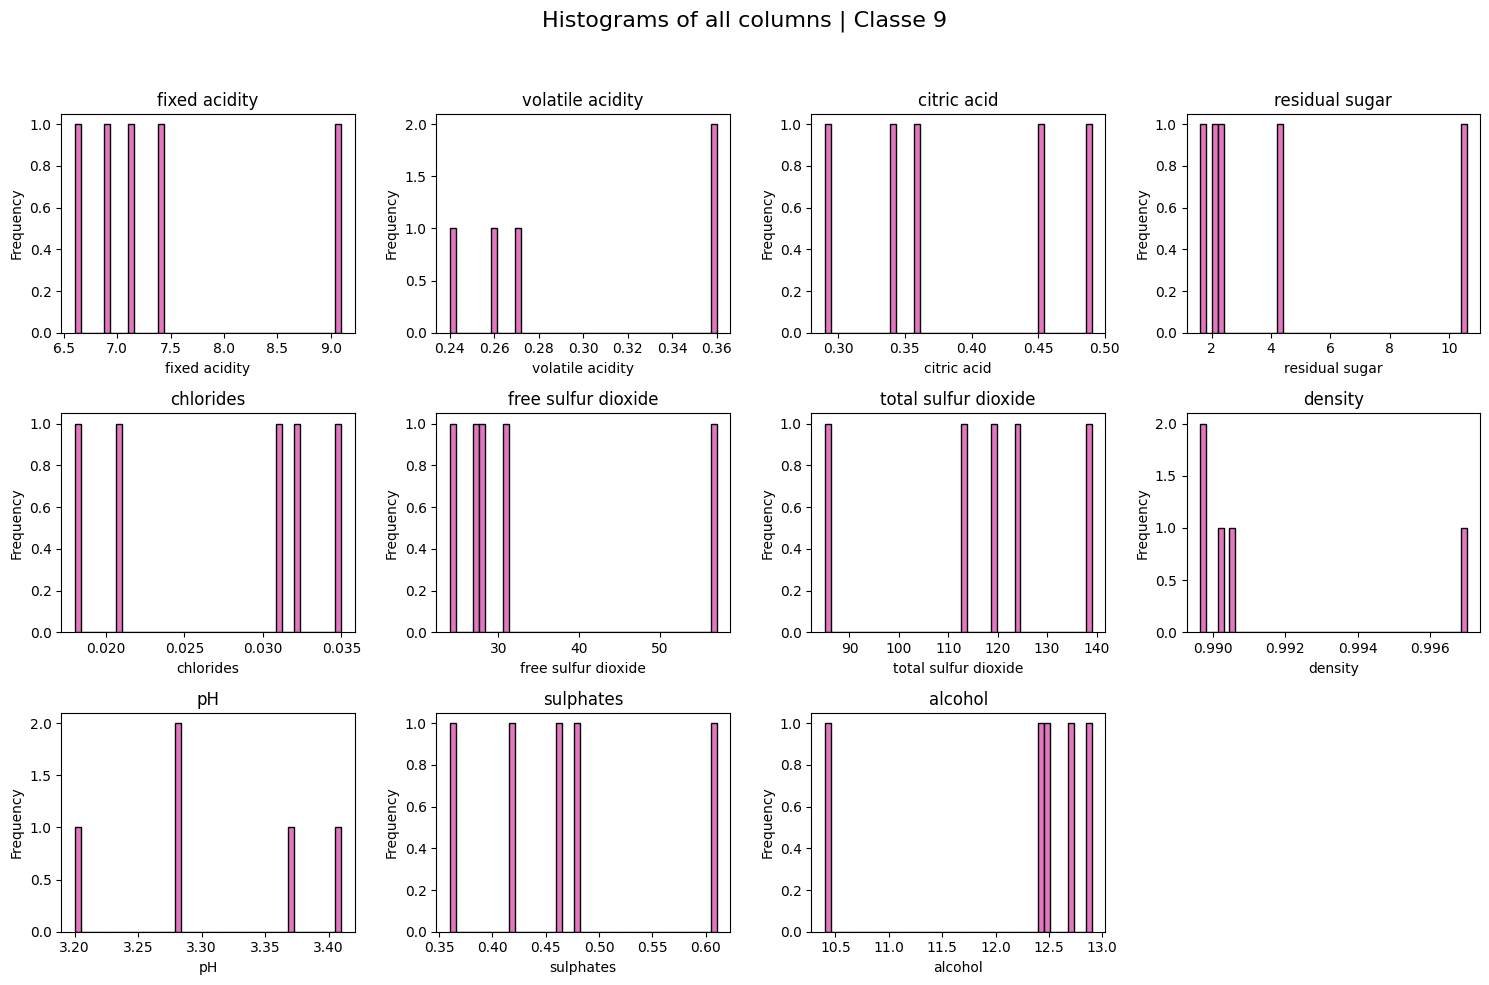

In [103]:
import matplotlib.pyplot as plt

columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol']  # Os nomes dos preditores são diferentes nesse dataset
                                                     # em relação ao com os dois vinhos juntos

for cls in datfraW['class'].unique(): # Loop por classe
    fig, axes = plt.subplots(3, 4, figsize=(15, 10))
    plt.suptitle(f'Histograms of all columns | Classe {cls}', fontsize=16)
    axes = axes.ravel()

    for i, col in enumerate(columns):
        subset = datfraW[datfraW['class'] == cls][col].dropna()  # Subconjunto da coluna para a classe atual
        subset.plot.hist(bins=45, ax=axes[i], color=class_colors[cls], edgecolor='black')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
        axes[i].set_title(f"{col}")

    # Pode sobrar algum eixo vazio, portanto:
    if len(columns) < len(axes):
        for j in range(len(columns), len(axes)):
            axes[j].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

#### Resultados por Preditores (Classes juntas)

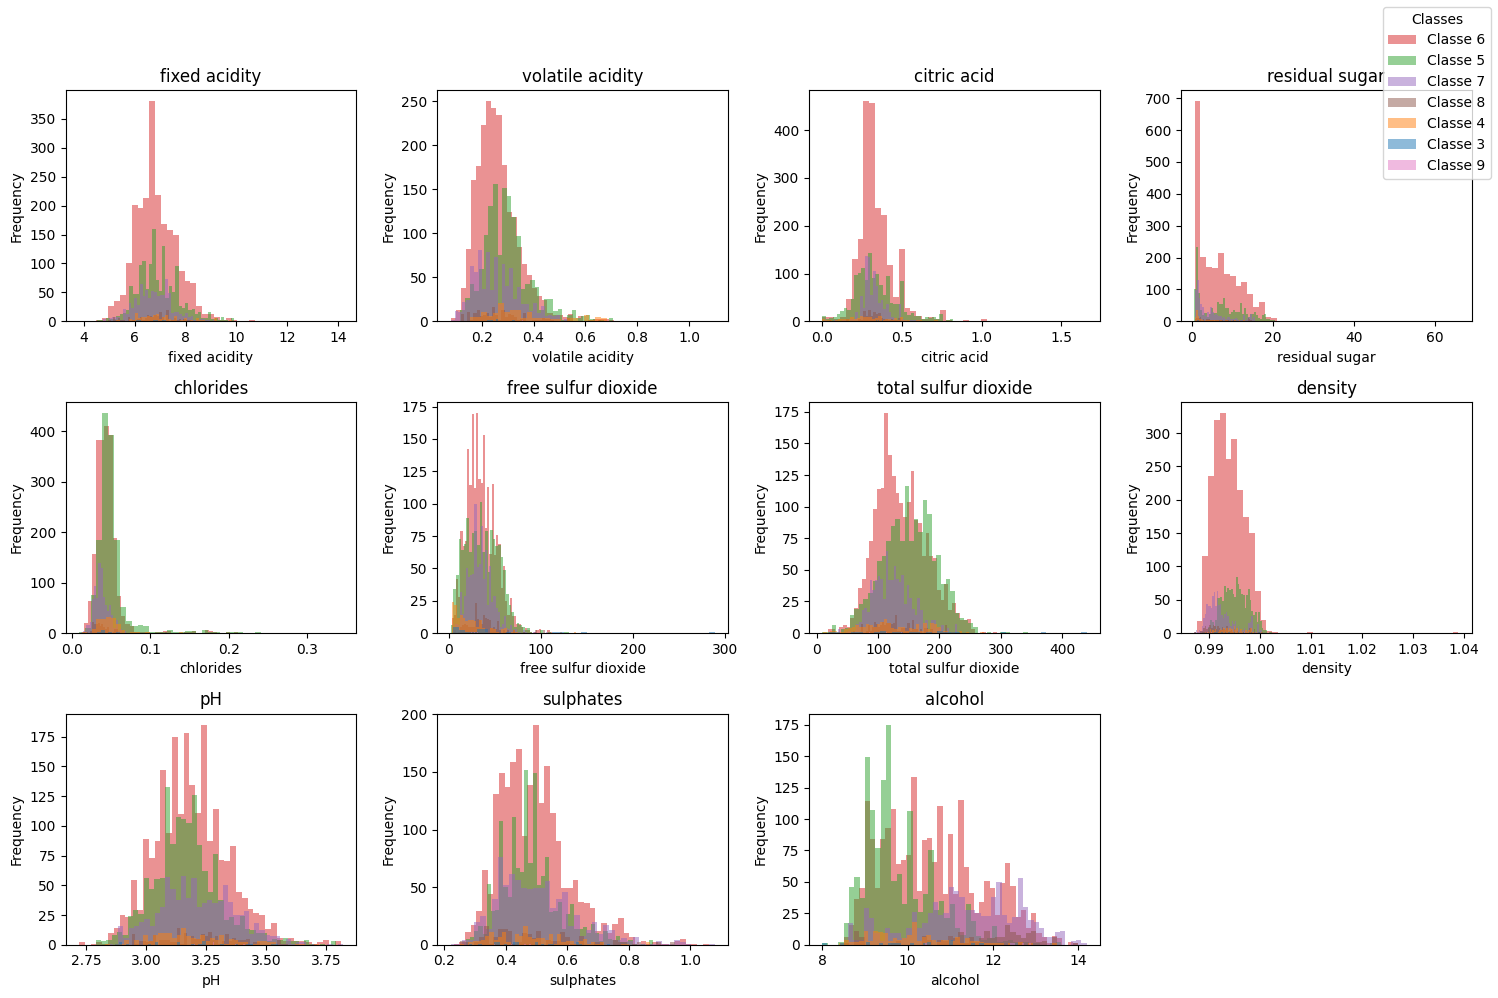

In [104]:
import matplotlib.pyplot as plt

columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol']

classes = datfraW['class'].unique()
colors = plt.cm.tab10.colors  # Paleta de até 10 cores distintas

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(columns):
    for j, cls in enumerate(classes):
        subset = datfraW[datfraW['class'] == cls][col].dropna()
        axes[i].hist(subset, bins=45, alpha=0.5,
                     color=class_colors[cls],
                     label=f"Classe {cls}" if i == 0 else "")
        # Só adiciona legenda na primeira coluna para evitar repetição

    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(col)

# Remove eixos extras, se existirem
if len(columns) < len(axes):
    for j in range(len(columns), len(axes)):
        axes[j].axis("off")

# Legenda geral
fig.legend(title="Classes", loc="upper right")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###Vinho Tinto (Vermelho)

In [34]:
red_wine_data = pd.read_csv("dataset/winequality-white.csv", sep=';')

# X = todas as colunas exceto "quality"
Xr = red_wine_data.drop(columns=["quality"])
# Y = apenas a coluna "quality"
Yr = red_wine_data["quality"]


print(Xr.head())
print(Yr.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  
0    6
1

In [49]:
datfraR = Xr.copy()
datfraR['class'] = Yr

In [47]:
resultadosR = []

In [50]:
for col in Xr.columns: # Percorrendo cada preditor
  for cls in datfraR['class'].unique(): # Percorrendo cada valor dentro da classe "qualidade"
    subconjuntoR = datfraR[datfraR['class'] == cls][col] # Nesse caso, vai ser criado um subconjunto com
                                                      # uma lista booleana com true apenas onde a linha
                                                      # concorda com a classe atual
                                                      # Depois filtra para ficar apenas na coluna atual
                                                      # Assim resta apenas os valores da classe e da coluna
    media = subconjuntoR.mean()
    desvio_padrao = subconjuntoR.std()
    valor_skew = skew(subconjuntoR)

    resultadosR.append([col, cls, media, desvio_padrao, valor_skew])

In [51]:
results_datfraR = pd.DataFrame(resultadosW, columns=['Coluna', 'Classe', 'Média', 'Desvio Padrão', 'Skew'])

#### Resultados por Classe

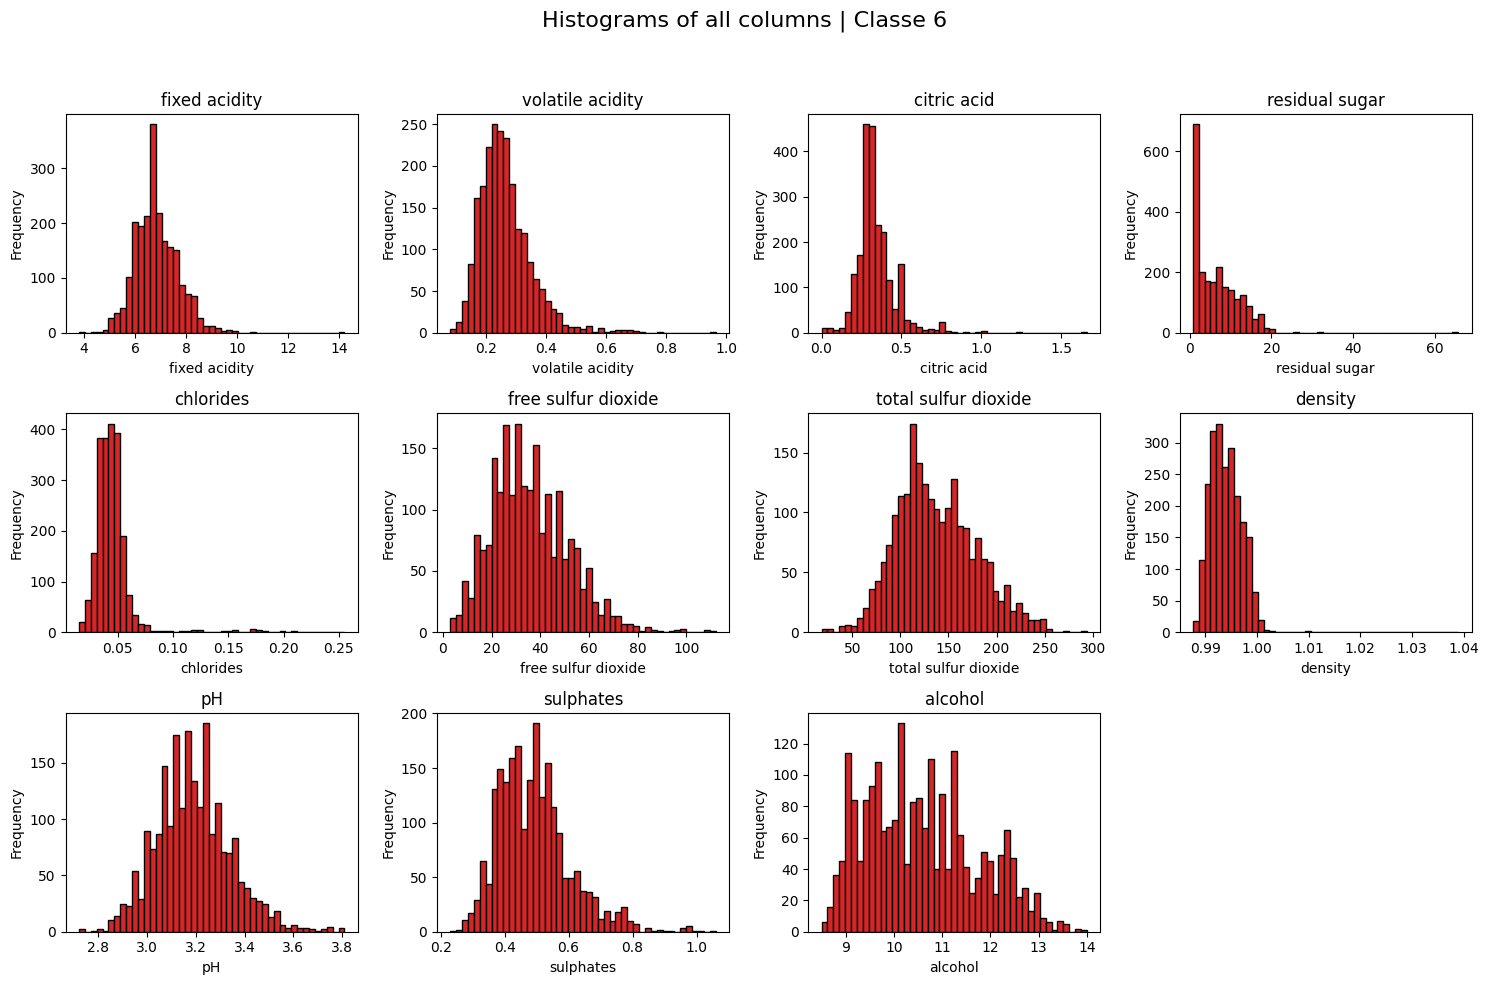

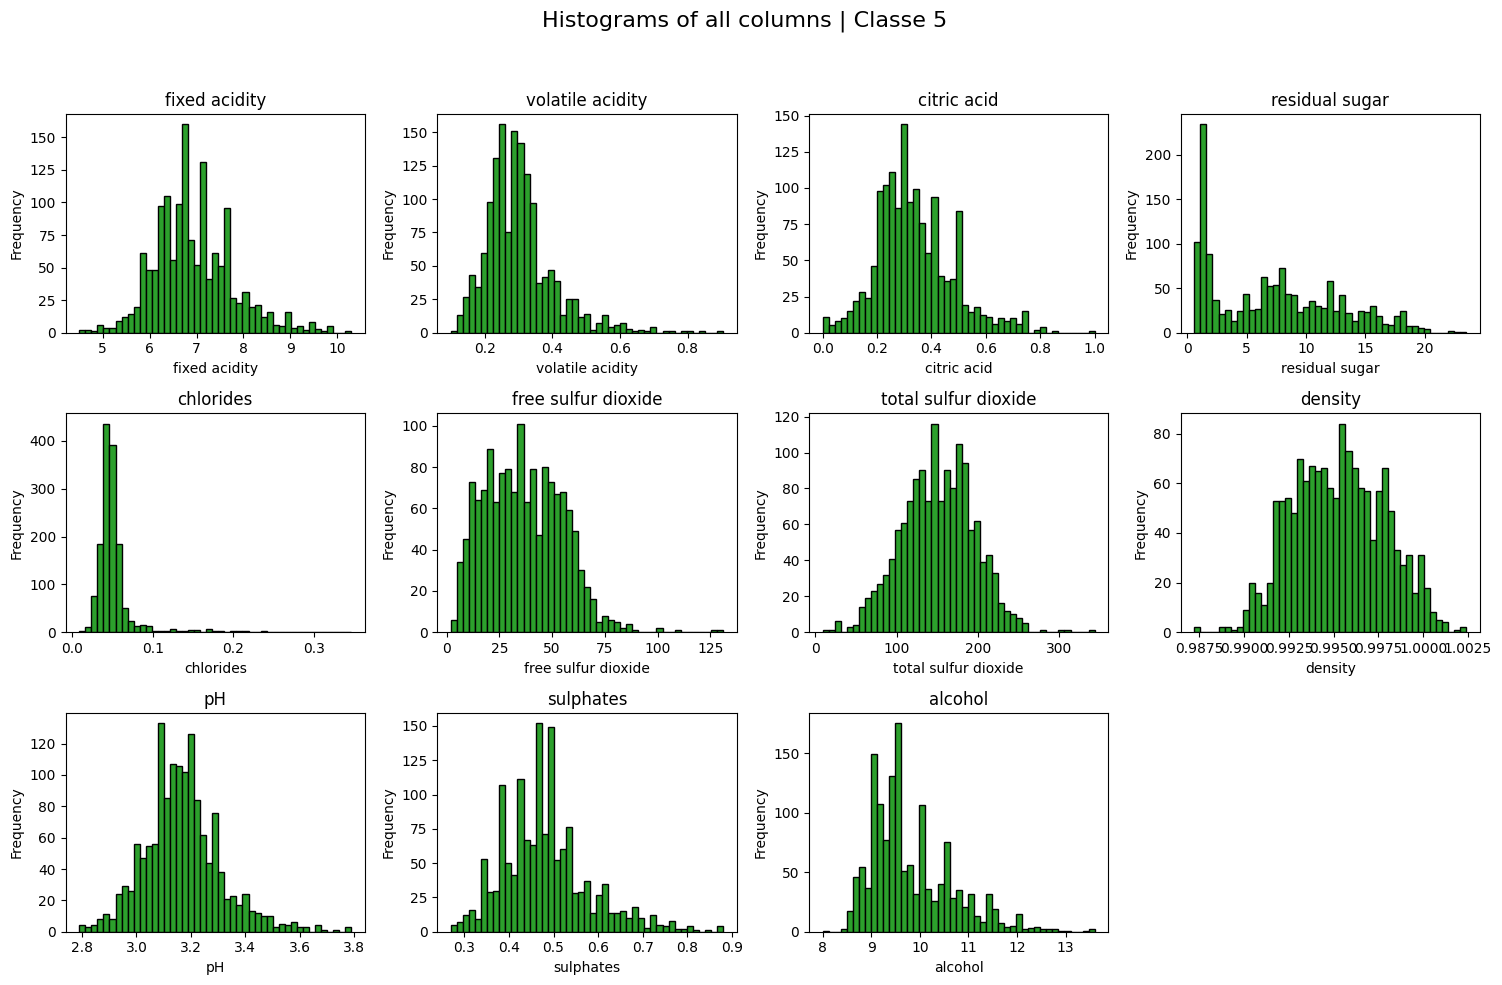

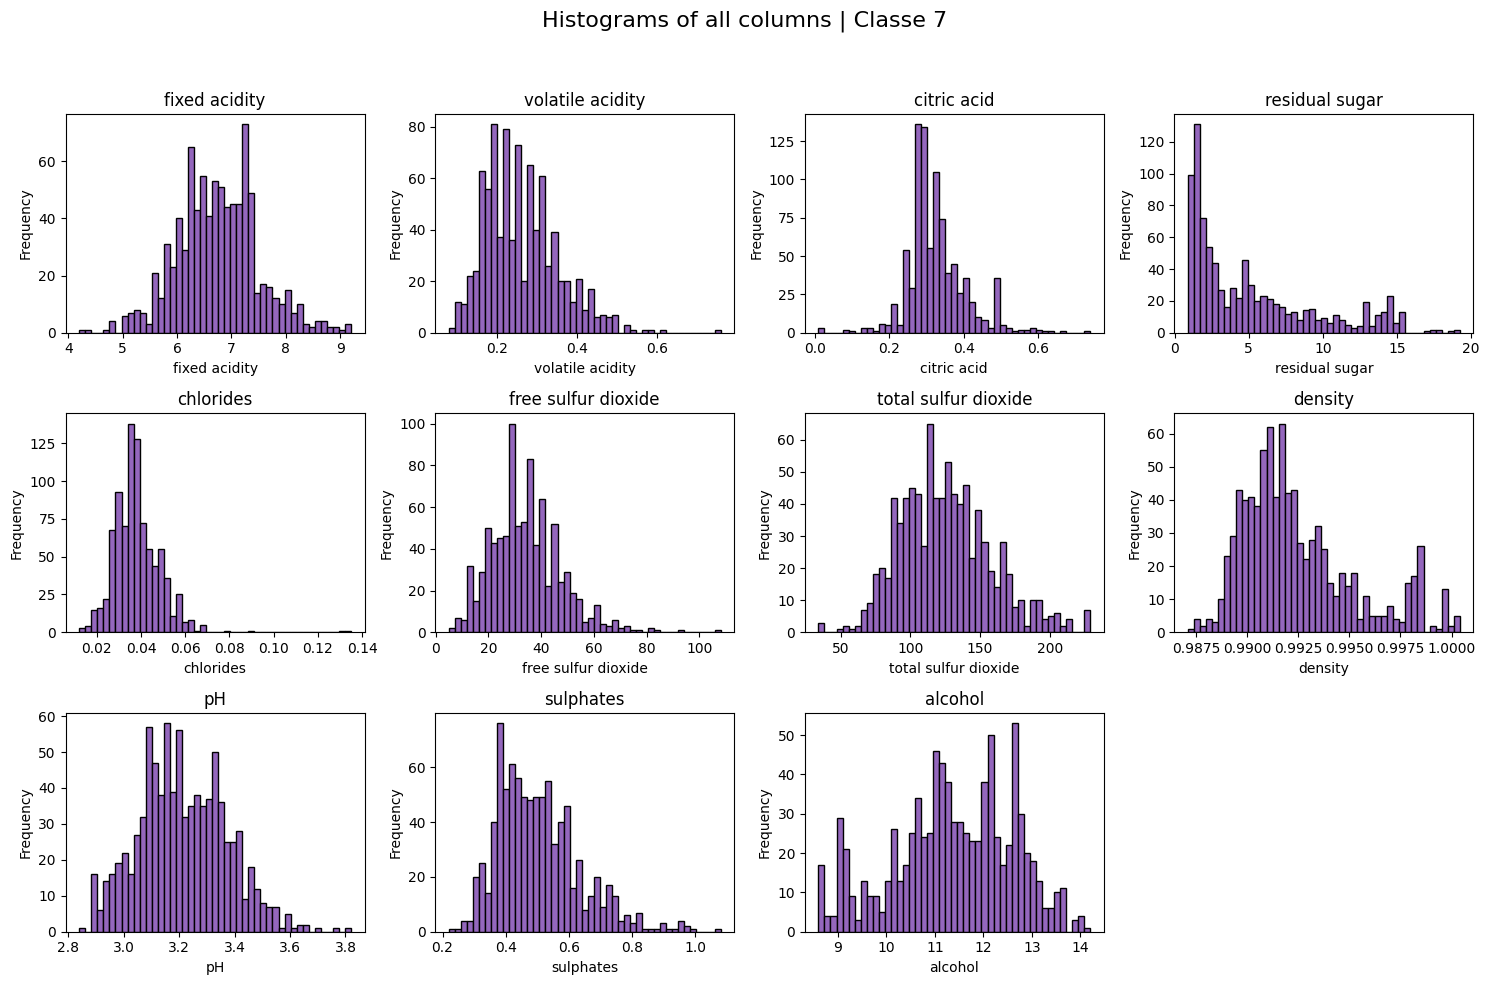

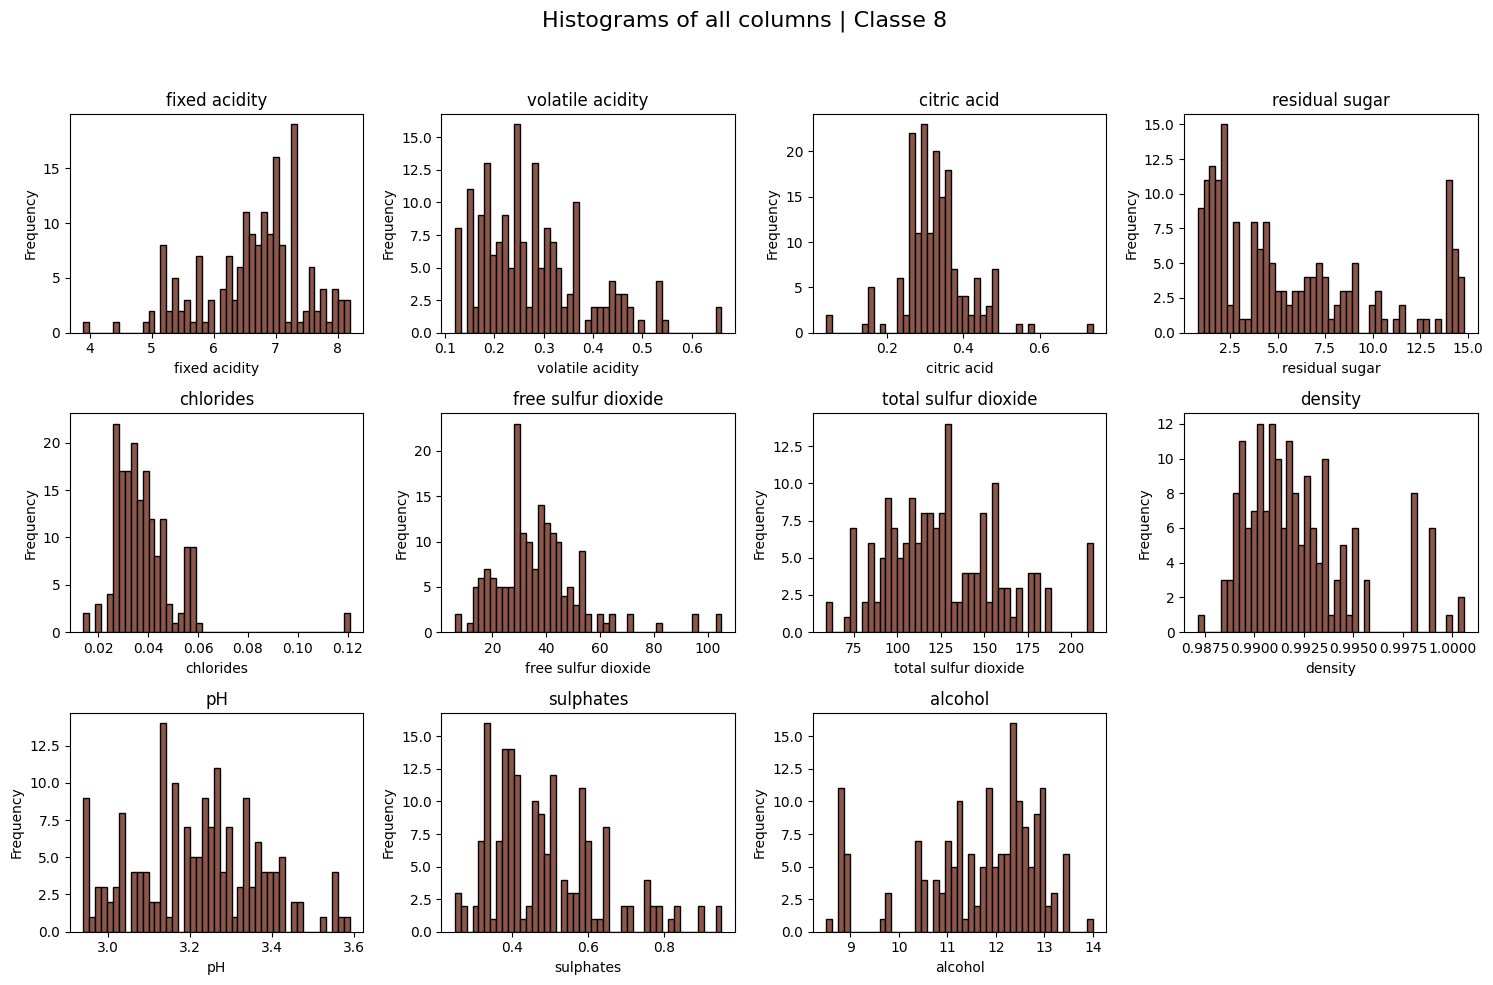

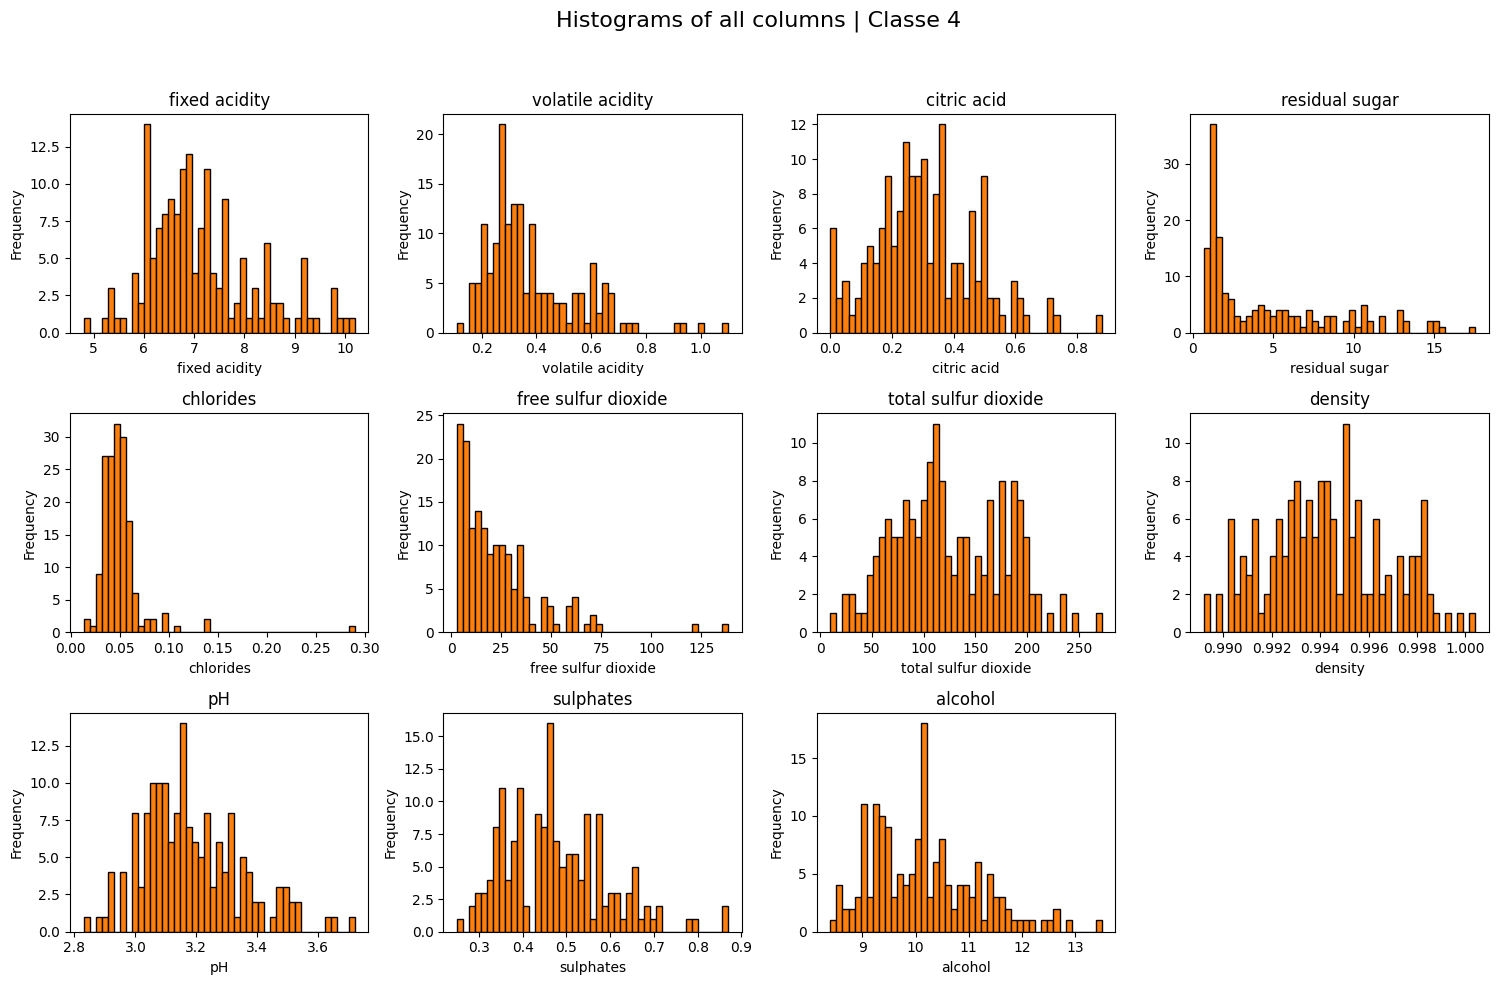

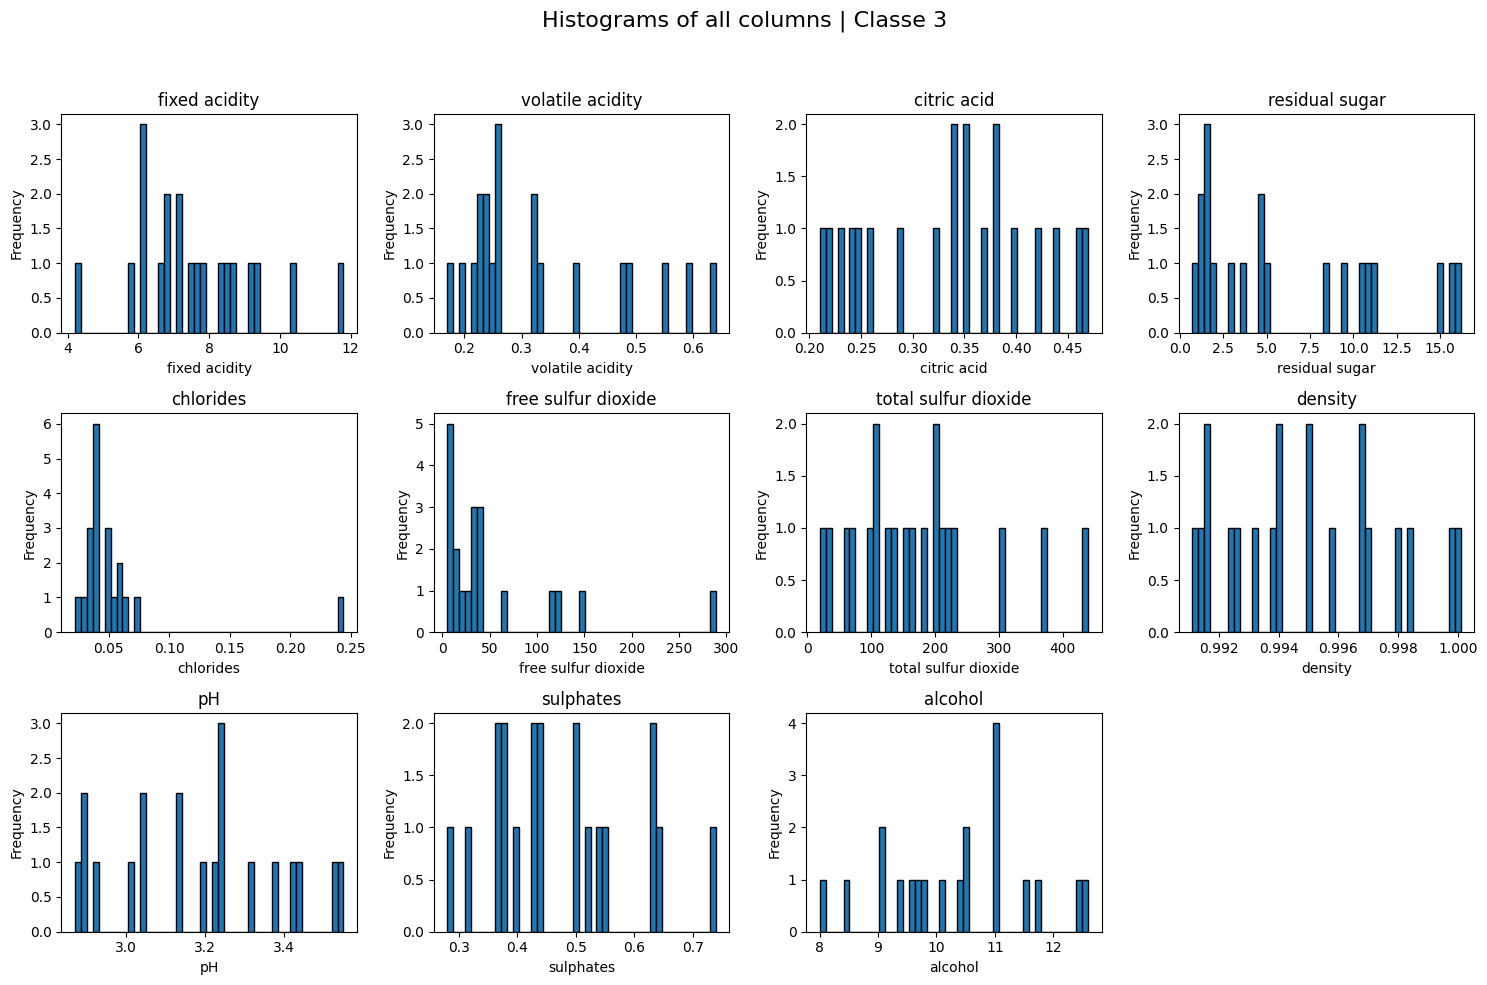

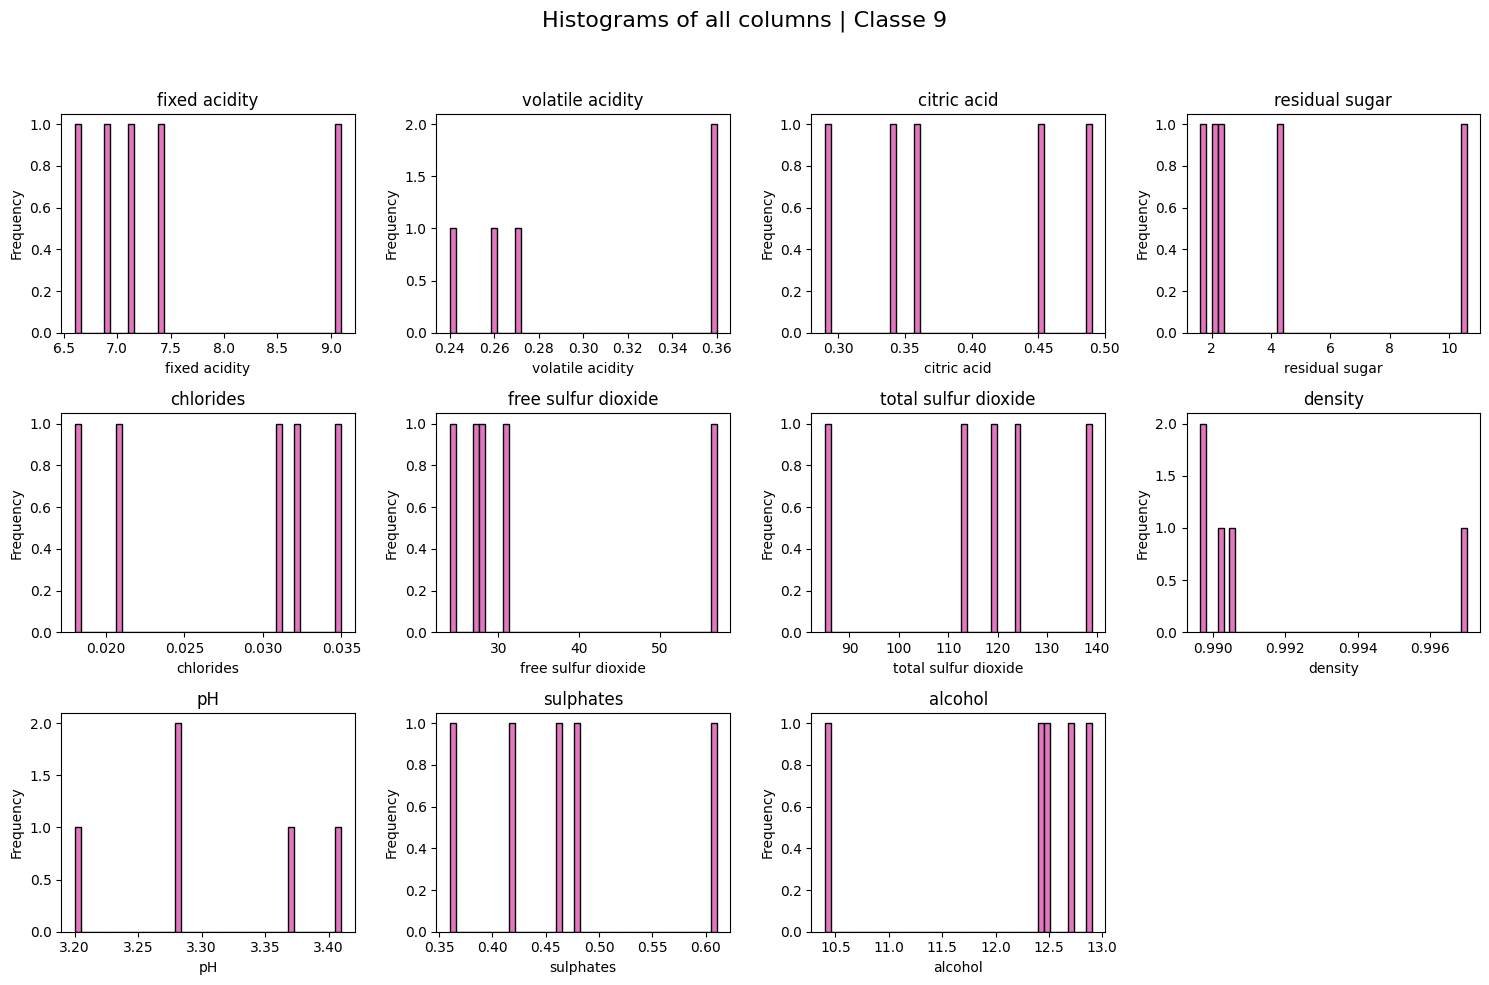

In [105]:
import matplotlib.pyplot as plt

columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol']  # Os nomes dos preditores são diferentes nesse dataset
                                                     # em relação ao com os dois vinhos juntos

for cls in datfraR['class'].unique(): # Loop por classe
    fig, axes = plt.subplots(3, 4, figsize=(15, 10))
    plt.suptitle(f'Histograms of all columns | Classe {cls}', fontsize=16)
    axes = axes.ravel()

    for i, col in enumerate(columns):
        subset = datfraR[datfraR['class'] == cls][col].dropna()  # Subconjunto da coluna para a classe atual
        subset.plot.hist(bins=45, ax=axes[i], color=class_colors[cls], edgecolor='black')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
        axes[i].set_title(f"{col}")

    # Pode sobrar algum eixo vazio, portanto:
    if len(columns) < len(axes):
        for j in range(len(columns), len(axes)):
            axes[j].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

#### Resultados por Preditores (Classes juntas)

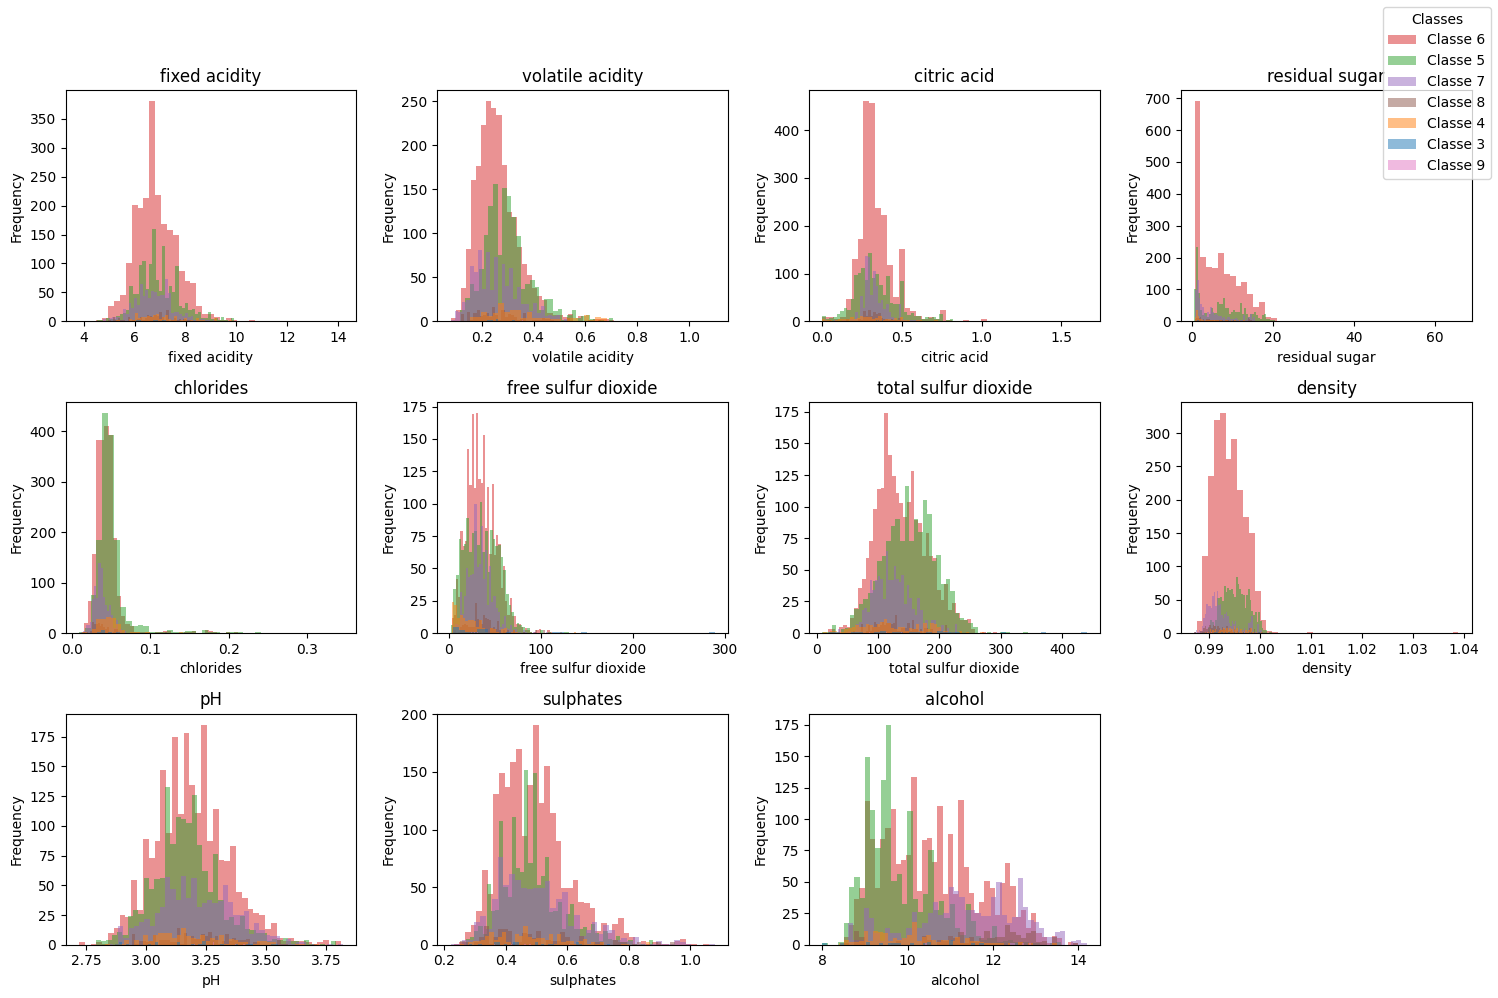

In [106]:
import matplotlib.pyplot as plt

columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol']

classes = datfraR['class'].unique()
colors = plt.cm.tab10.colors  # Paleta de até 10 cores distintas

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(columns):
    for j, cls in enumerate(classes):
        subset = datfraR[datfraR['class'] == cls][col].dropna()
        axes[i].hist(subset, bins=45, alpha=0.5,
                     color=class_colors[cls],
                     label=f"Classe {cls}" if i == 0 else "")

    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(col)

# Remove eixos extras, se existirem
if len(columns) < len(axes):
    for j in range(len(columns), len(axes)):
        axes[j].axis("off")

# Legenda geral
fig.legend(title="Classes", loc="upper right")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
